In [1]:
# Import required packages
import pandas as pd    
import numpy as np
from datetime import datetime
import yfinance as yf
from fredapi import Fred
import pandasdmx
from pandasdmx import Request
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import bic, aic
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

## Part One: US Indices VS. US Indicators

### 1. US Indices

* SP500
* Russel 1000
* Russel 1000 Value
* Russel 1000 Growth

[*********************100%***********************]  4 of 4 downloaded


R1000   R1000G   R1000V    SP500
Date                                          
2002-09-30   342.06   433.22   420.44   815.28
2002-10-01   355.43   449.66   435.90   847.91
2002-10-02   348.65   438.90   423.27   827.91
2002-10-03   344.95   433.83   417.96   818.95
2002-10-04   337.07   423.77   408.11   800.58
2002-10-07   331.59   415.53   398.79   785.28
2002-10-08   338.91   422.01   402.26   798.55
2002-10-09   331.77   410.52   388.64   776.76
2002-10-10   341.41   425.11   405.20   803.92
2002-10-11   354.08   441.45   421.36   835.32
2002-10-14   358.36   444.90   422.72   841.44
2002-10-15   374.36   465.68   443.41   881.27
2002-10-16   364.16   454.24   433.79   860.02
2002-10-17   372.16   465.12   445.11   879.20
2002-10-18   375.20   467.44   445.82   884.39
2002-10-21   380.38   475.47   455.09   899.72
2002-10-22   375.23   470.19   451.22   890.16
2002-10-23   378.08   473.28   453.70   896.14
2002-10-24   371.72   466.10   447.63   882.50
2002-10-25   379.17   474.23   454.19   897.65
2002-10-28   374.56   470.48   452.65   890.23
2002-10-29   371.50   465.89   447.49   882.15
2002-10-30   374.50   470.73   453.23   890.71
2002-10-31   373.19   468.51   450.51   885.76
2002-11-01   379.35   476.57   458.60   900.96
2002-11-04   382.79   480.31   461.62   908.35
2002-11-05   385.28   483.79   465.31   915.39
2002-11-06   389.63   488.28   468.64   923.76
2002-11-07   382.10   477.13   456.19   902.65
2002-11-08   377.67   472.63   452.94   894.74
...             ...      ...      ...      ...
2019-07-24  1644.82  1673.93  1277.54  3019.56
2019-07-25  1633.44  1664.41  1271.91  3003.67
2019-07-26  1649.92  1677.13  1278.39  3025.86
2019-07-29  1645.11  1673.63  1276.84  3020.97
2019-07-30  1639.50  1670.13  1275.92  3013.18
2019-07-31  1621.49  1652.40  1262.86  2980.38
2019-08-01  1612.74  1636.87  1245.74  2953.56
2019-08-02  1595.62  1623.84  1239.29  2932.05
2019-08-05  1542.90  1575.30  1206.32  2844.74
2019-08-06  1567.20  1595.99  1218.90  2881.77
2019-08-07  1573.91  1597.85  1216.35  2883.98
2019-08-08  1608.27  1628.36  1236.10  2938.09
2019-08-09  1596.45  1616.97  1227.91  2918.65
2019-08-12  1577.96  1597.61  1211.97  2882.70
2019-08-13  1606.22  1619.93  1224.61  2926.32
2019-08-14  1558.01  1572.57  1189.81  2840.60
2019-08-15  1561.55  1575.97  1192.25  2847.60
2019-08-16  1584.18  1599.20  1210.14  2888.68
2019-08-19  1603.98  1617.78  1223.07  2923.65
2019-08-20  1594.49  1605.48  1211.58  2900.51
2019-08-21  1610.89  1618.81  1219.09  2924.43
2019-08-22  1607.49  1617.94  1220.47  2922.95
2019-08-23  1564.47  1576.36  1190.49  2847.11
2019-08-26  1583.69  1592.98  1200.84  2878.38
2019-08-27  1580.29  1587.13  1194.47  2869.16
2019-08-28  1586.80  1597.19  1204.88  2887.94
2019-08-29  1608.81  1617.64  1218.94  2924.58
2019-08-30  1606.70  1618.61  1222.16  2926.46
2019-09-03  1591.32  1606.91  1216.38  2906.27
2019-09-04  1608.40  1624.29  1229.64  2937.78

[4258 rows x 4 columns]

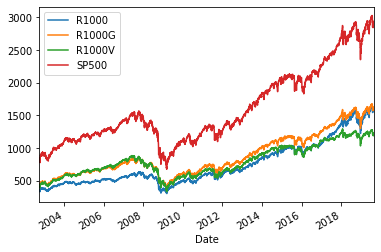

In [2]:
# Download US Indices from Yahoo API
# S&P 500, Russel 1000, R1000V, R1000G
US_Indices = ["^GSPC","^RUI",'^RLV','^RLG']
US_data = yf.download(US_Indices)
Indice_1 = US_data['Adj Close'].dropna()
Indice_1 = Indice_1.rename(columns={'^GSPC':'SP500','^RUI':'R1000G','^RLV':'R1000V','^RLG':'R1000'})
Indice_1 = Indice_1.sort_index(axis=1)
Indice_1
Indice_1.plot()

R1000    R1000G    R1000V     SP500
Date                                              
2002-10-01  0.038342  0.037246  0.036111  0.039243
2002-10-02 -0.019260 -0.024220 -0.029403 -0.023870
2002-10-03 -0.010669 -0.011619 -0.012625 -0.010881
2002-10-04 -0.023109 -0.023462 -0.023849 -0.022687
2002-10-07 -0.016391 -0.019636 -0.023102 -0.019296
2002-10-08  0.021835  0.015474  0.008664  0.016757
2002-10-09 -0.021293 -0.027604 -0.034445 -0.027666
2002-10-10  0.028642  0.034923  0.041727  0.034368
2002-10-11  0.036439  0.037717  0.039107  0.038315
2002-10-14  0.012015  0.007785  0.003222  0.007300
2002-10-15  0.043680  0.045649  0.047785  0.046249
2002-10-16 -0.027625 -0.024873 -0.021934 -0.024408
2002-10-17  0.021731  0.023670  0.025761  0.022057
2002-10-18  0.008135  0.004976  0.001594  0.005886
2002-10-21  0.013712  0.017033  0.020580  0.017185
2002-10-22 -0.013632 -0.011167 -0.008540 -0.010682
2002-10-23  0.007567  0.006550  0.005481  0.006695
2002-10-24 -0.016965 -0.015287 -0.013469 -0.015338
2002-10-25  0.019844  0.017292  0.014549  0.017021
2002-10-28 -0.012233 -0.007939 -0.003396 -0.008300
2002-10-29 -0.008203 -0.009804 -0.011465 -0.009118
2002-10-30  0.008043  0.010335  0.012746  0.009657
2002-10-31 -0.003504 -0.004727 -0.006019 -0.005573
2002-11-01  0.016372  0.017057  0.017798  0.017015
2002-11-04  0.009027  0.007817  0.006564  0.008169
2002-11-05  0.006484  0.007219  0.007962  0.007720
2002-11-06  0.011227  0.009238  0.007131  0.009102
2002-11-07 -0.019515 -0.023100 -0.026925 -0.023117
2002-11-08 -0.011662 -0.009476 -0.007150 -0.008802
2002-11-11 -0.021816 -0.020845 -0.019800 -0.020950
...              ...       ...       ...       ...
2019-07-24  0.005517  0.005385  0.005258  0.004677
2019-07-25 -0.006943 -0.005703 -0.004417 -0.005276
2019-07-26  0.010039  0.007613  0.005082  0.007360
2019-07-29 -0.002920 -0.002089 -0.001213 -0.001617
2019-07-30 -0.003416 -0.002093 -0.000721 -0.002582
2019-07-31 -0.011046 -0.010673 -0.010288 -0.010945
2019-08-01 -0.005411 -0.009443 -0.013649 -0.009040
2019-08-02 -0.010672 -0.007992 -0.005191 -0.007309
2019-08-05 -0.033599 -0.030348 -0.026964 -0.030230
2019-08-06  0.015627  0.013049  0.010374  0.012933
2019-08-07  0.004272  0.001165 -0.002094  0.000767
2019-08-08  0.021596  0.018914  0.016107  0.018588
2019-08-09 -0.007377 -0.007019 -0.006648 -0.006639
2019-08-12 -0.011650 -0.012045 -0.013066 -0.012394
2019-08-13  0.017751  0.013874  0.010375  0.015018
2019-08-14 -0.030474 -0.029672 -0.028829 -0.029730
2019-08-15  0.002270  0.002160  0.002049  0.002461
2019-08-16  0.014388  0.014633  0.014894  0.014323
2019-08-19  0.012421  0.011551  0.010628  0.012033
2019-08-20 -0.005934 -0.007632 -0.009439 -0.007946
2019-08-21  0.010233  0.008269  0.006179  0.008213
2019-08-22 -0.002113 -0.000538  0.001131 -0.000506
2019-08-23 -0.027127 -0.026035 -0.024871 -0.026289
2019-08-26  0.012210  0.010488  0.008656  0.010923
2019-08-27 -0.002149 -0.003679 -0.005319 -0.003208
2019-08-28  0.004111  0.006318  0.008677  0.006524
2019-08-29  0.013775  0.012722  0.011602  0.012607
2019-08-30 -0.001312  0.000599  0.002638  0.000643
2019-09-03 -0.009619 -0.007255 -0.004741 -0.006923
2019-09-04  0.010676  0.010758  0.010842  0.010784

[4257 rows x 4 columns]

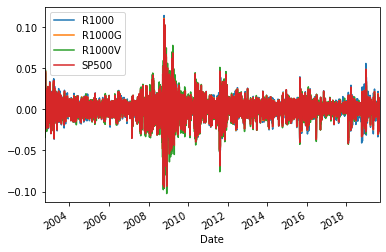

In [3]:
# Take log difference --> Return
TR_1 = np.log(Indice_1).diff().dropna()
TR_1
TR_1.plot()

R1000    R1000G     R1000V     SP500
Date                                               
2002-10-31  8.710151  7.831176   6.907849  8.291442
2002-11-30  5.192548  5.500032   5.822577  5.550058
2002-12-31 -7.291105 -5.998594  -4.650805 -6.222928
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984
2003-03-31  1.749153  0.887685  -0.025528  0.832287
2003-04-30  7.076132  7.636873   8.234498  7.792735
2003-05-31  4.777050  5.372610   5.996177  4.964567
2003-06-30  1.251348  1.166838   1.079230  1.125863
2003-07-31  2.402049  1.831130   1.248816  1.609351
2003-08-31  2.361945  1.850221   1.320796  1.771534
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623
2003-10-31  5.379164  5.548351   5.724132  5.350427
2003-11-30  0.945482  1.027573   1.113868  0.710323
2003-12-31  3.282110  4.513700   5.770335  4.951890
2004-01-31  1.982772  1.775387   1.564719  1.712888
2004-02-29  0.508854  1.210404   1.914144  1.213510
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339
2004-05-31  1.738915  1.270972   0.795082  1.201102
2004-06-30  1.137139  1.639801   2.147690  1.782919
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224
2004-08-31 -0.628061  0.319647   1.204977  0.228472
2004-09-30  0.879950  1.109106   1.319269  0.932034
2004-10-31  1.491633  1.474818   1.458525  1.391696
2004-11-30  3.255415  4.012631   4.706808  3.786878
2004-12-31  3.764679  3.394976   3.057709  3.194249
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575
2005-02-28  0.929152  2.020492   2.990637  1.872693
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275
...              ...       ...        ...       ...
2017-04-30  2.181269  0.940558  -0.331047  0.905014
2017-05-31  2.383220  1.033628  -0.384645  1.150972
2017-06-30 -0.377620  0.547824   1.437704  0.480228
2017-07-31  2.555833  1.847336   1.162697  1.916396
2017-08-31  1.633451  0.075963  -1.459676  0.054634
2017-09-30  1.201057  1.972947   2.740088  1.911896
2017-10-31  3.733605  2.162013   0.580499  2.194560
2017-11-30  2.799006  2.763013   2.727175  2.769552
2017-12-31  0.693780  0.975856   1.263428  0.978360
2018-01-31  6.785496  5.248504   3.659400  5.465742
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251
2018-04-30  0.280503  0.232515   0.181893  0.271511
2018-05-31  4.114378  2.291228   0.302141  2.137820
2018-06-30  0.861540  0.507924   0.069077  0.483071
2018-07-31  2.842282  3.283340   3.714599  3.538798
2018-08-31  5.162683  3.175230   1.203347  2.981432
2018-09-30  0.473600  0.238122  -0.000802  0.428511
2018-10-31 -9.422744 -7.448538  -5.479570 -7.192935
2018-11-30  0.863638  1.779685   2.665644  1.770178
2018-12-31 -9.086627 -9.719585 -10.337158 -9.626529
2019-01-31  8.555235  7.920548   7.293949  7.574215
2019-02-28  3.335416  3.112511   2.890544  2.929559
2019-03-31  2.703876  1.572581   0.430165  1.776554
2019-04-30  4.367489  3.850449   3.317437  3.856034
2019-05-31 -6.694529 -6.811259  -6.931850 -6.804089
2019-06-30  6.538344  6.636460   6.737567  6.665832
2019-07-31  2.173951  1.425017   0.649843  1.304277
2019-08-31 -0.916309 -2.066102  -3.275920 -1.825731
2019-09-30  0.105751  0.350304   0.610166  0.386069

[204 rows x 4 columns]

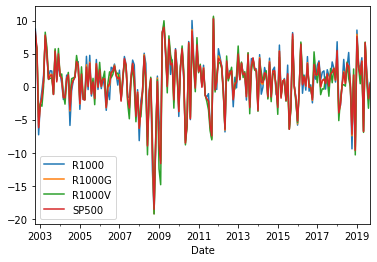

In [4]:
# Calculate Monthly Return
TR_1_M = TR_1.resample('M').sum()*100
TR_1_M
TR_1_M.plot()

### 2. Forecasting US Indices

#### 2.1 Data Preparation

* Leading Indicators

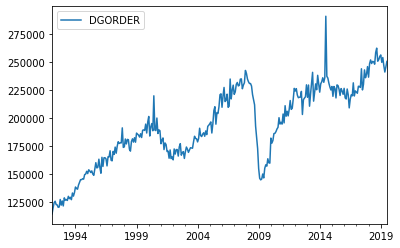

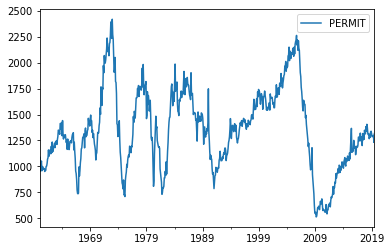

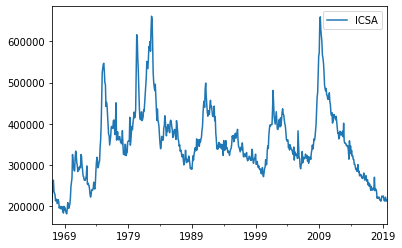

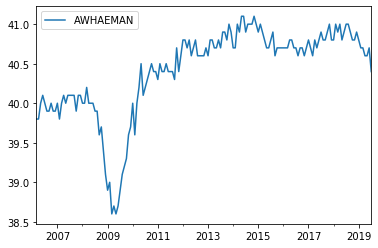

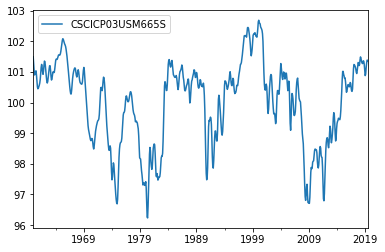

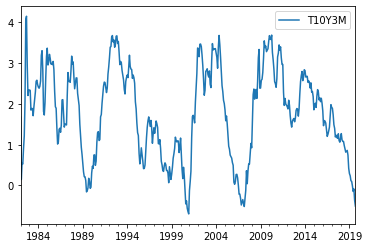

In [5]:
# Leading Indicators
fred = Fred(api_key='c61f0bb859e22e163419d6e5cf28655b')
leading_fred = ['DGORDER','PERMIT','ICSA','AWHAEMAN','CSCICP03USM665S','T10Y3M']
leading_df = {}
for i in range(0,len(leading_fred)):
    data = fred.get_series(leading_fred[i]).dropna()
    data_series = pd.DataFrame(data,columns=[leading_fred[i]])
    data_series = data_series.resample('M').mean().dropna()
    data_series.plot()
    leading_df[leading_fred[i]] = data_series

In [6]:
# Seasonally Adjusted
for i in range(0,len(leading_fred)):
    leading_df[leading_fred[i]] = leading_df[leading_fred[i]].diff(periods=12).dropna()

# Merge all Indicators and TRs
def Merge(df,fred):
    merge = df[fred[0]]
    for i in range(0,len(fred)-1):
        merge = pd.concat([merge,df[fred[i+1]]],join='inner',axis=1)
    merge1 = pd.concat([TR_1_M,merge],join='inner',axis=1)
    merge1 = merge1.dropna()
    
    return merge1

merge1 = Merge(leading_df,leading_fred)
merge1

R1000     R1000G     R1000V      SP500  DGORDER  PERMIT  \
Date                                                                      
2007-03-31   0.437771   0.946512   1.396057   0.993048   2714.0  -522.0   
2007-04-30   4.554631   4.022540   3.482900   4.237984  17002.0  -528.0   
2007-05-31   3.396883   3.326011   3.253277   3.203072  12732.0  -412.0   
2007-06-30  -1.599981  -2.051701  -2.514395  -1.797693   7841.0  -460.0   
2007-07-31  -1.624289  -3.238209  -4.872727  -3.250450  25082.0  -402.0   
2007-08-31   1.451094   1.343026   0.824544   1.278156  24360.0  -401.0   
2007-09-30   4.013039   3.400576   3.169563   3.516828  -8672.0  -394.0   
2007-10-31   3.287222   1.625314  -0.139933   1.471356  12335.0  -378.0   
2007-11-30  -3.887221  -4.575993  -5.321445  -4.504279   6579.0  -311.0   
2007-12-31  -0.469530  -0.824280  -1.214891  -0.866593  13107.0  -489.0   
2008-01-31  -8.177504  -6.302100  -4.271911  -6.311391  18638.0  -532.0   
2008-02-29  -2.147421  -3.323734  -4.587407  -3.537971  11501.0  -584.0   
2008-03-31  -0.723745  -0.843280  -0.972388  -0.597741   2338.0  -629.0   
2008-04-30   5.051552   4.838550   4.606064   4.645094   -965.0  -462.0   
2008-05-31   3.463409   1.607319  -0.449713   1.061759   2129.0  -498.0   
2008-06-30  -7.581258  -8.848446 -10.320302  -8.988355   -619.0  -227.0   
2008-07-31  -1.983120  -1.309697  -0.583980  -0.990830 -13766.0  -440.0   
2008-08-31   0.919754   1.160272   1.420719   1.211680 -18491.0  -463.0   
2008-09-30 -12.663713 -10.319972  -7.893354  -9.518079 -14337.0  -464.0   
2008-10-31 -19.213874 -19.240826 -19.266675 -18.563649 -36599.0  -456.0   
2008-11-30  -8.524662  -8.180672  -7.839137  -7.779835 -48601.0  -598.0   
2008-12-31   1.585869   1.308314   1.029820   0.779114 -69663.0  -595.0   
2009-01-31  -4.990750  -8.656976 -12.439555  -8.954989 -84653.0  -549.0   
2009-02-28  -8.058801 -11.278515 -14.847023 -11.645654 -88425.0  -456.0   
2009-03-31   8.352894   8.179480   7.983105   8.195274 -87374.0  -454.0   
2009-04-30   9.069183   9.489713   9.965882   8.977221 -85049.0  -487.0   
2009-05-31   4.631017   5.131951   5.691168   5.172056 -80598.0  -439.0   
2009-06-30   0.955655   0.063731  -0.947814   0.019582 -81856.0  -579.0   
2009-07-31   6.778741   7.220907   7.681294   7.152198 -65597.0  -326.0   
2009-08-31   1.842496   3.338834   4.851332   3.300932 -58076.0  -242.0   
...               ...        ...        ...        ...      ...     ...   
2017-02-28   3.893583   3.570075   3.251692   3.652310   4141.0    55.0   
2017-03-31   1.026074  -0.097658  -1.221718  -0.038931  11327.0   173.0   
2017-04-30   2.181269   0.940558  -0.331047   0.905014   2289.0    93.0   
2017-05-31   2.383220   1.033628  -0.384645   1.150972   6350.0    13.0   
2017-06-30  -0.377620   0.547824   1.437704   0.480228  34839.0   121.0   
2017-07-31   2.555833   1.847336   1.162697   1.916396   8251.0    68.0   
2017-08-31   1.633451   0.075963  -1.459676   0.054634   9252.0   108.0   
2017-09-30   1.201057   1.972947   2.740088   1.911896  23082.0   -22.0   
2017-10-31   3.733605   2.162013   0.580499   2.194560   4553.0    68.0   
2017-11-30   2.799006   2.763013   2.727175   2.769552  19402.0    68.0   
2017-12-31   0.693780   0.975856   1.263428   0.978360  21647.0    58.0   
2018-01-31   6.785496   5.248504   3.659400   5.465742  13319.0    63.0   
2018-02-28  -2.815429  -3.946459  -5.149210  -3.972612  26307.0    92.0   
2018-03-31  -2.890414  -2.451827  -1.980362  -2.725251  23443.0   120.0   
2018-04-30   0.280503   0.232515   0.181893   0.271511  20423.0   131.0   
2018-05-31   4.114378   2.291228   0.302141   2.137820  23188.0   120.0   
2018-06-30   0.861540   0.507924   0.069077   0.483071   6234.0   -11.0   
2018-07-31   2.842282   3.283340   3.714599   3.538798  22910.0    61.0   
2018-08-31   5.162683   3.175230   1.203347   2.981432  28466.0   -48.0   
2018-09-30   0.473600   0.238122  -0.000802   0.428511  19387.0    27.0   
2018-10-31  -9.422744  -7.448538  -5.4795

In [7]:
# ADF Test: test whether the series is stationary or not, take the difference if not stationary
# drop the indicator if not stationary after taking difference three times
def ADF_Test(df_diff):
    index_remove2 = []
    for i in range(3,df_diff.shape[1]):
        k = 0
        for j in range(0,3):
            pValue = ts.adfuller(df_diff.iloc[:,i].values)[1]
            # If p-value>0.05, do not reject null hypothesis that the series is non-stationary
            if pValue>0.05:
                k = k + 1
                df_diff.iloc[:,i] = df_diff.iloc[:,i].diff()
                df_diff = df_diff.dropna()
        df_diff.iloc[:,i].plot()
        if k == 3:
            index_remove2.append(i) 
            
        print(k)
    df_diff = df_diff.drop(df_diff.columns[index_remove2],axis=1) # drop columns whose p-value>0.05
#     df_diff = df_diff.reset_index(drop=True)
    
    return index_remove2,df_diff

0
1
1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


1
1
0
1


[]

R1000     R1000G     R1000V      SP500  DGORDER  PERMIT  \
Date                                                                      
2007-08-31   1.451094   1.343026   0.824544   1.278156   -722.0     1.0   
2007-09-30   4.013039   3.400576   3.169563   3.516828 -33032.0     7.0   
2007-10-31   3.287222   1.625314  -0.139933   1.471356  21007.0    16.0   
2007-11-30  -3.887221  -4.575993  -5.321445  -4.504279  -5756.0    67.0   
2007-12-31  -0.469530  -0.824280  -1.214891  -0.866593   6528.0  -178.0   
2008-01-31  -8.177504  -6.302100  -4.271911  -6.311391   5531.0   -43.0   
2008-02-29  -2.147421  -3.323734  -4.587407  -3.537971  -7137.0   -52.0   
2008-03-31  -0.723745  -0.843280  -0.972388  -0.597741  -9163.0   -45.0   
2008-04-30   5.051552   4.838550   4.606064   4.645094  -3303.0   167.0   
2008-05-31   3.463409   1.607319  -0.449713   1.061759   3094.0   -36.0   
2008-06-30  -7.581258  -8.848446 -10.320302  -8.988355  -2748.0   271.0   
2008-07-31  -1.983120  -1.309697  -0.583980  -0.990830 -13147.0  -213.0   
2008-08-31   0.919754   1.160272   1.420719   1.211680  -4725.0   -23.0   
2008-09-30 -12.663713 -10.319972  -7.893354  -9.518079   4154.0    -1.0   
2008-10-31 -19.213874 -19.240826 -19.266675 -18.563649 -22262.0     8.0   
2008-11-30  -8.524662  -8.180672  -7.839137  -7.779835 -12002.0  -142.0   
2008-12-31   1.585869   1.308314   1.029820   0.779114 -21062.0     3.0   
2009-01-31  -4.990750  -8.656976 -12.439555  -8.954989 -14990.0    46.0   
2009-02-28  -8.058801 -11.278515 -14.847023 -11.645654  -3772.0    93.0   
2009-03-31   8.352894   8.179480   7.983105   8.195274   1051.0     2.0   
2009-04-30   9.069183   9.489713   9.965882   8.977221   2325.0   -33.0   
2009-05-31   4.631017   5.131951   5.691168   5.172056   4451.0    48.0   
2009-06-30   0.955655   0.063731  -0.947814   0.019582  -1258.0  -140.0   
2009-07-31   6.778741   7.220907   7.681294   7.152198  16259.0   253.0   
2009-08-31   1.842496   3.338834   4.851332   3.300932   7521.0    84.0   
2009-09-30   4.036280   3.824114   3.613123   3.510010   3443.0    54.0   
2009-10-31  -1.439247  -2.349930  -3.259107  -1.995987  25614.0    35.0   
2009-11-30   5.747930   5.479906   5.206403   5.577902   6264.0   150.0   
2009-12-31   2.910690   2.247248   1.571612   1.761455   9834.0   113.0   
2010-01-31  -4.520717  -3.762659  -2.989845  -3.767514  39990.0   -19.0   
...               ...        ...        ...        ...      ...     ...   
2017-02-28   3.893583   3.570075   3.251692   3.652310   7490.0   -90.0   
2017-03-31   1.026074  -0.097658  -1.221718  -0.038931   7186.0   118.0   
2017-04-30   2.181269   0.940558  -0.331047   0.905014  -9038.0   -80.0   
2017-05-31   2.383220   1.033628  -0.384645   1.150972   4061.0   -80.0   
2017-06-30  -0.377620   0.547824   1.437704   0.480228  28489.0   108.0   
2017-07-31   2.555833   1.847336   1.162697   1.916396 -26588.0   -53.0   
2017-08-31   1.633451   0.075963  -1.459676   0.054634   1001.0    40.0   
2017-09-30   1.201057   1.972947   2.740088   1.911896  13830.0  -130.0   
2017-10-31   3.733605   2.162013   0.580499   2.194560 -18529.0    90.0   
2017-11-30   2.799006   2.763013   2.727175   2.769552  14849.0     0.0   
2017-12-31   0.693780   0.975856   1.263428   0.978360   2245.0   -10.0   
2018-01-31   6.785496   5.248504   3.659400   5.465742  -8328.0     5.0   
2018-02-28  -2.815429  -3.946459  -5.149210  -3.972612  12988.0    29.0   
2018-03-31  -2.890414  -2.451827  -1.980362  -2.725251  -2864.0    28.0   
2018-04-30   0.280503   0.232515   0.181893   0.271511  -3020.0    11.0   
2018-05-31   4.114378   2.291228   0.302141   2.137820   2765.0   -11.0   
2018-06-30   0.861540   0.507924   0.069077   0.483071 -16954.0  -131.0   
2018-07-31   2.842282   3.283340   3.714599   3.538798  16676.0    72.0   
2018-08-31   5.162683   3.175230   1.203347   2.981432   5556.0  -109.0   
2018-09-30   0.473600   0.238122  -0.000802   0.428511  -9079.0    75.0   
2018-10-31  -9.422744  -7.448538  -5.4795

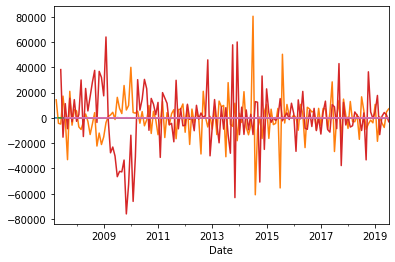

In [8]:
merge1_diff = merge1.copy()
[index_remove2,merge1_differenced] = ADF_Test(merge1_diff)
index_remove2
merge1_differenced

* Coincident Indicators

PAYEMS
1940-02-29 -0.236005
1940-03-31 -0.242996
1940-04-30 -0.086741
1940-05-31 -0.094797
1940-06-30 -0.148000
1940-07-31 -0.096172
1940-08-31 -0.014364
1940-09-30  0.014025
1940-10-31  0.030924
1940-11-30  0.129182
1940-12-31  0.232004
1941-01-31  0.271098
1941-02-28  0.348316
1941-03-31  0.399636
1941-04-30  0.502169
1941-05-31  0.631512
1941-06-30  0.743099
1941-07-31  0.848647
1941-08-31  0.793488
1941-09-30  0.722955
1941-10-31  0.618912
1941-11-30  0.450810
1941-12-31  0.239242
1942-01-31  0.159262
1942-02-28  0.050459
1942-03-31  0.051661
1942-04-30 -0.069723
1942-05-31 -0.266984
1942-06-30 -0.401715
1942-07-31 -0.539128
...              ...
2017-02-28 -0.014195
2017-03-31 -0.029552
2017-04-30 -0.024138
2017-05-31  0.000219
2017-06-30 -0.009373
2017-07-31 -0.019362
2017-08-31 -0.017154
2017-09-30 -0.039417
2017-10-31 -0.019566
2017-11-30 -0.012921
2017-12-31 -0.011428
2018-01-31 -0.025392
2018-02-28 -0.009436
2018-03-31 -0.000126
2018-04-30 -0.001193
2018-05-31  0.000228
2018-06-30  0.005141
2018-07-31  0.011299
2018-08-31  0.013591
2018-09-30  0.033108
2018-10-31  0.026418
2018-11-30  0.022181
2018-12-31  0.027447
2019-01-31  0.039858
2019-02-28  0.013838
2019-03-31  0.009082
2019-04-30  0.011146
2019-05-31 -0.008420
2019-06-30 -0.014079
2019-07-31 -0.013353

[942 rows x 1 columns]

DSPIC96
1960-02-29 -0.283672
1960-03-31 -0.368731
1960-04-30 -0.333759
1960-05-31 -0.331418
1960-06-30 -0.312941
1960-07-31 -0.207791
1960-08-31 -0.126005
1960-09-30 -0.097829
1960-10-31 -0.054754
1960-11-30 -0.162326
1960-12-31 -0.276545
1961-01-31 -0.191423
1961-02-28 -0.134543
1961-03-31 -0.071711
1961-04-30 -0.064348
1961-05-31  0.011928
1961-06-30  0.109474
1961-07-31  0.097977
1961-08-31  0.086868
1961-09-30  0.074293
1961-10-31  0.107140
1961-11-30  0.312520
1961-12-31  0.519053
1962-01-31  0.356019
1962-02-28  0.325653
1962-03-31  0.320757
1962-04-30  0.354984
1962-05-31  0.242965
1962-06-30  0.081409
1962-07-31  0.074251
...              ...
2017-02-28 -0.014403
2017-03-31 -0.013215
2017-04-30  0.051418
2017-05-31  0.132718
2017-06-30  0.138756
2017-07-31  0.135844
2017-08-31  0.149686
2017-09-30  0.142135
2017-10-31  0.144583
2017-11-30  0.123598
2017-12-31  0.166386
2018-01-31  0.179005
2018-02-28  0.143896
2018-03-31  0.098867
2018-04-30  0.104738
2018-05-31  0.040590
2018-06-30  0.082971
2018-07-31  0.083943
2018-08-31  0.094578
2018-09-30  0.072990
2018-10-31  0.049359
2018-11-30  0.027598
2018-12-31  0.044217
2019-01-31 -0.063097
2019-02-28 -0.037030
2019-03-31 -0.038243
2019-04-30 -0.054531
2019-05-31 -0.032088
2019-06-30 -0.063172
2019-07-31 -0.084839

[704 rows x 1 columns]

INDPRO
1920-03-31  2.760115
1920-04-30 -0.588333
1920-05-31  0.049271
1920-06-30 -1.000273
1920-07-31 -2.226304
1920-08-31 -2.054820
1920-09-30 -1.993846
1920-10-31 -2.134416
1920-11-30 -2.622761
1920-12-31 -3.089576
1921-04-30 -3.710677
1921-05-31 -3.853119
1921-06-30 -3.560955
1921-07-31 -2.712698
1921-08-31 -2.383360
1921-09-30 -1.895067
1921-10-31 -0.776209
1921-11-30  0.419215
1921-12-31  1.526600
1922-01-31  3.577688
1922-10-31  3.388956
1922-11-30  3.240841
1922-12-31  3.062970
1923-01-31  1.747370
1923-02-28  0.982338
1923-03-31  0.141784
1923-04-30  0.898629
1923-05-31  0.384595
1923-06-30 -0.557698
1923-07-31 -0.687955
...              ...
2017-02-28  0.293057
2017-03-31  0.457961
2017-04-30  0.466704
2017-05-31  0.456029
2017-06-30  0.368182
2017-07-31  0.371316
2017-08-31  0.333770
2017-09-30  0.301960
2017-10-31  0.364163
2017-11-30  0.383336
2017-12-31  0.219900
2018-01-31  0.250332
2018-02-28  0.283491
2018-03-31  0.152493
2018-04-30  0.086693
2018-05-31 -0.009296
2018-06-30  0.062132
2018-07-31  0.126916
2018-08-31  0.265216
2018-09-30  0.276783
2018-10-31  0.060557
2018-11-30  0.000246
2018-12-31  0.021226
2019-01-31  0.039666
2019-02-28 -0.092897
2019-03-31 -0.123661
2019-04-30 -0.252862
2019-05-31 -0.089093
2019-06-30 -0.185661
2019-07-31 -0.281225

[1158 rows x 1 columns]

CMRMTSPL
1968-02-29  0.068902
1968-03-31  0.044349
1968-04-30 -0.014829
1968-05-31  0.183950
1968-06-30  0.140064
1968-07-31  0.383064
1968-08-31 -0.107930
1968-09-30  0.035249
1968-10-31  0.258160
1968-11-30  0.052405
1968-12-31 -0.236979
1969-01-31 -0.133022
1969-02-28 -0.099488
1969-03-31 -0.132333
1969-04-30 -0.068732
1969-05-31 -0.197697
1969-06-30 -0.258232
1969-07-31 -0.468200
1969-08-31  0.019512
1969-09-30 -0.142649
1969-10-31 -0.329029
1969-11-30 -0.366811
1969-12-31 -0.043643
1970-01-31 -0.233753
1970-02-28 -0.278595
1970-03-31 -0.375945
1970-04-30 -0.506623
1970-05-31 -0.346914
1970-06-30 -0.245340
1970-07-31 -0.162005
...              ...
2017-01-31  0.160040
2017-02-28 -0.005355
2017-03-31  0.009181
2017-04-30  0.079652
2017-05-31  0.117568
2017-06-30  0.072612
2017-07-31  0.124306
2017-08-31  0.063195
2017-09-30  0.150417
2017-10-31  0.153829
2017-11-30  0.194379
2017-12-31  0.022229
2018-01-31 -0.010090
2018-02-28  0.088773
2018-03-31  0.110122
2018-04-30  0.123573
2018-05-31  0.047684
2018-06-30  0.017298
2018-07-31 -0.040896
2018-08-31 -0.029015
2018-09-30 -0.090762
2018-10-31 -0.170179
2018-11-30 -0.272138
2018-12-31 -0.251514
2019-01-31  0.022350
2019-02-28 -0.053436
2019-03-31 -0.048249
2019-04-30 -0.110777
2019-05-31 -0.145940
2019-06-30 -0.028174

[607 rows x 1 columns]

PCE
1960-03-31 -0.057104
1960-05-31 -0.314058
1960-06-30 -0.377616
1960-07-31 -0.228208
1960-08-31 -0.294467
1960-09-30 -0.345175
1960-10-31 -0.192283
1960-11-30 -0.176152
1960-12-31 -0.271952
1961-01-31 -0.244728
1961-02-28 -0.199768
1961-03-31 -0.266624
1961-05-31 -0.112294
1961-06-30 -0.037683
1961-07-31 -0.121010
1961-08-31 -0.031750
1961-09-30  0.037320
1961-10-31 -0.047766
1961-11-30  0.036186
1961-12-31  0.300508
1962-01-31  0.292235
1962-02-28  0.279666
1962-03-31  0.285319
1962-04-30  0.484975
1962-05-31  0.278616
1962-06-30  0.195265
1962-07-31  0.265783
1962-08-31  0.232088
1962-09-30  0.299916
1962-10-31  0.196306
...              ...
2017-02-28  0.039379
2017-03-31  0.125468
2017-04-30  0.068411
2017-05-31  0.058100
2017-06-30  0.003092
2017-07-31  0.036211
2017-08-31  0.039924
2017-09-30  0.037221
2017-10-31  0.025163
2017-11-30  0.064462
2017-12-31  0.029648
2018-01-31 -0.005680
2018-02-28  0.035281
2018-03-31 -0.000384
2018-04-30  0.054271
2018-05-31  0.124998
2018-06-30  0.147904
2018-07-31  0.173142
2018-08-31  0.170936
2018-09-30  0.059049
2018-10-31  0.061449
2018-11-30  0.000347
2018-12-31 -0.116207
2019-01-31 -0.068614
2019-02-28 -0.085560
2019-03-31 -0.047855
2019-04-30 -0.071064
2019-05-31 -0.131305
2019-06-30 -0.132625
2019-07-31 -0.150837

[705 rows x 1 columns]

RRSFS
1993-02-28 -0.848248
1993-03-31 -0.579273
1993-04-30  0.217550
1993-05-31  0.246993
1993-06-30  0.154594
1993-07-31  0.275531
1993-08-31  0.187865
1993-09-30  0.128580
1993-10-31  0.103178
1993-11-30  0.172850
1993-12-31  0.121148
1994-01-31 -0.011983
1994-02-28  0.249556
1994-03-31  0.487490
1994-04-30  0.150393
1994-05-31  0.018952
1994-06-30  0.128150
1994-07-31 -0.055427
1994-08-31  0.061485
1994-09-30  0.098831
1994-10-31  0.161059
1994-11-30  0.017185
1994-12-31  0.016792
1995-01-31  0.210150
1995-02-28 -0.243265
1995-03-31 -0.525826
1995-04-30 -0.337031
1995-05-31 -0.121394
1995-06-30 -0.199457
1995-07-31 -0.122065
...              ...
2017-02-28 -0.105603
2017-03-31  0.077421
2017-04-30  0.102212
2017-05-31  0.101374
2017-06-30 -0.001229
2017-07-31  0.056230
2017-08-31  0.055870
2017-09-30  0.122149
2017-10-31  0.100824
2017-11-30  0.195138
2017-12-31  0.130467
2018-01-31 -0.067534
2018-02-28  0.069770
2018-03-31  0.028477
2018-04-30 -0.025004
2018-05-31  0.127818
2018-06-30  0.120687
2018-07-31  0.138791
2018-08-31  0.153841
2018-09-30 -0.105812
2018-10-31 -0.066282
2018-11-30 -0.163927
2018-12-31 -0.307918
2019-01-31 -0.090281
2019-02-28 -0.173408
2019-03-31 -0.046834
2019-04-30 -0.036359
2019-05-31 -0.198029
2019-06-30 -0.124975
2019-07-31 -0.151005

[311 rows x 1 columns]

S423SMM144SCEN
1993-04-30       -1.425233
1993-05-31       -0.233774
1993-06-30       -1.010502
1993-07-31       -0.475233
1993-08-31       -0.409771
1993-09-30       -0.412298
1993-10-31       -0.350983
1993-11-30       -0.520526
1993-12-31       -0.517518
1994-01-31       -0.603696
1994-02-28       -0.309325
1994-03-31        0.357063
1994-04-30       -0.026541
1994-05-31       -0.363103
1994-06-30        0.147591
1994-07-31       -0.174580
1994-08-31        0.163376
1994-09-30        0.168913
1994-10-31        0.256789
1994-11-30        0.465564
1994-12-31        0.738260
1995-01-31        0.705402
1995-02-28        0.673431
1995-03-31        0.016793
1995-04-30        0.286862
1995-05-31        0.363610
1995-06-30        0.130647
1995-07-31        0.131782
1995-08-31       -0.407627
1995-09-30       -0.271881
...                    ...
2017-01-31        0.979374
2017-02-28        0.533311
2017-03-31        0.534999
2017-04-30        0.811296
2017-05-31        0.694502
2017-06-30        0.390797
2017-07-31        0.455948
2017-08-31        0.647128
2017-09-30        0.798668
2017-10-31        0.699777
2017-11-30        0.748457
2017-12-31        0.318223
2018-01-31       -0.060638
2018-02-28        0.146534
2018-03-31        0.230519
2018-04-30       -0.027505
2018-05-31        0.202201
2018-06-30        0.327231
2018-07-31        0.275898
2018-08-31        0.038250
2018-09-30       -0.116488
2018-10-31       -0.269391
2018-11-30       -0.534226
2018-12-31       -0.404619
2019-01-31       -0.105960
2019-02-28       -0.394870
2019-03-31       -0.450186
2019-04-30       -0.429302
2019-05-31       -0.705727
2019-06-30       -0.681695

[305 rows x 1 columns]

PPIACO
1914-02-28  0.829880
1914-03-31 -0.010594
1914-04-30 -0.007063
1914-05-31 -0.010685
1914-06-30 -0.008548
1914-07-31 -0.146594
1914-08-31  0.358656
1914-09-30  0.210943
1914-10-31 -0.186013
1914-11-30 -0.085107
1914-12-31 -0.003885
1915-01-31  0.209216
1915-02-28  0.140059
1915-03-31  0.281904
1915-04-30  0.281904
1915-05-31  0.425555
1915-06-30  0.355231
1915-07-31  0.495290
1915-08-31 -0.140059
1915-09-30 -0.140629
1915-10-31  0.628864
1915-11-30  0.696892
1915-12-31  1.033111
1916-01-31  0.997204
1916-02-29  1.121585
1916-03-31  1.293988
1916-04-30  1.413038
1916-05-31  1.259752
1916-06-30  1.458880
1916-07-31  1.376304
...              ...
2017-02-28  0.899171
2017-03-31  0.838864
2017-04-30  0.777358
2017-05-31  0.687181
2017-06-30  0.576196
2017-07-31  0.524418
2017-08-31  0.548888
2017-09-30  0.442516
2017-10-31  0.393828
2017-11-30  0.391835
2017-12-31  0.140403
2018-01-31 -0.052860
2018-02-28 -0.132128
2018-03-31 -0.086737
2018-04-30 -0.124881
2018-05-31  0.107167
2018-06-30  0.181863
2018-07-31  0.198995
2018-08-31  0.087403
2018-09-30  0.023202
2018-10-31  0.046556
2018-11-30 -0.150822
2018-12-31 -0.153984
2019-01-31 -0.258458
2019-02-28 -0.332527
2019-03-31 -0.270210
2019-04-30 -0.234831
2019-05-31 -0.507822
2019-06-30 -0.604912
2019-07-31 -0.588305

[1244 rows x 1 columns]

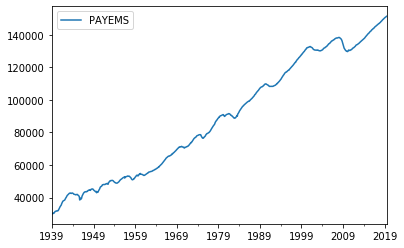

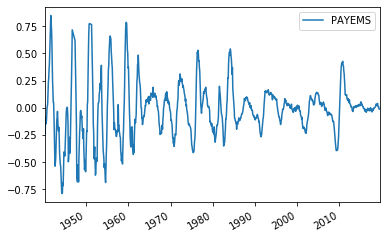

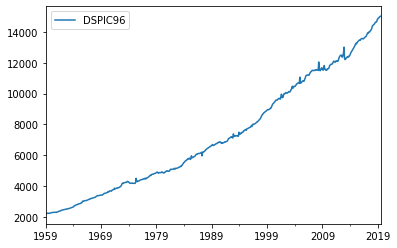

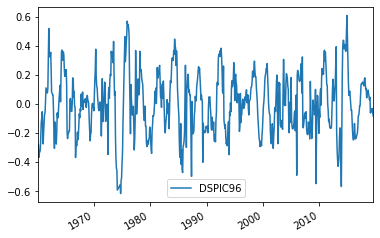

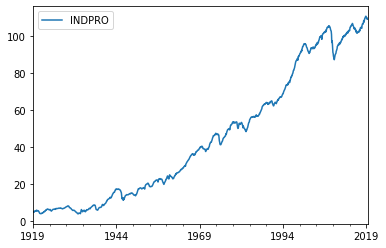

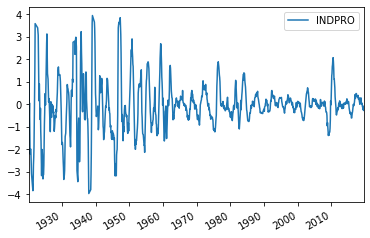

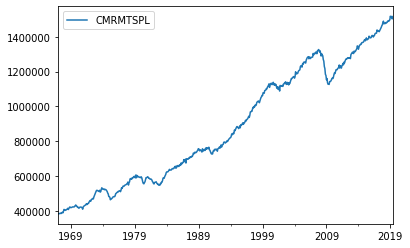

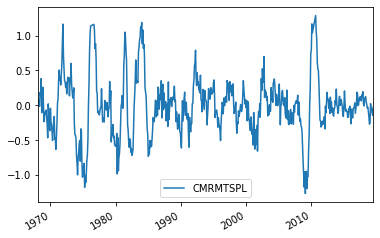

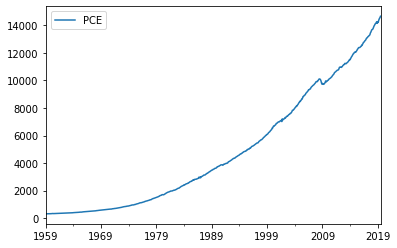

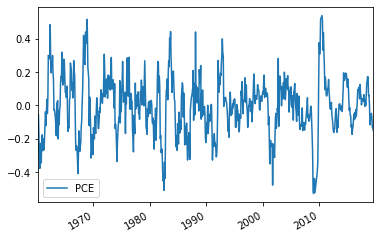

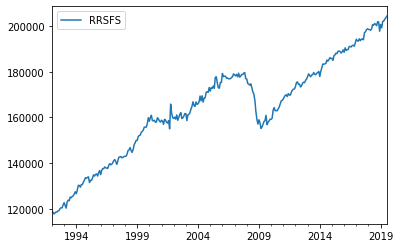

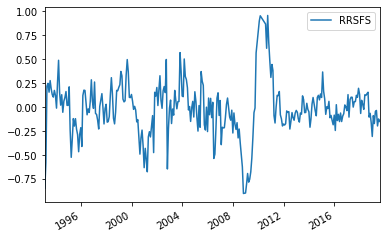

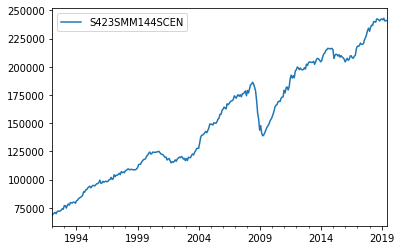

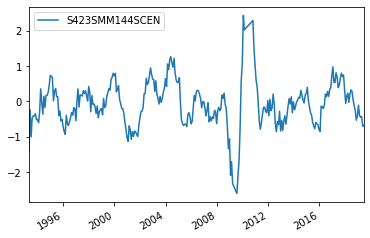

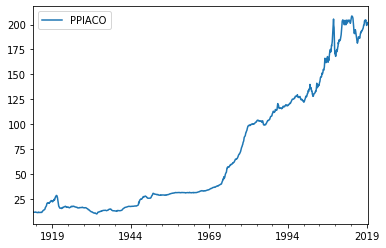

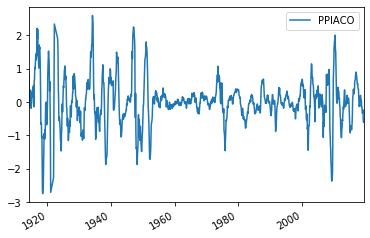

In [9]:
# Coincident Indicators from Fred Data
coincident_fred = ['PAYEMS','DSPIC96','INDPRO','CMRMTSPL','PCE','RRSFS','S423SMM144SCEN','PPIACO']
coincident_df = {}
for i in range(0,len(coincident_fred)):
    data = fred.get_series(coincident_fred[i]).dropna()
    data_series = pd.DataFrame(data,columns=[coincident_fred[i]])
    data_series = data_series.resample('M').sum().dropna()
    data_series.plot()
    data_series = np.log(data_series).diff().dropna()*100
    data_series = data_series.diff(periods=12).dropna()
    data_series = data_series.rolling(12, min_periods=1).mean()
    z = np.abs(stats.zscore(data_series))
    data_series_o = data_series[(z < 3).all(axis=1)]
    data_series_o.plot()
    coincident_df[coincident_fred[i]] = data_series_o
    data_series_o

In [10]:
merge2 = Merge(coincident_df,coincident_fred)
merge2.index.name='Date'
merge2

R1000    R1000G     R1000V     SP500    PAYEMS   DSPIC96  \
Date                                                                      
2002-10-31  8.710151  7.831176   6.907849  8.291442  0.004206  0.147638   
2002-11-30  5.192548  5.500032   5.822577  5.550058  0.055747  0.131342   
2002-12-31 -7.291105 -5.998594  -4.650805 -6.222928  0.076576  0.139069   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749  0.099263 -0.139311   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984  0.111199 -0.159950   
2003-03-31  1.749153  0.887685  -0.025528  0.832287  0.097305 -0.113320   
2003-04-30  7.076132  7.636873   8.234498  7.792735  0.088249 -0.151563   
2003-05-31  4.777050  5.372610   5.996177  4.964567  0.084787 -0.163442   
2003-06-30  1.251348  1.166838   1.079230  1.125863  0.071424 -0.175391   
2003-07-31  2.402049  1.831130   1.248816  1.609351  0.075028  0.099308   
2003-08-31  2.361945  1.850221   1.320796  1.771534  0.063512  0.305734   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623  0.064845  0.137041   
2003-10-31  5.379164  5.548351   5.724132  5.350427  0.041608 -0.007681   
2003-11-30  0.945482  1.027573   1.113868  0.710323  0.024424  0.014362   
2003-12-31  3.282110  4.513700   5.770335  4.951890  0.039912 -0.012750   
2004-01-31  1.982772  1.775387   1.564719  1.712888  0.029517  0.142816   
2004-02-29  0.508854  1.210404   1.914144  1.213510  0.042996  0.207337   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422  0.089058  0.198603   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339  0.106729  0.175951   
2004-05-31  1.738915  1.270972   0.795082  1.201102  0.123371  0.122251   
2004-06-30  1.137139  1.639801   2.147690  1.782919  0.132695  0.098532   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224  0.130750 -0.110267   
2004-08-31 -0.628061  0.319647   1.204977  0.228472  0.141555 -0.199733   
2004-09-30  0.879950  1.109106   1.319269  0.932034  0.132088  0.009624   
2004-10-31  1.491633  1.474818   1.458525  1.391696  0.137182 -0.026069   
2004-11-30  3.255415  4.012631   4.706808  3.786878  0.137768 -0.128237   
2004-12-31  3.764679  3.394976   3.057709  3.194249  0.121626  0.180742   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575  0.114541 -0.108001   
2005-02-28  0.929152  2.020492   2.990637  1.872693  0.114898 -0.155212   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275  0.069097 -0.172507   
...              ...       ...        ...       ...       ...       ...   
2017-01-31  3.246062  1.889957   0.577924  1.772630 -0.009963 -0.055815   
2017-02-28  3.893583  3.570075   3.251692  3.652310 -0.014195 -0.014403   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931 -0.029552 -0.013215   
2017-04-30  2.181269  0.940558  -0.331047  0.905014 -0.024138  0.051418   
2017-05-31  2.383220  1.033628  -0.384645  1.150972  0.000219  0.132718   
2017-06-30 -0.377620  0.547824   1.437704  0.480228 -0.009373  0.138756   
2017-07-31  2.555833  1.847336   1.162697  1.916396 -0.019362  0.135844   
2017-08-31  1.633451  0.075963  -1.459676  0.054634 -0.017154  0.149686   
2017-09-30  1.201057  1.972947   2.740088  1.911896 -0.039417  0.142135   
2017-10-31  3.733605  2.162013   0.580499  2.194560 -0.019566  0.144583   
2017-11-30  2.799006  2.763013   2.727175  2.769552 -0.012921  0.123598   
2017-12-31  0.693780  0.975856   1.263428  0.978360 -0.011428  0.166386   
2018-01-31  6.785496  5.248504   3.659400  5.465742 -0.025392  0.179005   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612 -0.009436  0.143896   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251 -0.000126  0.098867   
2018-04-30  0.280503  0.232515   0.181893  0.271511 -0.001193  0.104738   
2018-05-31  4.114378  2.291228   0.302141  2.137820  0.000228  0.040590   
2018-06-30  0.861540  0.507924   0.069077  0.483071  0.005141  0.082971   
2018-07-31  2.842282  3.283340   3.714599  3.538798  0.011299  0.083943   
2018-08-31  5.162683  3.175230   1.203347  2.981432  0.013591  0.094578   
2018-09-30  0.473600  0.238122  -0.00080

0
0
0
0
0
0
0
0
0


[]

R1000    R1000G     R1000V     SP500    PAYEMS   DSPIC96  \
Date                                                                      
2002-10-31  8.710151  7.831176   6.907849  8.291442  0.004206  0.147638   
2002-11-30  5.192548  5.500032   5.822577  5.550058  0.055747  0.131342   
2002-12-31 -7.291105 -5.998594  -4.650805 -6.222928  0.076576  0.139069   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749  0.099263 -0.139311   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984  0.111199 -0.159950   
2003-03-31  1.749153  0.887685  -0.025528  0.832287  0.097305 -0.113320   
2003-04-30  7.076132  7.636873   8.234498  7.792735  0.088249 -0.151563   
2003-05-31  4.777050  5.372610   5.996177  4.964567  0.084787 -0.163442   
2003-06-30  1.251348  1.166838   1.079230  1.125863  0.071424 -0.175391   
2003-07-31  2.402049  1.831130   1.248816  1.609351  0.075028  0.099308   
2003-08-31  2.361945  1.850221   1.320796  1.771534  0.063512  0.305734   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623  0.064845  0.137041   
2003-10-31  5.379164  5.548351   5.724132  5.350427  0.041608 -0.007681   
2003-11-30  0.945482  1.027573   1.113868  0.710323  0.024424  0.014362   
2003-12-31  3.282110  4.513700   5.770335  4.951890  0.039912 -0.012750   
2004-01-31  1.982772  1.775387   1.564719  1.712888  0.029517  0.142816   
2004-02-29  0.508854  1.210404   1.914144  1.213510  0.042996  0.207337   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422  0.089058  0.198603   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339  0.106729  0.175951   
2004-05-31  1.738915  1.270972   0.795082  1.201102  0.123371  0.122251   
2004-06-30  1.137139  1.639801   2.147690  1.782919  0.132695  0.098532   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224  0.130750 -0.110267   
2004-08-31 -0.628061  0.319647   1.204977  0.228472  0.141555 -0.199733   
2004-09-30  0.879950  1.109106   1.319269  0.932034  0.132088  0.009624   
2004-10-31  1.491633  1.474818   1.458525  1.391696  0.137182 -0.026069   
2004-11-30  3.255415  4.012631   4.706808  3.786878  0.137768 -0.128237   
2004-12-31  3.764679  3.394976   3.057709  3.194249  0.121626  0.180742   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575  0.114541 -0.108001   
2005-02-28  0.929152  2.020492   2.990637  1.872693  0.114898 -0.155212   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275  0.069097 -0.172507   
...              ...       ...        ...       ...       ...       ...   
2017-01-31  3.246062  1.889957   0.577924  1.772630 -0.009963 -0.055815   
2017-02-28  3.893583  3.570075   3.251692  3.652310 -0.014195 -0.014403   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931 -0.029552 -0.013215   
2017-04-30  2.181269  0.940558  -0.331047  0.905014 -0.024138  0.051418   
2017-05-31  2.383220  1.033628  -0.384645  1.150972  0.000219  0.132718   
2017-06-30 -0.377620  0.547824   1.437704  0.480228 -0.009373  0.138756   
2017-07-31  2.555833  1.847336   1.162697  1.916396 -0.019362  0.135844   
2017-08-31  1.633451  0.075963  -1.459676  0.054634 -0.017154  0.149686   
2017-09-30  1.201057  1.972947   2.740088  1.911896 -0.039417  0.142135   
2017-10-31  3.733605  2.162013   0.580499  2.194560 -0.019566  0.144583   
2017-11-30  2.799006  2.763013   2.727175  2.769552 -0.012921  0.123598   
2017-12-31  0.693780  0.975856   1.263428  0.978360 -0.011428  0.166386   
2018-01-31  6.785496  5.248504   3.659400  5.465742 -0.025392  0.179005   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612 -0.009436  0.143896   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251 -0.000126  0.098867   
2018-04-30  0.280503  0.232515   0.181893  0.271511 -0.001193  0.104738   
2018-05-31  4.114378  2.291228   0.302141  2.137820  0.000228  0.040590   
2018-06-30  0.861540  0.507924   0.069077  0.483071  0.005141  0.082971   
2018-07-31  2.842282  3.283340   3.714599  3.538798  0.011299  0.083943   
2018-08-31  5.162683  3.175230   1.203347  2.981432  0.013591  0.094578   
2018-09-30  0.473600  0.238122  -0.00080

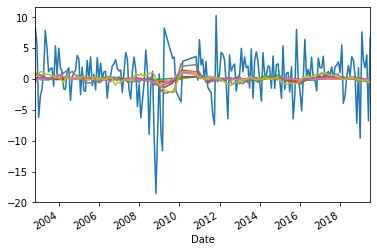

In [11]:
# ADF Test
merge2_diff = merge2.copy()

[index_remove2,merge2_differenced]=ADF_Test(merge2_diff)
index_remove2
merge2_differenced

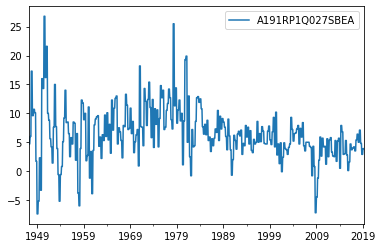

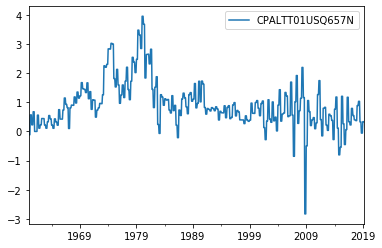

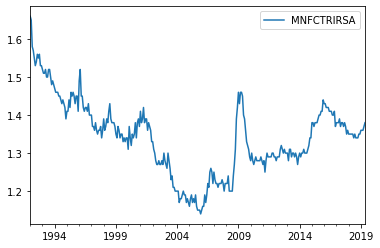

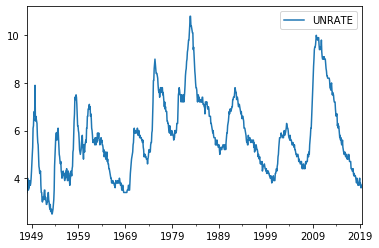

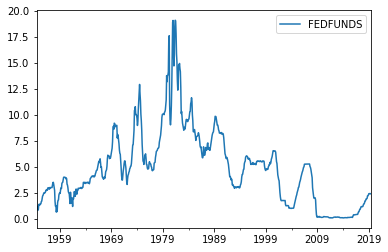

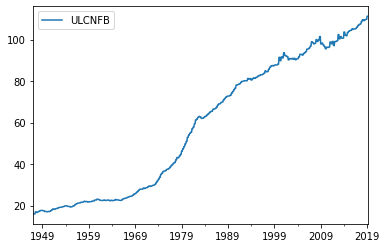

In [12]:
lagging_fred = ['A191RP1Q027SBEA','CPALTT01USQ657N','MNFCTRIRSA','UNRATE','FEDFUNDS','ULCNFB']
lagging_df = {}
for i in range(0,len(lagging_fred)):
    data = fred.get_series(lagging_fred[i]).dropna()
    data_series = pd.DataFrame(data,columns=[lagging_fred[i]])
    data_series = data_series.asfreq(freq='M',method='ffill')
    data_series.plot()
#     data_series
    lagging_df[lagging_fred[i]] = data_series

In [13]:
# Eliminate Seasonality
for i in range(0,len(lagging_fred)):
    lagging_df[lagging_fred[i]] = lagging_df[lagging_fred[i]].diff(periods=12).dropna()

# Merge all Indicators and Indices
merge3 = Merge(lagging_df,lagging_fred)
merge3

R1000    R1000G     R1000V     SP500  A191RP1Q027SBEA  \
Date                                                                   
2002-10-31  8.710151  7.831176   6.907849  8.291442              0.5   
2002-11-30  5.192548  5.500032   5.822577  5.550058              0.5   
2002-12-31 -7.291105 -5.998594  -4.650805 -6.222928              0.5   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749             -0.8   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984             -0.8   
2003-03-31  1.749153  0.887685  -0.025528  0.832287             -0.8   
2003-04-30  7.076132  7.636873   8.234498  7.792735              0.8   
2003-05-31  4.777050  5.372610   5.996177  4.964567              0.8   
2003-06-30  1.251348  1.166838   1.079230  1.125863              0.8   
2003-07-31  2.402049  1.831130   1.248816  1.609351              5.6   
2003-08-31  2.361945  1.850221   1.320796  1.771534              5.6   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623              5.6   
2003-10-31  5.379164  5.548351   5.724132  5.350427              4.3   
2003-11-30  0.945482  1.027573   1.113868  0.710323              4.3   
2003-12-31  3.282110  4.513700   5.770335  4.951890              4.3   
2004-01-31  1.982772  1.775387   1.564719  1.712888              1.1   
2004-02-29  0.508854  1.210404   1.914144  1.213510              1.1   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422              1.1   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339              1.8   
2004-05-31  1.738915  1.270972   0.795082  1.201102              1.8   
2004-06-30  1.137139  1.639801   2.147690  1.782919              1.8   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224             -2.7   
2004-08-31 -0.628061  0.319647   1.204977  0.228472             -2.7   
2004-09-30  0.879950  1.109106   1.319269  0.932034             -2.7   
2004-10-31  1.491633  1.474818   1.458525  1.391696              0.1   
2004-11-30  3.255415  4.012631   4.706808  3.786878              0.1   
2004-12-31  3.764679  3.394976   3.057709  3.194249              0.1   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575              2.7   
2005-02-28  0.929152  2.020492   2.990637  1.872693              2.7   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275              2.7   
...              ...       ...        ...       ...              ...   
2016-10-31 -2.462936 -2.083523  -1.711283 -1.961678              3.9   
2016-11-30  1.934488  3.604850   5.257402  3.360347              3.9   
2016-12-31  1.120583  1.704111   2.265861  1.803710              3.9   
2017-01-31  3.246062  1.889957   0.577924  1.772630              2.6   
2017-02-28  3.893583  3.570075   3.251692  3.652310              2.6   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931              2.6   
2017-04-30  2.181269  0.940558  -0.331047  0.905014             -1.2   
2017-05-31  2.383220  1.033628  -0.384645  1.150972             -1.2   
2017-06-30 -0.377620  0.547824   1.437704  0.480228             -1.2   
2017-07-31  2.555833  1.847336   1.162697  1.916396              1.7   
2017-08-31  1.633451  0.075963  -1.459676  0.054634              1.7   
2017-09-30  1.201057  1.972947   2.740088  1.911896              1.7   
2017-10-31  3.733605  2.162013   0.580499  2.194560              2.4   
2017-11-30  2.799006  2.763013   2.727175  2.769552              2.4   
2017-12-31  0.693780  0.975856   1.263428  0.978360              2.4   
2018-01-31  6.785496  5.248504   3.659400  5.465742              0.8   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612              0.8   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251              0.8   
2018-04-30  0.280503  0.232515   0.181893  0.271511              3.6   
2018-05-31  4.114378  2.291228   0.302141  2.137820              3.6   
2018-06-30  0.861540  0.507924   0.069077  0.483071              3.6   
2018-07-31  2.842282  3.283340   3.714599  3.538798             -0.6   
2018-08-31  5.162683  3.175230   1.203347  2.981432    

0
0
0
0
1
1
1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[]

R1000    R1000G     R1000V     SP500  A191RP1Q027SBEA  \
Date                                                                   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749             -0.8   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984             -0.8   
2003-03-31  1.749153  0.887685  -0.025528  0.832287             -0.8   
2003-04-30  7.076132  7.636873   8.234498  7.792735              0.8   
2003-05-31  4.777050  5.372610   5.996177  4.964567              0.8   
2003-06-30  1.251348  1.166838   1.079230  1.125863              0.8   
2003-07-31  2.402049  1.831130   1.248816  1.609351              5.6   
2003-08-31  2.361945  1.850221   1.320796  1.771534              5.6   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623              5.6   
2003-10-31  5.379164  5.548351   5.724132  5.350427              4.3   
2003-11-30  0.945482  1.027573   1.113868  0.710323              4.3   
2003-12-31  3.282110  4.513700   5.770335  4.951890              4.3   
2004-01-31  1.982772  1.775387   1.564719  1.712888              1.1   
2004-02-29  0.508854  1.210404   1.914144  1.213510              1.1   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422              1.1   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339              1.8   
2004-05-31  1.738915  1.270972   0.795082  1.201102              1.8   
2004-06-30  1.137139  1.639801   2.147690  1.782919              1.8   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224             -2.7   
2004-08-31 -0.628061  0.319647   1.204977  0.228472             -2.7   
2004-09-30  0.879950  1.109106   1.319269  0.932034             -2.7   
2004-10-31  1.491633  1.474818   1.458525  1.391696              0.1   
2004-11-30  3.255415  4.012631   4.706808  3.786878              0.1   
2004-12-31  3.764679  3.394976   3.057709  3.194249              0.1   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575              2.7   
2005-02-28  0.929152  2.020492   2.990637  1.872693              2.7   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275              2.7   
2005-04-30 -1.970686 -1.979256  -1.985863 -2.031352             -1.8   
2005-05-31  4.584695  3.307338   2.170843  2.951222             -1.8   
2005-06-30 -0.450992  0.254224   0.871363 -0.014269             -1.8   
...              ...       ...        ...       ...              ...   
2016-10-31 -2.462936 -2.083523  -1.711283 -1.961678              3.9   
2016-11-30  1.934488  3.604850   5.257402  3.360347              3.9   
2016-12-31  1.120583  1.704111   2.265861  1.803710              3.9   
2017-01-31  3.246062  1.889957   0.577924  1.772630              2.6   
2017-02-28  3.893583  3.570075   3.251692  3.652310              2.6   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931              2.6   
2017-04-30  2.181269  0.940558  -0.331047  0.905014             -1.2   
2017-05-31  2.383220  1.033628  -0.384645  1.150972             -1.2   
2017-06-30 -0.377620  0.547824   1.437704  0.480228             -1.2   
2017-07-31  2.555833  1.847336   1.162697  1.916396              1.7   
2017-08-31  1.633451  0.075963  -1.459676  0.054634              1.7   
2017-09-30  1.201057  1.972947   2.740088  1.911896              1.7   
2017-10-31  3.733605  2.162013   0.580499  2.194560              2.4   
2017-11-30  2.799006  2.763013   2.727175  2.769552              2.4   
2017-12-31  0.693780  0.975856   1.263428  0.978360              2.4   
2018-01-31  6.785496  5.248504   3.659400  5.465742              0.8   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612              0.8   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251              0.8   
2018-04-30  0.280503  0.232515   0.181893  0.271511              3.6   
2018-05-31  4.114378  2.291228   0.302141  2.137820              3.6   
2018-06-30  0.861540  0.507924   0.069077  0.483071              3.6   
2018-07-31  2.842282  3.283340   3.714599  3.538798             -0.6   
2018-08-31  5.162683  3.175230   1.203347  2.981432    

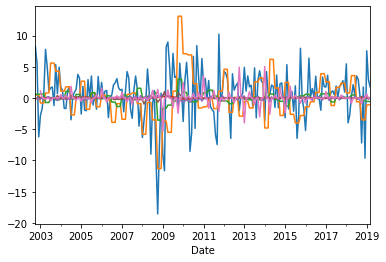

In [23]:
# ADF Test: test whether the series is stationary or not, take the difference if not stationary
merge3_diff = merge3.copy()

[index_remove3,merge3_differenced]=ADF_Test(merge3_diff)
index_remove3
merge3_differenced

#### 2.1.1 Forecast the returns for SP500

In [24]:
# Testing Causation using Granger’s Causality Test
maxlag = 12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

# Grangers Causation Test, drop the indicator that do not pass the test
def causation_test(df_differenced,n,m):
    df_select = df_differenced.copy()
    df_select = pd.concat([df_select.iloc[:,n],df_select.iloc[:,m:]], axis=1)
    print(df_select)
    causation_matrix = grangers_causation_matrix(df_select, variables = df_select.columns)
    index_remove=[]
    for i in causation_matrix.iloc[0,1:]:
        if i>0.05:
            index_remove.append(causation_matrix.columns.get_loc((causation_matrix == i).idxmax(axis=1)[0])+m-1) 
            # get column index of indicators whose p-value>0.05
    df_differenced = df_differenced.drop(df_differenced.columns[index_remove],axis=1) # drop columns whose p-value>0.05
    return causation_matrix,index_remove,df_differenced

In [25]:
[causation_matrix,index_remove,merge1_tested] = causation_test(merge1_differenced,3,4)
causation_matrix
index_remove
merge1_tested

                SP500  DGORDER  PERMIT     ICSA      AWHAEMAN  \
Date                                                            
2007-08-31   1.278156   -722.0     1.0  11300.0  1.000000e-01   
2007-09-30   3.516828 -33032.0     7.0  -8550.0  0.000000e+00   
2007-10-31   1.471356  21007.0    16.0  15550.0 -3.000000e-01   
2007-11-30  -4.504279  -5756.0    67.0  -3000.0  3.000000e-01   
2007-12-31  -0.866593   6528.0  -178.0  14450.0  0.000000e+00   
2008-01-31  -6.311391   5531.0   -43.0  -2700.0 -2.000000e-01   
2008-02-29  -3.537971  -7137.0   -52.0   2500.0  2.000000e-01   
2008-03-31  -0.597741  -9163.0   -45.0  30000.0  0.000000e+00   
2008-04-30   4.645094  -3303.0   167.0 -14750.0 -3.000000e-01   
2008-05-31   1.061759   3094.0   -36.0  23300.0  1.000000e-01   
2008-06-30  -8.988355  -2748.0   271.0   5500.0 -1.000000e-01   
2008-07-31  -0.990830 -13147.0  -213.0  16700.0 -1.000000e-01   
2008-08-31   1.211680  -4725.0   -23.0  28250.0  0.000000e+00   
2008-09-30  -9.518079   4

SP500_x  DGORDER_x  PERMIT_x  ICSA_x  AWHAEMAN_x  \
SP500_y             1.0000     0.0464    0.2384  0.0473      0.3905   
DGORDER_y           0.0038     1.0000    0.0895  0.0000      0.0000   
PERMIT_y            0.0071     0.0000    1.0000  0.0000      0.0017   
ICSA_y              0.0065     0.0535    0.0216  1.0000      0.1471   
AWHAEMAN_y          0.0000     0.0000    0.0001  0.0000      1.0000   
CSCICP03USM665S_y   0.0917     0.1197    0.0075  0.2277      0.0574   
T10Y3M_y            0.0056     0.0001    0.0000  0.1609      0.0978   

                   CSCICP03USM665S_x  T10Y3M_x  
SP500_y                       0.0029    0.1866  
DGORDER_y                     0.0037    0.5878  
PERMIT_y                      0.0049    0.0001  
ICSA_y                        0.0001    0.0050  
AWHAEMAN_y                    0.0100    0.0003  
CSCICP03USM665S_y             1.0000    0.0000  
T10Y3M_y                      0.0445    1.0000

[5, 7, 9]

R1000     R1000G     R1000V      SP500  DGORDER     ICSA  \
Date                                                                       
2007-08-31   1.451094   1.343026   0.824544   1.278156   -722.0  11300.0   
2007-09-30   4.013039   3.400576   3.169563   3.516828 -33032.0  -8550.0   
2007-10-31   3.287222   1.625314  -0.139933   1.471356  21007.0  15550.0   
2007-11-30  -3.887221  -4.575993  -5.321445  -4.504279  -5756.0  -3000.0   
2007-12-31  -0.469530  -0.824280  -1.214891  -0.866593   6528.0  14450.0   
2008-01-31  -8.177504  -6.302100  -4.271911  -6.311391   5531.0  -2700.0   
2008-02-29  -2.147421  -3.323734  -4.587407  -3.537971  -7137.0   2500.0   
2008-03-31  -0.723745  -0.843280  -0.972388  -0.597741  -9163.0  30000.0   
2008-04-30   5.051552   4.838550   4.606064   4.645094  -3303.0 -14750.0   
2008-05-31   3.463409   1.607319  -0.449713   1.061759   3094.0  23300.0   
2008-06-30  -7.581258  -8.848446 -10.320302  -8.988355  -2748.0   5500.0   
2008-07-31  -1.983120  -1.309697  -0.583980  -0.990830 -13147.0  16700.0   
2008-08-31   0.919754   1.160272   1.420719   1.211680  -4725.0  28250.0   
2008-09-30 -12.663713 -10.319972  -7.893354  -9.518079   4154.0  37600.0   
2008-10-31 -19.213874 -19.240826 -19.266675 -18.563649 -22262.0  -3600.0   
2008-11-30  -8.524662  -8.180672  -7.839137  -7.779835 -12002.0  36800.0   
2008-12-31   1.585869   1.308314   1.029820   0.779114 -21062.0  32000.0   
2009-01-31  -4.990750  -8.656976 -12.439555  -8.954989 -14990.0  17450.0   
2009-02-28  -8.058801 -11.278515 -14.847023 -11.645654  -3772.0  64000.0   
2009-03-31   8.352894   8.179480   7.983105   8.195274   1051.0  -1400.0   
2009-04-30   9.069183   9.489713   9.965882   8.977221   2325.0 -27600.0   
2009-05-31   4.631017   5.131951   5.691168   5.172056   4451.0 -23050.0   
2009-06-30   0.955655   0.063731  -0.947814   0.019582  -1258.0 -30200.0   
2009-07-31   6.778741   7.220907   7.681294   7.152198  16259.0 -46500.0   
2009-08-31   1.842496   3.338834   4.851332   3.300932   7521.0 -42300.0   
2009-09-30   4.036280   3.824114   3.613123   3.510010   3443.0 -42700.0   
2009-10-31  -1.439247  -2.349930  -3.259107  -1.995987  25614.0 -33350.0   
2009-11-30   5.747930   5.479906   5.206403   5.577902   6264.0 -75950.0   
2009-12-31   2.910690   2.247248   1.571612   1.761455   9834.0 -52700.0   
2010-01-31  -4.520717  -3.762659  -2.989845  -3.767514  39990.0 -13700.0   
...               ...        ...        ...        ...      ...      ...   
2017-02-28   3.893583   3.570075   3.251692   3.652310   7490.0   4650.0   
2017-03-31   1.026074  -0.097658  -1.221718  -0.038931   7186.0  13250.0   
2017-04-30   2.181269   0.940558  -0.331047   0.905014  -9038.0  -9250.0   
2017-05-31   2.383220   1.033628  -0.384645   1.150972   4061.0 -11250.0   
2017-06-30  -0.377620   0.547824   1.437704   0.480228  28489.0  10500.0   
2017-07-31   2.555833   1.847336   1.162697   1.916396 -26588.0   8750.0   
2017-08-31   1.633451   0.075963  -1.459676   0.054634   1001.0  -8500.0   
2017-09-30   1.201057   1.972947   2.740088   1.911896  13830.0  42950.0   
2017-10-31   3.733605   2.162013   0.580499   2.194560 -18529.0 -37700.0   
2017-11-30   2.799006   2.763013   2.727175   2.769552  14849.0  12250.0   
2017-12-31   0.693780   0.975856   1.263428   0.978360   2245.0  -5600.0   
2018-01-31   6.785496   5.248504   3.659400   5.465742  -8328.0    600.0   
2018-02-28  -2.815429  -3.946459  -5.149210  -3.972612  12988.0  -7250.0   
2018-03-31  -2.890414  -2.451827  -1.980362  -2.725251  -2864.0  -6200.0   
2018-04-30   0.280503   0.232515   0.181893   0.271511  -3020.0   4700.0   
2018-05-31   4.114378   2.291228   0.302141   2.137820   2765.0   2000.0   
2018-06-30   0.861540   0.507924   0.069077   0.483071 -16954.0   -250.0   
2018-07-31   2.842282   3.283340   3.714599   3.538798  16676.0  -9950.0   
2018-08-31   5.162683   3.175230   1.203347   2.981432   5556.0   3950.0   
2018-09-30   0.473600   0.238122  -0.000802   0.428511  -9079.0 

In [26]:
# Build VAR Model
def VAR_Model(df_differenced,n,m,test_size):
    # Split the data into trainset and testset
    df = df_differenced.copy()
    df = pd.concat([df.iloc[:,n],df.iloc[:,m:]], axis=1)
    df_train, df_test = train_test_split(df, test_size=test_size,shuffle=False)
    
    # Build the Vector Autoregressive Model
    model = VAR(df_train)
    aic = []
    bic = []
    for i in range(0,7):
        try:
            result = model.fit(i)
            aic.append(result.aic)
            bic.append(result.bic)
        except:
            break
    lag1 = aic.index(min(aic))
    lag2 = bic.index(min(bic))

    if lag1>6:
        lag = lag2
    else:
        lag = lag1 

    model_fitted = model.fit(lag)
    print(model_fitted.summary())
    
    # Generate Forecast
    lag_order = model_fitted.k_ar
    nobs = df_test.shape[0]
    fc = model_fitted.forecast(y=df_train.values[-lag_order:],steps=nobs)
    df_forecast = pd.DataFrame(fc, index=df_test.index, columns=df.columns + '_forecast')

    # Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
    out = durbin_watson(model_fitted.resid)

    for col, val in zip(df.columns, out):
        def adjust(val, length= 6): return str(val).ljust(length)
        print(adjust(col), ':', round(val, 2))
    
    return model_fitted,df,df_train,df_test,df_forecast

In [27]:
# Train Set = 95%
[model1_fitted,df1,df1_train,df1_test,df1_forecast] = VAR_Model(merge1_tested,3,4,0.05)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:07:28
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    39.1348
Nobs:                     133.000    HQIC:                   38.4639
Log likelihood:          -3230.19    FPE:                3.20874e+16
AIC:                      38.0047    Det(Omega_mle):     2.20968e+16
--------------------------------------------------------------------
Results for equation SP500
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.339542         0.364598            0.931           0.352
L1.SP500                   0.076111         0.094311            0.807           0.420
L1.DGORDER                 0.000062     

In [28]:
# Grangers Causation Test
[causation_matrix,index_remove,merge2_tested] = causation_test(merge2_differenced,3,4)
causation_matrix
index_remove
merge2_tested

# Forecast, Train Set = 95%
[model2_fitted,df2,df2_train,df2_test,df2_forecast] = VAR_Model(merge2_tested,3,4,0.05)

               SP500    PAYEMS   DSPIC96    INDPRO  CMRMTSPL       PCE  \
Date                                                                     
2002-10-31  8.291442  0.004206  0.147638  0.594417  0.110698 -0.125535   
2002-11-30  5.550058  0.055747  0.131342  0.721922  0.219846  0.017991   
2002-12-31 -6.222928  0.076576  0.139069  0.653793  0.187226  0.176248   
2003-01-31 -2.779749  0.099263 -0.139311  0.558220  0.185118  0.174294   
2003-02-28 -1.714984  0.111199 -0.159950  0.520974  0.068662  0.097911   
2003-03-31  0.832287  0.097305 -0.113320  0.346765  0.126198  0.113742   
2003-04-30  7.792735  0.088249 -0.151563  0.193963 -0.154515 -0.001987   
2003-05-31  4.964567  0.084787 -0.163442  0.074919 -0.044556  0.112097   
2003-06-30  1.125863  0.071424 -0.175391 -0.118949 -0.135476  0.102105   
2003-07-31  1.609351  0.075028  0.099308 -0.090106  0.005881  0.039042   
2003-08-31  1.771534  0.063512  0.305734 -0.114520 -0.088260  0.137660   
2003-09-30 -1.201623  0.064845  0.1370

SP500_x  PAYEMS_x  DSPIC96_x  INDPRO_x  CMRMTSPL_x   PCE_x  \
SP500_y            1.0000    0.0134     0.4749    0.0001      0.0001  0.0693   
PAYEMS_y           0.0000    1.0000     0.4328    0.0000      0.0000  0.0000   
DSPIC96_y          0.3802    0.0660     1.0000    0.1283      0.0030  0.0002   
INDPRO_y           0.0000    0.0000     0.6947    1.0000      0.0016  0.0183   
CMRMTSPL_y         0.0000    0.0018     0.0216    0.0012      1.0000  0.0106   
PCE_y              0.0000    0.1343     0.0008    0.0001      0.0000  1.0000   
RRSFS_y            0.0004    0.0737     0.0000    0.0000      0.0003  0.0749   
S423SMM144SCEN_y   0.0000    0.0233     0.5054    0.0000      0.0007  0.0002   
PPIACO_y           0.0085    0.2581     0.0292    0.0000      0.0000  0.0020   

                  RRSFS_x  S423SMM144SCEN_x  PPIACO_x  
SP500_y            0.0054            0.0374    0.1321  
PAYEMS_y           0.0000            0.0000    0.0000  
DSPIC96_y          0.0000            0.0400    0.0159  
INDPRO_y           0.0016            0.0002    0.0000  
CMRMTSPL_y         0.0018            0.0004    0.0000  
PCE_y              0.0011            0.0057    0.0000  
RRSFS_y            1.0000            0.0010    0.0000  
S423SMM144SCEN_y   0.0000            1.0000    0.0000  
PPIACO_y           0.0001            0.0563    1.0000

[5, 8, 11]

R1000    R1000G     R1000V     SP500    PAYEMS    INDPRO  \
Date                                                                      
2002-10-31  8.710151  7.831176   6.907849  8.291442  0.004206  0.594417   
2002-11-30  5.192548  5.500032   5.822577  5.550058  0.055747  0.721922   
2002-12-31 -7.291105 -5.998594  -4.650805 -6.222928  0.076576  0.653793   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749  0.099263  0.558220   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984  0.111199  0.520974   
2003-03-31  1.749153  0.887685  -0.025528  0.832287  0.097305  0.346765   
2003-04-30  7.076132  7.636873   8.234498  7.792735  0.088249  0.193963   
2003-05-31  4.777050  5.372610   5.996177  4.964567  0.084787  0.074919   
2003-06-30  1.251348  1.166838   1.079230  1.125863  0.071424 -0.118949   
2003-07-31  2.402049  1.831130   1.248816  1.609351  0.075028 -0.090106   
2003-08-31  2.361945  1.850221   1.320796  1.771534  0.063512 -0.114520   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623  0.064845 -0.120675   
2003-10-31  5.379164  5.548351   5.724132  5.350427  0.041608 -0.094843   
2003-11-30  0.945482  1.027573   1.113868  0.710323  0.024424 -0.158581   
2003-12-31  3.282110  4.513700   5.770335  4.951890  0.039912 -0.080597   
2004-01-31  1.982772  1.775387   1.564719  1.712888  0.029517 -0.133349   
2004-02-29  0.508854  1.210404   1.914144  1.213510  0.042996 -0.108901   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422  0.089058 -0.044146   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339  0.106729  0.147298   
2004-05-31  1.738915  1.270972   0.795082  1.201102  0.123371  0.243577   
2004-06-30  1.137139  1.639801   2.147690  1.782919  0.132695  0.225641   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224  0.130750  0.196384   
2004-08-31 -0.628061  0.319647   1.204977  0.228472  0.141555  0.227405   
2004-09-30  0.879950  1.109106   1.319269  0.932034  0.132088  0.148172   
2004-10-31  1.491633  1.474818   1.458525  1.391696  0.137182  0.178421   
2004-11-30  3.255415  4.012631   4.706808  3.786878  0.137768  0.111338   
2004-12-31  3.764679  3.394976   3.057709  3.194249  0.121626  0.143311   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575  0.114541  0.202333   
2005-02-28  0.929152  2.020492   2.990637  1.872693  0.114898  0.170623   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275  0.069097  0.221187   
...              ...       ...        ...       ...       ...       ...   
2017-01-31  3.246062  1.889957   0.577924  1.772630 -0.009963  0.248374   
2017-02-28  3.893583  3.570075   3.251692  3.652310 -0.014195  0.293057   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931 -0.029552  0.457961   
2017-04-30  2.181269  0.940558  -0.331047  0.905014 -0.024138  0.466704   
2017-05-31  2.383220  1.033628  -0.384645  1.150972  0.000219  0.456029   
2017-06-30 -0.377620  0.547824   1.437704  0.480228 -0.009373  0.368182   
2017-07-31  2.555833  1.847336   1.162697  1.916396 -0.019362  0.371316   
2017-08-31  1.633451  0.075963  -1.459676  0.054634 -0.017154  0.333770   
2017-09-30  1.201057  1.972947   2.740088  1.911896 -0.039417  0.301960   
2017-10-31  3.733605  2.162013   0.580499  2.194560 -0.019566  0.364163   
2017-11-30  2.799006  2.763013   2.727175  2.769552 -0.012921  0.383336   
2017-12-31  0.693780  0.975856   1.263428  0.978360 -0.011428  0.219900   
2018-01-31  6.785496  5.248504   3.659400  5.465742 -0.025392  0.250332   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612 -0.009436  0.283491   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251 -0.000126  0.152493   
2018-04-30  0.280503  0.232515   0.181893  0.271511 -0.001193  0.086693   
2018-05-31  4.114378  2.291228   0.302141  2.137820  0.000228 -0.009296   
2018-06-30  0.861540  0.507924   0.069077  0.483071  0.005141  0.062132   
2018-07-31  2.842282  3.283340   3.714599  3.538798  0.011299  0.126916   
2018-08-31  5.162683  3.175230   1.203347  2.981432  0.013591  0.265216   
2018-09-30  0.473600  0.238122  -0.00080

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:07:33
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -17.0400
Nobs:                     170.000    HQIC:                  -19.0787
Log likelihood:           478.709    FPE:                1.31933e-09
AIC:                     -20.4709    Det(Omega_mle):     4.82914e-10
--------------------------------------------------------------------
Results for equation SP500
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.798112         0.337130            2.367           0.018
L1.SP500                 -0.012764         0.086654           -0.147           0.883
L1.PAYEMS                -8.241530        15

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [29]:
# Grangers Causation Test
[causation_matrix,index_remove,merge3_tested] = causation_test(merge3_differenced,3,4)
causation_matrix
index_remove
merge3_tested

# Forecast, Train Size = 95%
[model3_fitted,df3,df3_train,df3_test,df3_forecast] = VAR_Model(merge3_tested,3,4,0.05)

               SP500  A191RP1Q027SBEA  CPALTT01USQ657N  MNFCTRIRSA  \
Date                                                                 
2003-01-31 -2.779749             -0.8         0.654682       -0.05   
2003-02-28 -1.714984             -0.8         0.654682       -0.04   
2003-03-31  0.832287             -0.8         0.654682       -0.04   
2003-04-30  7.792735              0.8        -0.722454        0.02   
2003-05-31  4.964567              0.8        -0.722454        0.01   
2003-06-30  1.125863              0.8        -0.722454       -0.01   
2003-07-31  1.609351              5.6         0.063697       -0.05   
2003-08-31  1.771534              5.6         0.063697       -0.03   
2003-09-30 -1.201623              5.6         0.063697       -0.06   
2003-10-31  5.350427              4.3        -0.295709       -0.07   
2003-11-30  0.710323              4.3        -0.295709       -0.07   
2003-12-31  4.951890              4.3        -0.295709       -0.10   
2004-01-31  1.712888

SP500_x  A191RP1Q027SBEA_x  CPALTT01USQ657N_x  \
SP500_y             1.0000             0.1220             0.0093   
A191RP1Q027SBEA_y   0.0001             1.0000             0.0984   
CPALTT01USQ657N_y   0.0003             0.1561             1.0000   
MNFCTRIRSA_y        0.0000             0.0000             0.0000   
UNRATE_y            0.0007             0.0000             0.0000   
FEDFUNDS_y          0.0003             0.0009             0.0000   
ULCNFB_y            0.0078             0.0002             0.0135   

                   MNFCTRIRSA_x  UNRATE_x  FEDFUNDS_x  ULCNFB_x  
SP500_y                  0.1436    0.1568      0.0006    0.0380  
A191RP1Q027SBEA_y        0.0000    0.0001      0.0000    0.0000  
CPALTT01USQ657N_y        0.0000    0.0001      0.0000    0.7020  
MNFCTRIRSA_y             1.0000    0.0005      0.0000    0.1095  
UNRATE_y                 0.0000    1.0000      0.0000    0.0000  
FEDFUNDS_y               0.0032    0.0223      1.0000    0.0091  
ULCNFB_y                 0.0009    0.0000      0.0015    1.0000

[4, 6, 7]

R1000    R1000G     R1000V     SP500  CPALTT01USQ657N  \
Date                                                                   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749         0.654682   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984         0.654682   
2003-03-31  1.749153  0.887685  -0.025528  0.832287         0.654682   
2003-04-30  7.076132  7.636873   8.234498  7.792735        -0.722454   
2003-05-31  4.777050  5.372610   5.996177  4.964567        -0.722454   
2003-06-30  1.251348  1.166838   1.079230  1.125863        -0.722454   
2003-07-31  2.402049  1.831130   1.248816  1.609351         0.063697   
2003-08-31  2.361945  1.850221   1.320796  1.771534         0.063697   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623         0.063697   
2003-10-31  5.379164  5.548351   5.724132  5.350427        -0.295709   
2003-11-30  0.945482  1.027573   1.113868  0.710323        -0.295709   
2003-12-31  3.282110  4.513700   5.770335  4.951890        -0.295709   
2004-01-31  1.982772  1.775387   1.564719  1.712888        -0.109107   
2004-02-29  0.508854  1.210404   1.914144  1.213510        -0.109107   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422        -0.109107   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339         1.067341   
2004-05-31  1.738915  1.270972   0.795082  1.201102         1.067341   
2004-06-30  1.137139  1.639801   2.147690  1.782919         1.067341   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224        -0.137160   
2004-08-31 -0.628061  0.319647   1.204977  0.228472        -0.137160   
2004-09-30  0.879950  1.109106   1.319269  0.932034        -0.137160   
2004-10-31  1.491633  1.474818   1.458525  1.391696         0.579689   
2004-11-30  3.255415  4.012631   4.706808  3.786878         0.579689   
2004-12-31  3.764679  3.394976   3.057709  3.194249         0.579689   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575        -0.273702   
2005-02-28  0.929152  2.020492   2.990637  1.872693        -0.273702   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275        -0.273702   
2005-04-30 -1.970686 -1.979256  -1.985863 -2.031352        -0.094369   
2005-05-31  4.584695  3.307338   2.170843  2.951222        -0.094369   
2005-06-30 -0.450992  0.254224   0.871363 -0.014269        -0.094369   
...              ...       ...        ...       ...              ...   
2016-10-31 -2.462936 -2.083523  -1.711283 -1.961678         0.672418   
2016-11-30  1.934488  3.604850   5.257402  3.360347         0.672418   
2016-12-31  1.120583  1.704111   2.265861  1.803710         0.672418   
2017-01-31  3.246062  1.889957   0.577924  1.772630         0.726103   
2017-02-28  3.893583  3.570075   3.251692  3.652310         0.726103   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931         0.726103   
2017-04-30  2.181269  0.940558  -0.331047  0.905014        -0.628833   
2017-05-31  2.383220  1.033628  -0.384645  1.150972        -0.628833   
2017-06-30 -0.377620  0.547824   1.437704  0.480228        -0.628833   
2017-07-31  2.555833  1.847336   1.162697  1.916396         0.063934   
2017-08-31  1.633451  0.075963  -1.459676  0.054634         0.063934   
2017-09-30  1.201057  1.972947   2.740088  1.911896         0.063934   
2017-10-31  3.733605  2.162013   0.580499  2.194560         0.148055   
2017-11-30  2.799006  2.763013   2.727175  2.769552         0.148055   
2017-12-31  0.693780  0.975856   1.263428  0.978360         0.148055   
2018-01-31  6.785496  5.248504   3.659400  5.465742         0.095381   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612         0.095381   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251         0.095381   
2018-04-30  0.280503  0.232515   0.181893  0.271511         0.489558   
2018-05-31  4.114378  2.291228   0.302141  2.137820         0.489558   
2018-06-30  0.861540  0.507924   0.069077  0.483071         0.489558   
2018-07-31  2.842282  3.283340   3.714599  3.538798        -0.069348   
2018-08-31  5.162683  3.175230   1.203347  2.981432    

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:07:35
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -1.19424
Nobs:                     180.000    HQIC:                  -2.08014
Log likelihood:          -696.050    FPE:                  0.0685619
AIC:                     -2.68429    Det(Omega_mle):       0.0440949
--------------------------------------------------------------------
Results for equation SP500
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.384788         0.288643            1.333           0.183
L1.SP500                   0.120619         0.078984            1.527           0.127
L1.CPALTT01USQ657N         0.340441     

* Forecast VS. Actual Plot

In [30]:
# Merge the three forecasts as the index "date"
df1_merge = pd.concat([merge1_differenced,merge2_differenced,merge3_differenced],join='inner',axis=1).T.drop_duplicates().T

df1_forecast_merge = pd.concat([df1_forecast,df2_forecast,df3_forecast],join='inner',axis=1)['SP500_forecast']
df1_forecast_merge

SP500_forecast  SP500_forecast  SP500_forecast
Date                                                      
2018-12-31        1.577559        1.151839        0.505576
2019-01-31        0.463737        0.712345        0.588703
2019-02-28        0.326666        0.146496        0.594564
2019-03-31        0.703891        0.832736        0.459098

In [42]:
# Forecast and Plot
def forecast_plot(df_forecast_merge,df_merge,m,train_size):
    date_f = df_forecast_merge.index.values
    nobs = len(date_f)
    index1 = df_merge.index.get_loc(date_f[0])    
    df_actual = df_merge.iloc[index1:index1+nobs+1,m]
    col = df_merge.columns[m]  
    date_merge = df_merge.index.values
 
    fig, ax = plt.subplots(dpi=150, figsize=(10,10))
    plt.plot(date_f, df_forecast_merge.iloc[:,0])
    plt.plot(date_f, df_forecast_merge.iloc[:,1])
    plt.plot(date_f, df_forecast_merge.iloc[:,2])
    plt.plot(date_f, df_actual)
    plt.plot(date_merge[index1-60:index1],df_merge.iloc[index1-60:index1,m])
    plt.gca().legend((col+'_forecast_leading',col+'_forecast_coincident',
                      col+'_forecast_lagging',col+'_actual',col+'_train'))
    myFmt = mdates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    plt.xticks(rotation=30)
    plt.xlabel('Date')
    plt.ylabel('Returns(%)')
    plt.title(col + ": Forecast vs Actuals Expected Returns, Train Set = "+ "%.2f%%"% train_size)
    plt.show()
#     return df_forecast,lag_order


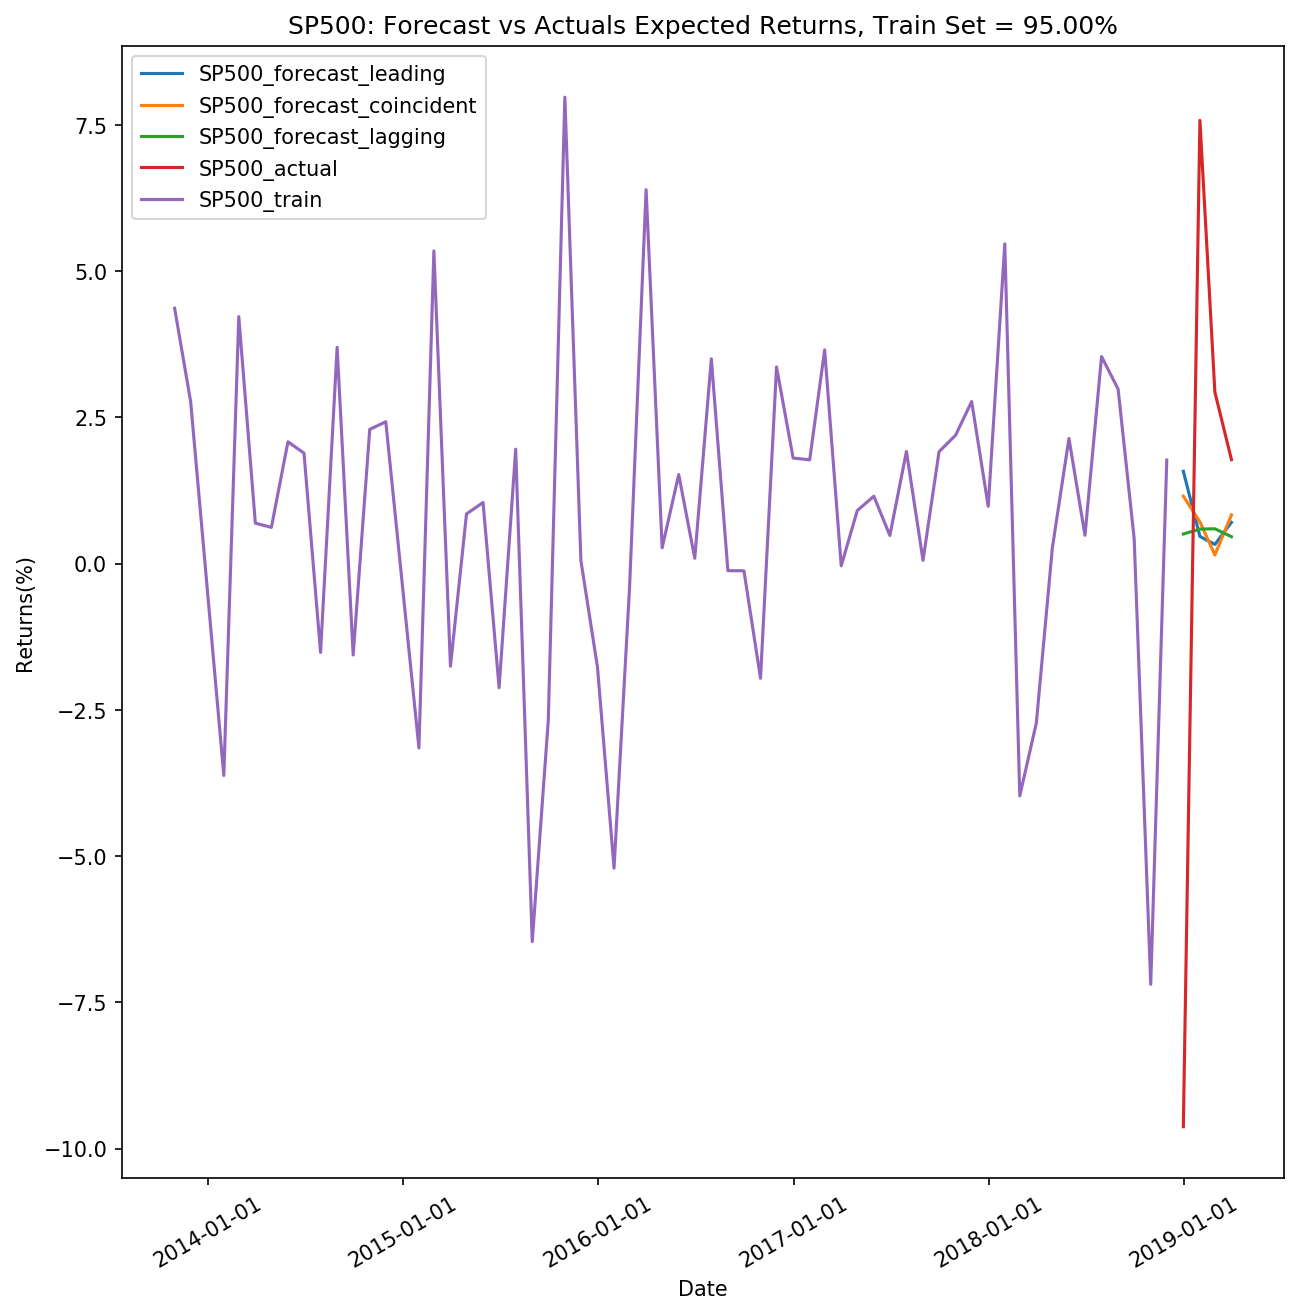

In [43]:
forecast_plot(df1_forecast_merge,df1_merge,3,95)

#### 2.1.2 Forecast the returns for R1000

In [33]:
[causation_matrix,index_remove,merge1_tested_R1000] = causation_test(merge1_differenced,0,4)
causation_matrix
index_remove
merge1_tested_R1000

# Train Set = 95%
[model1_fitted_R1000,df1_R1000,df1_train_R1000,df1_test_R1000,df1_forecast_R1000] = VAR_Model(merge1_tested_R1000,0,4,0.05)

                R1000  DGORDER  PERMIT     ICSA      AWHAEMAN  \
Date                                                            
2007-08-31   1.451094   -722.0     1.0  11300.0  1.000000e-01   
2007-09-30   4.013039 -33032.0     7.0  -8550.0  0.000000e+00   
2007-10-31   3.287222  21007.0    16.0  15550.0 -3.000000e-01   
2007-11-30  -3.887221  -5756.0    67.0  -3000.0  3.000000e-01   
2007-12-31  -0.469530   6528.0  -178.0  14450.0  0.000000e+00   
2008-01-31  -8.177504   5531.0   -43.0  -2700.0 -2.000000e-01   
2008-02-29  -2.147421  -7137.0   -52.0   2500.0  2.000000e-01   
2008-03-31  -0.723745  -9163.0   -45.0  30000.0  0.000000e+00   
2008-04-30   5.051552  -3303.0   167.0 -14750.0 -3.000000e-01   
2008-05-31   3.463409   3094.0   -36.0  23300.0  1.000000e-01   
2008-06-30  -7.581258  -2748.0   271.0   5500.0 -1.000000e-01   
2008-07-31  -1.983120 -13147.0  -213.0  16700.0 -1.000000e-01   
2008-08-31   0.919754  -4725.0   -23.0  28250.0  0.000000e+00   
2008-09-30 -12.663713   4

R1000_x  DGORDER_x  PERMIT_x  ICSA_x  AWHAEMAN_x  \
R1000_y             1.0000     0.0759    0.1270  0.0730      0.4217   
DGORDER_y           0.0016     1.0000    0.0895  0.0000      0.0000   
PERMIT_y            0.0036     0.0000    1.0000  0.0000      0.0017   
ICSA_y              0.0110     0.0535    0.0216  1.0000      0.1471   
AWHAEMAN_y          0.0001     0.0000    0.0001  0.0000      1.0000   
CSCICP03USM665S_y   0.1313     0.1197    0.0075  0.2277      0.0574   
T10Y3M_y            0.0029     0.0001    0.0000  0.1609      0.0978   

                   CSCICP03USM665S_x  T10Y3M_x  
R1000_y                       0.0073    0.1622  
DGORDER_y                     0.0037    0.5878  
PERMIT_y                      0.0049    0.0001  
ICSA_y                        0.0001    0.0050  
AWHAEMAN_y                    0.0100    0.0003  
CSCICP03USM665S_y             1.0000    0.0000  
T10Y3M_y                      0.0445    1.0000

[4, 5, 6, 7, 9]

R1000     R1000G     R1000V      SP500  CSCICP03USM665S
Date                                                                   
2007-08-31   1.451094   1.343026   0.824544   1.278156         0.089706
2007-09-30   4.013039   3.400576   3.169563   3.516828        -0.469253
2007-10-31   3.287222   1.625314  -0.139933   1.471356        -1.169357
2007-11-30  -3.887221  -4.575993  -5.321445  -4.504279        -1.675790
2007-12-31  -0.469530  -0.824280  -1.214891  -0.866593        -1.953669
2008-01-31  -8.177504  -6.302100  -4.271911  -6.311391        -2.143401
2008-02-29  -2.147421  -3.323734  -4.587407  -3.537971        -2.305934
2008-03-31  -0.723745  -0.843280  -0.972388  -0.597741        -2.499122
2008-04-30   5.051552   4.838550   4.606064   4.645094        -2.846579
2008-05-31   3.463409   1.607319  -0.449713   1.061759        -3.159378
2008-06-30  -7.581258  -8.848446 -10.320302  -8.988355        -3.236472
2008-07-31  -1.983120  -1.309697  -0.583980  -0.990830        -3.014665
2008-08-31   0.919754   1.160272   1.420719   1.211680        -2.537795
2008-09-30 -12.663713 -10.319972  -7.893354  -9.518079        -2.213249
2008-10-31 -19.213874 -19.240826 -19.266675 -18.563649        -2.270743
2008-11-30  -8.524662  -8.180672  -7.839137  -7.779835        -2.242307
2008-12-31   1.585869   1.308314   1.029820   0.779114        -2.084861
2009-01-31  -4.990750  -8.656976 -12.439555  -8.954989        -1.919417
2009-02-28  -8.058801 -11.278515 -14.847023 -11.645654        -1.563785
2009-03-31   8.352894   8.179480   7.983105   8.195274        -0.906266
2009-04-30   9.069183   9.489713   9.965882   8.977221         0.051088
2009-05-31   4.631017   5.131951   5.691168   5.172056         0.801047
2009-06-30   0.955655   0.063731  -0.947814   0.019582         1.074522
2009-07-31   6.778741   7.220907   7.681294   7.152198         0.831038
2009-08-31   1.842496   3.338834   4.851332   3.300932         0.621565
2009-09-30   4.036280   3.824114   3.613123   3.510010         0.721359
2009-10-31  -1.439247  -2.349930  -3.259107  -1.995987         1.096482
2009-11-30   5.747930   5.479906   5.206403   5.577902         1.361849
2009-12-31   2.910690   2.247248   1.571612   1.761455         1.539892
2010-01-31  -4.520717  -3.762659  -2.989845  -3.767514         1.691073
...               ...        ...        ...        ...              ...
2017-02-28   3.893583   3.570075   3.251692   3.652310         0.679215
2017-03-31   1.026074  -0.097658  -1.221718  -0.038931         0.688332
2017-04-30   2.181269   0.940558  -0.331047   0.905014         0.627653
2017-05-31   2.383220   1.033628  -0.384645   1.150972         0.437164
2017-06-30  -0.377620   0.547824   1.437704   0.480228         0.354733
2017-07-31   2.555833   1.847336   1.162697   1.916396         0.458731
2017-08-31   1.633451   0.075963  -1.459676   0.054634         0.657897
2017-09-30   1.201057   1.972947   2.740088   1.911896         0.795597
2017-10-31   3.733605   2.162013   0.580499   2.194560         0.867145
2017-11-30   2.799006   2.763013   2.727175   2.769552         0.523457
2017-12-31   0.693780   0.975856   1.263428   0.978360         0.110147
2018-01-31   6.785496   5.248504   3.659400   5.465742        -0.006872
2018-02-28  -2.815429  -3.946459  -5.149210  -3.972612         0.162074
2018-03-31  -2.890414  -2.451827  -1.980362  -2.725251         0.289593
2018-04-30   0.280503   0.232515   0.181893   0.271511         0.279573
2018-05-31   4.114378   2.291228   0.302141   2.137820         0.266922
2018-06-30   0.861540   0.507924   0.069077   0.483071         0.315223
2018-07-31   2.842282   3.283340   3.714599   3.538798         0.325261
2018-08-31   5.162683   3.175230   1.203347   2.981432         0.241242
2018-09-30   0.473600   0.238122  -0.000802   0.428511         0.202726
2018-10-31  -9.422744  -7.448538  -5.479570  -7.192935         0.038614
2018-11-30   0.863638   1.779685   2.665644   1.770178        -0.046454
2018-12-31  -9.086627  -9.719585 -10.337158  -9.626529  

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:24:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.323506
Nobs:                     130.000    HQIC:                 -0.663978
Log likelihood:          -284.618    FPE:                   0.408333
AIC:                    -0.897013    Det(Omega_mle):        0.337466
--------------------------------------------------------------------
Results for equation R1000
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.746340         0.388100            1.923           0.054
L1.R1000                   0.067839         0.088685            0.765           0.444
L1.CSCICP03USM665S         4.650893     

In [34]:
[causation_matrix,index_remove,merge2_tested_R1000] = causation_test(merge2_differenced,0,4)
causation_matrix
index_remove
merge2_tested_R1000

# Train Set = 95%
[model2_fitted_R1000,df2_R1000,df2_train_R1000,df2_test_R1000,df2_forecast_R1000] = VAR_Model(merge2_tested_R1000,0,4,0.05)


               R1000    PAYEMS   DSPIC96    INDPRO  CMRMTSPL       PCE  \
Date                                                                     
2002-10-31  8.710151  0.004206  0.147638  0.594417  0.110698 -0.125535   
2002-11-30  5.192548  0.055747  0.131342  0.721922  0.219846  0.017991   
2002-12-31 -7.291105  0.076576  0.139069  0.653793  0.187226  0.176248   
2003-01-31 -2.530097  0.099263 -0.139311  0.558220  0.185118  0.174294   
2003-02-28 -0.593941  0.111199 -0.159950  0.520974  0.068662  0.097911   
2003-03-31  1.749153  0.097305 -0.113320  0.346765  0.126198  0.113742   
2003-04-30  7.076132  0.088249 -0.151563  0.193963 -0.154515 -0.001987   
2003-05-31  4.777050  0.084787 -0.163442  0.074919 -0.044556  0.112097   
2003-06-30  1.251348  0.071424 -0.175391 -0.118949 -0.135476  0.102105   
2003-07-31  2.402049  0.075028  0.099308 -0.090106  0.005881  0.039042   
2003-08-31  2.361945  0.063512  0.305734 -0.114520 -0.088260  0.137660   
2003-09-30 -1.171651  0.064845  0.1370

R1000_x  PAYEMS_x  DSPIC96_x  INDPRO_x  CMRMTSPL_x   PCE_x  \
R1000_y            1.0000    0.0839     0.5037    0.0000      0.0002  0.1227   
PAYEMS_y           0.0002    1.0000     0.4328    0.0000      0.0000  0.0000   
DSPIC96_y          0.4263    0.0660     1.0000    0.1283      0.0030  0.0002   
INDPRO_y           0.0000    0.0000     0.6947    1.0000      0.0016  0.0183   
CMRMTSPL_y         0.0001    0.0018     0.0216    0.0012      1.0000  0.0106   
PCE_y              0.0000    0.1343     0.0008    0.0001      0.0000  1.0000   
RRSFS_y            0.0002    0.0737     0.0000    0.0000      0.0003  0.0749   
S423SMM144SCEN_y   0.0000    0.0233     0.5054    0.0000      0.0007  0.0002   
PPIACO_y           0.0135    0.2581     0.0292    0.0000      0.0000  0.0020   

                  RRSFS_x  S423SMM144SCEN_x  PPIACO_x  
R1000_y            0.0030            0.0842    0.2488  
PAYEMS_y           0.0000            0.0000    0.0000  
DSPIC96_y          0.0000            0.0400    0.0159  
INDPRO_y           0.0016            0.0002    0.0000  
CMRMTSPL_y         0.0018            0.0004    0.0000  
PCE_y              0.0011            0.0057    0.0000  
RRSFS_y            1.0000            0.0010    0.0000  
S423SMM144SCEN_y   0.0000            1.0000    0.0000  
PPIACO_y           0.0001            0.0563    1.0000

[4, 5, 8, 10, 11]

R1000    R1000G     R1000V     SP500    INDPRO  CMRMTSPL  \
Date                                                                      
2002-10-31  8.710151  7.831176   6.907849  8.291442  0.594417  0.110698   
2002-11-30  5.192548  5.500032   5.822577  5.550058  0.721922  0.219846   
2002-12-31 -7.291105 -5.998594  -4.650805 -6.222928  0.653793  0.187226   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749  0.558220  0.185118   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984  0.520974  0.068662   
2003-03-31  1.749153  0.887685  -0.025528  0.832287  0.346765  0.126198   
2003-04-30  7.076132  7.636873   8.234498  7.792735  0.193963 -0.154515   
2003-05-31  4.777050  5.372610   5.996177  4.964567  0.074919 -0.044556   
2003-06-30  1.251348  1.166838   1.079230  1.125863 -0.118949 -0.135476   
2003-07-31  2.402049  1.831130   1.248816  1.609351 -0.090106  0.005881   
2003-08-31  2.361945  1.850221   1.320796  1.771534 -0.114520 -0.088260   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623 -0.120675 -0.088042   
2003-10-31  5.379164  5.548351   5.724132  5.350427 -0.094843  0.252618   
2003-11-30  0.945482  1.027573   1.113868  0.710323 -0.158581  0.066553   
2003-12-31  3.282110  4.513700   5.770335  4.951890 -0.080597  0.189205   
2004-01-31  1.982772  1.775387   1.564719  1.712888 -0.133349  0.041753   
2004-02-29  0.508854  1.210404   1.914144  1.213510 -0.108901  0.321630   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422 -0.044146  0.322573   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339  0.147298  0.376909   
2004-05-31  1.738915  1.270972   0.795082  1.201102  0.243577  0.271814   
2004-06-30  1.137139  1.639801   2.147690  1.782919  0.225641  0.135875   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224  0.196384 -0.001307   
2004-08-31 -0.628061  0.319647   1.204977  0.228472  0.227405  0.157227   
2004-09-30  0.879950  1.109106   1.319269  0.932034  0.148172  0.051946   
2004-10-31  1.491633  1.474818   1.458525  1.391696  0.178421 -0.008277   
2004-11-30  3.255415  4.012631   4.706808  3.786878  0.111338  0.031434   
2004-12-31  3.764679  3.394976   3.057709  3.194249  0.143311  0.142599   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575  0.202333  0.304865   
2005-02-28  0.929152  2.020492   2.990637  1.872693  0.170623  0.086176   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275  0.221187 -0.282023   
...              ...       ...        ...       ...       ...       ...   
2017-01-31  3.246062  1.889957   0.577924  1.772630  0.248374  0.160040   
2017-02-28  3.893583  3.570075   3.251692  3.652310  0.293057 -0.005355   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931  0.457961  0.009181   
2017-04-30  2.181269  0.940558  -0.331047  0.905014  0.466704  0.079652   
2017-05-31  2.383220  1.033628  -0.384645  1.150972  0.456029  0.117568   
2017-06-30 -0.377620  0.547824   1.437704  0.480228  0.368182  0.072612   
2017-07-31  2.555833  1.847336   1.162697  1.916396  0.371316  0.124306   
2017-08-31  1.633451  0.075963  -1.459676  0.054634  0.333770  0.063195   
2017-09-30  1.201057  1.972947   2.740088  1.911896  0.301960  0.150417   
2017-10-31  3.733605  2.162013   0.580499  2.194560  0.364163  0.153829   
2017-11-30  2.799006  2.763013   2.727175  2.769552  0.383336  0.194379   
2017-12-31  0.693780  0.975856   1.263428  0.978360  0.219900  0.022229   
2018-01-31  6.785496  5.248504   3.659400  5.465742  0.250332 -0.010090   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612  0.283491  0.088773   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251  0.152493  0.110122   
2018-04-30  0.280503  0.232515   0.181893  0.271511  0.086693  0.123573   
2018-05-31  4.114378  2.291228   0.302141  2.137820 -0.009296  0.047684   
2018-06-30  0.861540  0.507924   0.069077  0.483071  0.062132  0.017298   
2018-07-31  2.842282  3.283340   3.714599  3.538798  0.126916 -0.040896   
2018-08-31  5.162683  3.175230   1.203347  2.981432  0.265216 -0.029015   
2018-09-30  0.473600  0.238122  -0.00080

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:24:19
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -8.02367
Nobs:                     170.000    HQIC:                  -8.94437
Log likelihood:          -67.1629    FPE:                6.99278e-05
AIC:                     -9.57312    Det(Omega_mle):     4.38846e-05
--------------------------------------------------------------------
Results for equation R1000
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               1.162798         0.316471            3.674           0.000
L1.R1000            0.001647         0.082138            0.020           0.984
L1.INDPRO           4.757926         2.419920            1.966      

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [35]:
[causation_matrix,index_remove,merge3_tested_R1000] = causation_test(merge3_differenced,0,4)
causation_matrix
index_remove
merge3_tested_R1000

# Train Size = 95%
[model3_fitted_R1000,df3_R1000,df3_train_R1000,df3_test_R1000,df3_forecast_R1000] = VAR_Model(merge3_tested_R1000,0,4,0.05)
 

               R1000  A191RP1Q027SBEA  CPALTT01USQ657N  MNFCTRIRSA  \
Date                                                                 
2003-01-31 -2.530097             -0.8         0.654682       -0.05   
2003-02-28 -0.593941             -0.8         0.654682       -0.04   
2003-03-31  1.749153             -0.8         0.654682       -0.04   
2003-04-30  7.076132              0.8        -0.722454        0.02   
2003-05-31  4.777050              0.8        -0.722454        0.01   
2003-06-30  1.251348              0.8        -0.722454       -0.01   
2003-07-31  2.402049              5.6         0.063697       -0.05   
2003-08-31  2.361945              5.6         0.063697       -0.03   
2003-09-30 -1.171651              5.6         0.063697       -0.06   
2003-10-31  5.379164              4.3        -0.295709       -0.07   
2003-11-30  0.945482              4.3        -0.295709       -0.07   
2003-12-31  3.282110              4.3        -0.295709       -0.10   
2004-01-31  1.982772

R1000_x  A191RP1Q027SBEA_x  CPALTT01USQ657N_x  \
R1000_y             1.0000             0.1558             0.0108   
A191RP1Q027SBEA_y   0.0002             1.0000             0.0984   
CPALTT01USQ657N_y   0.0001             0.1561             1.0000   
MNFCTRIRSA_y        0.0000             0.0000             0.0000   
UNRATE_y            0.0005             0.0000             0.0000   
FEDFUNDS_y          0.0003             0.0009             0.0000   
ULCNFB_y            0.0056             0.0002             0.0135   

                   MNFCTRIRSA_x  UNRATE_x  FEDFUNDS_x  ULCNFB_x  
R1000_y                  0.2197    0.0876      0.0012    0.0418  
A191RP1Q027SBEA_y        0.0000    0.0001      0.0000    0.0000  
CPALTT01USQ657N_y        0.0000    0.0001      0.0000    0.7020  
MNFCTRIRSA_y             1.0000    0.0005      0.0000    0.1095  
UNRATE_y                 0.0000    1.0000      0.0000    0.0000  
FEDFUNDS_y               0.0032    0.0223      1.0000    0.0091  
ULCNFB_y                 0.0009    0.0000      0.0015    1.0000

[4, 6, 7]

R1000    R1000G     R1000V     SP500  CPALTT01USQ657N  \
Date                                                                   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749         0.654682   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984         0.654682   
2003-03-31  1.749153  0.887685  -0.025528  0.832287         0.654682   
2003-04-30  7.076132  7.636873   8.234498  7.792735        -0.722454   
2003-05-31  4.777050  5.372610   5.996177  4.964567        -0.722454   
2003-06-30  1.251348  1.166838   1.079230  1.125863        -0.722454   
2003-07-31  2.402049  1.831130   1.248816  1.609351         0.063697   
2003-08-31  2.361945  1.850221   1.320796  1.771534         0.063697   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623         0.063697   
2003-10-31  5.379164  5.548351   5.724132  5.350427        -0.295709   
2003-11-30  0.945482  1.027573   1.113868  0.710323        -0.295709   
2003-12-31  3.282110  4.513700   5.770335  4.951890        -0.295709   
2004-01-31  1.982772  1.775387   1.564719  1.712888        -0.109107   
2004-02-29  0.508854  1.210404   1.914144  1.213510        -0.109107   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422        -0.109107   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339         1.067341   
2004-05-31  1.738915  1.270972   0.795082  1.201102         1.067341   
2004-06-30  1.137139  1.639801   2.147690  1.782919         1.067341   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224        -0.137160   
2004-08-31 -0.628061  0.319647   1.204977  0.228472        -0.137160   
2004-09-30  0.879950  1.109106   1.319269  0.932034        -0.137160   
2004-10-31  1.491633  1.474818   1.458525  1.391696         0.579689   
2004-11-30  3.255415  4.012631   4.706808  3.786878         0.579689   
2004-12-31  3.764679  3.394976   3.057709  3.194249         0.579689   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575        -0.273702   
2005-02-28  0.929152  2.020492   2.990637  1.872693        -0.273702   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275        -0.273702   
2005-04-30 -1.970686 -1.979256  -1.985863 -2.031352        -0.094369   
2005-05-31  4.584695  3.307338   2.170843  2.951222        -0.094369   
2005-06-30 -0.450992  0.254224   0.871363 -0.014269        -0.094369   
...              ...       ...        ...       ...              ...   
2016-10-31 -2.462936 -2.083523  -1.711283 -1.961678         0.672418   
2016-11-30  1.934488  3.604850   5.257402  3.360347         0.672418   
2016-12-31  1.120583  1.704111   2.265861  1.803710         0.672418   
2017-01-31  3.246062  1.889957   0.577924  1.772630         0.726103   
2017-02-28  3.893583  3.570075   3.251692  3.652310         0.726103   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931         0.726103   
2017-04-30  2.181269  0.940558  -0.331047  0.905014        -0.628833   
2017-05-31  2.383220  1.033628  -0.384645  1.150972        -0.628833   
2017-06-30 -0.377620  0.547824   1.437704  0.480228        -0.628833   
2017-07-31  2.555833  1.847336   1.162697  1.916396         0.063934   
2017-08-31  1.633451  0.075963  -1.459676  0.054634         0.063934   
2017-09-30  1.201057  1.972947   2.740088  1.911896         0.063934   
2017-10-31  3.733605  2.162013   0.580499  2.194560         0.148055   
2017-11-30  2.799006  2.763013   2.727175  2.769552         0.148055   
2017-12-31  0.693780  0.975856   1.263428  0.978360         0.148055   
2018-01-31  6.785496  5.248504   3.659400  5.465742         0.095381   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612         0.095381   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251         0.095381   
2018-04-30  0.280503  0.232515   0.181893  0.271511         0.489558   
2018-05-31  4.114378  2.291228   0.302141  2.137820         0.489558   
2018-06-30  0.861540  0.507924   0.069077  0.483071         0.489558   
2018-07-31  2.842282  3.283340   3.714599  3.538798        -0.069348   
2018-08-31  5.162683  3.175230   1.203347  2.981432    

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:24:21
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -1.12971
Nobs:                     180.000    HQIC:                  -2.01561
Log likelihood:          -701.857    FPE:                  0.0731320
AIC:                     -2.61976    Det(Omega_mle):       0.0470342
--------------------------------------------------------------------
Results for equation R1000
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.519535         0.307466            1.690           0.091
L1.R1000                   0.118975         0.079866            1.490           0.136
L1.CPALTT01USQ657N         0.329082     

* Forecast VS. Actual Plot

In [36]:
# Merge the three forecasts as the index "date"
df1_forecast_merge_R1000 = pd.concat([df1_forecast_R1000,df2_forecast_R1000,df3_forecast_R1000],join='inner',axis=1)['R1000_forecast']
df1_forecast_merge_R1000


R1000_forecast  R1000_forecast  R1000_forecast
Date                                                      
2018-12-31        1.745533        1.775612        0.639828
2019-01-31       -0.701024        1.467896        0.514542
2019-02-28       -1.257454        1.224970        0.723797
2019-03-31        1.464578        1.257194        0.496892

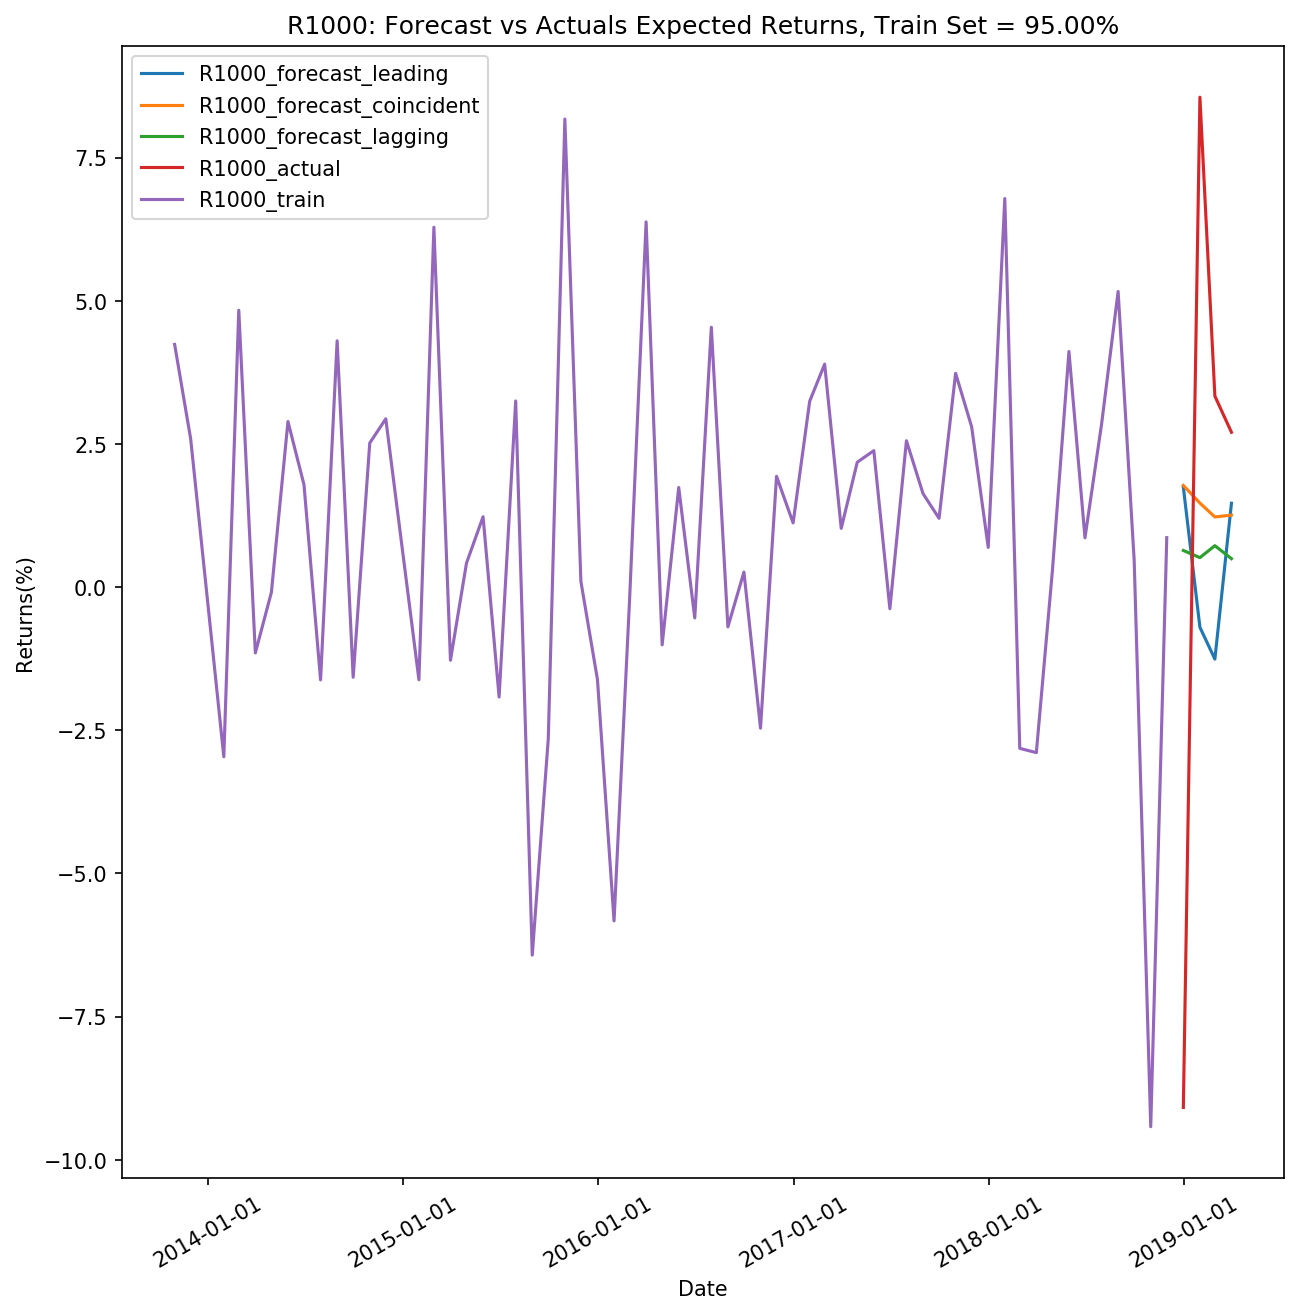

In [44]:
forecast_plot(df1_forecast_merge_R1000,df1_merge,0,95)

#### 2.1.3 Forecast the returns for R1000G

In [38]:
[causation_matrix,index_remove,merge1_tested_R1000G] = causation_test(merge1_differenced,1,4)
causation_matrix
index_remove
merge1_tested_R1000G

# Train Set = 95%
[model1_fitted_R1000G,df1_R1000G,df1_train_R1000G,df1_test_R1000G,df1_forecast_R1000G] = VAR_Model(merge1_tested_R1000G,1,4,0.05)


               R1000G  DGORDER  PERMIT     ICSA      AWHAEMAN  \
Date                                                            
2007-08-31   1.343026   -722.0     1.0  11300.0  1.000000e-01   
2007-09-30   3.400576 -33032.0     7.0  -8550.0  0.000000e+00   
2007-10-31   1.625314  21007.0    16.0  15550.0 -3.000000e-01   
2007-11-30  -4.575993  -5756.0    67.0  -3000.0  3.000000e-01   
2007-12-31  -0.824280   6528.0  -178.0  14450.0  0.000000e+00   
2008-01-31  -6.302100   5531.0   -43.0  -2700.0 -2.000000e-01   
2008-02-29  -3.323734  -7137.0   -52.0   2500.0  2.000000e-01   
2008-03-31  -0.843280  -9163.0   -45.0  30000.0  0.000000e+00   
2008-04-30   4.838550  -3303.0   167.0 -14750.0 -3.000000e-01   
2008-05-31   1.607319   3094.0   -36.0  23300.0  1.000000e-01   
2008-06-30  -8.848446  -2748.0   271.0   5500.0 -1.000000e-01   
2008-07-31  -1.309697 -13147.0  -213.0  16700.0 -1.000000e-01   
2008-08-31   1.160272  -4725.0   -23.0  28250.0  0.000000e+00   
2008-09-30 -10.319972   4

R1000G_x  DGORDER_x  PERMIT_x  ICSA_x  AWHAEMAN_x  \
R1000G_y             1.0000     0.0565    0.2245  0.0474      0.4091   
DGORDER_y            0.0032     1.0000    0.0895  0.0000      0.0000   
PERMIT_y             0.0064     0.0000    1.0000  0.0000      0.0017   
ICSA_y               0.0081     0.0535    0.0216  1.0000      0.1471   
AWHAEMAN_y           0.0000     0.0000    0.0001  0.0000      1.0000   
CSCICP03USM665S_y    0.0984     0.1197    0.0075  0.2277      0.0574   
T10Y3M_y             0.0055     0.0001    0.0000  0.1609      0.0978   

                   CSCICP03USM665S_x  T10Y3M_x  
R1000G_y                      0.0031    0.1964  
DGORDER_y                     0.0037    0.5878  
PERMIT_y                      0.0049    0.0001  
ICSA_y                        0.0001    0.0050  
AWHAEMAN_y                    0.0100    0.0003  
CSCICP03USM665S_y             1.0000    0.0000  
T10Y3M_y                      0.0445    1.0000

[4, 5, 7, 9]

R1000     R1000G     R1000V      SP500     ICSA  \
Date                                                              
2007-08-31   1.451094   1.343026   0.824544   1.278156  11300.0   
2007-09-30   4.013039   3.400576   3.169563   3.516828  -8550.0   
2007-10-31   3.287222   1.625314  -0.139933   1.471356  15550.0   
2007-11-30  -3.887221  -4.575993  -5.321445  -4.504279  -3000.0   
2007-12-31  -0.469530  -0.824280  -1.214891  -0.866593  14450.0   
2008-01-31  -8.177504  -6.302100  -4.271911  -6.311391  -2700.0   
2008-02-29  -2.147421  -3.323734  -4.587407  -3.537971   2500.0   
2008-03-31  -0.723745  -0.843280  -0.972388  -0.597741  30000.0   
2008-04-30   5.051552   4.838550   4.606064   4.645094 -14750.0   
2008-05-31   3.463409   1.607319  -0.449713   1.061759  23300.0   
2008-06-30  -7.581258  -8.848446 -10.320302  -8.988355   5500.0   
2008-07-31  -1.983120  -1.309697  -0.583980  -0.990830  16700.0   
2008-08-31   0.919754   1.160272   1.420719   1.211680  28250.0   
2008-09-30 -12.663713 -10.319972  -7.893354  -9.518079  37600.0   
2008-10-31 -19.213874 -19.240826 -19.266675 -18.563649  -3600.0   
2008-11-30  -8.524662  -8.180672  -7.839137  -7.779835  36800.0   
2008-12-31   1.585869   1.308314   1.029820   0.779114  32000.0   
2009-01-31  -4.990750  -8.656976 -12.439555  -8.954989  17450.0   
2009-02-28  -8.058801 -11.278515 -14.847023 -11.645654  64000.0   
2009-03-31   8.352894   8.179480   7.983105   8.195274  -1400.0   
2009-04-30   9.069183   9.489713   9.965882   8.977221 -27600.0   
2009-05-31   4.631017   5.131951   5.691168   5.172056 -23050.0   
2009-06-30   0.955655   0.063731  -0.947814   0.019582 -30200.0   
2009-07-31   6.778741   7.220907   7.681294   7.152198 -46500.0   
2009-08-31   1.842496   3.338834   4.851332   3.300932 -42300.0   
2009-09-30   4.036280   3.824114   3.613123   3.510010 -42700.0   
2009-10-31  -1.439247  -2.349930  -3.259107  -1.995987 -33350.0   
2009-11-30   5.747930   5.479906   5.206403   5.577902 -75950.0   
2009-12-31   2.910690   2.247248   1.571612   1.761455 -52700.0   
2010-01-31  -4.520717  -3.762659  -2.989845  -3.767514 -13700.0   
...               ...        ...        ...        ...      ...   
2017-02-28   3.893583   3.570075   3.251692   3.652310   4650.0   
2017-03-31   1.026074  -0.097658  -1.221718  -0.038931  13250.0   
2017-04-30   2.181269   0.940558  -0.331047   0.905014  -9250.0   
2017-05-31   2.383220   1.033628  -0.384645   1.150972 -11250.0   
2017-06-30  -0.377620   0.547824   1.437704   0.480228  10500.0   
2017-07-31   2.555833   1.847336   1.162697   1.916396   8750.0   
2017-08-31   1.633451   0.075963  -1.459676   0.054634  -8500.0   
2017-09-30   1.201057   1.972947   2.740088   1.911896  42950.0   
2017-10-31   3.733605   2.162013   0.580499   2.194560 -37700.0   
2017-11-30   2.799006   2.763013   2.727175   2.769552  12250.0   
2017-12-31   0.693780   0.975856   1.263428   0.978360  -5600.0   
2018-01-31   6.785496   5.248504   3.659400   5.465742    600.0   
2018-02-28  -2.815429  -3.946459  -5.149210  -3.972612  -7250.0   
2018-03-31  -2.890414  -2.451827  -1.980362  -2.725251  -6200.0   
2018-04-30   0.280503   0.232515   0.181893   0.271511   4700.0   
2018-05-31   4.114378   2.291228   0.302141   2.137820   2000.0   
2018-06-30   0.861540   0.507924   0.069077   0.483071   -250.0   
2018-07-31   2.842282   3.283340   3.714599   3.538798  -9950.0   
2018-08-31   5.162683   3.175230   1.203347   2.981432   3950.0   
2018-09-30   0.473600   0.238122  -0.000802   0.428511 -33200.0   
2018-10-31  -9.422744  -7.448538  -5.479570  -7.192935  36450.0   
2018-11-30   0.863638   1.779685   2.665644   1.770178   4750.0   
2018-12-31  -9.086627  -9.719585 -10.337158  -9.626529   -600.0   
2019-01-31   8.555235   7.920548   7.293949   7.574215   5100.0   
2019-02-28   3.335416   3.112511   2.890544   2.929559  17750.0   
2019-03-31   2.703876   1.572581   0.430165   1.776554 -13250.0   
2019-04-30   4.367489   3.850449   3.317437   3.856034   1250.0

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:36:12
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    19.8355
Nobs:                     132.000    HQIC:                   19.3299
Log likelihood:          -1775.83    FPE:                1.75944e+08
AIC:                      18.9838    Det(Omega_mle):     1.32737e+08
--------------------------------------------------------------------
Results for equation R1000G
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.278145         0.373616            0.744           0.457
L1.R1000G                  0.051289         0.094060            0.545           0.586
L1.ICSA                   -0.000030    

In [39]:
[causation_matrix,index_remove,merge2_tested_R1000G] = causation_test(merge2_differenced,1,4)
causation_matrix
index_remove
merge2_tested_R1000G

# Train Set = 95%
[model2_fitted_R1000G,df2_R1000G,df2_train_R1000G,df2_test_R1000G,df2_forecast_R1000G] = VAR_Model(merge2_tested_R1000G,1,4,0.05)


              R1000G    PAYEMS   DSPIC96    INDPRO  CMRMTSPL       PCE  \
Date                                                                     
2002-10-31  7.831176  0.004206  0.147638  0.594417  0.110698 -0.125535   
2002-11-30  5.500032  0.055747  0.131342  0.721922  0.219846  0.017991   
2002-12-31 -5.998594  0.076576  0.139069  0.653793  0.187226  0.176248   
2003-01-31 -2.581405  0.099263 -0.139311  0.558220  0.185118  0.174294   
2003-02-28 -1.760957  0.111199 -0.159950  0.520974  0.068662  0.097911   
2003-03-31  0.887685  0.097305 -0.113320  0.346765  0.126198  0.113742   
2003-04-30  7.636873  0.088249 -0.151563  0.193963 -0.154515 -0.001987   
2003-05-31  5.372610  0.084787 -0.163442  0.074919 -0.044556  0.112097   
2003-06-30  1.166838  0.071424 -0.175391 -0.118949 -0.135476  0.102105   
2003-07-31  1.831130  0.075028  0.099308 -0.090106  0.005881  0.039042   
2003-08-31  1.850221  0.063512  0.305734 -0.114520 -0.088260  0.137660   
2003-09-30 -1.167637  0.064845  0.1370

R1000G_x  PAYEMS_x  DSPIC96_x  INDPRO_x  CMRMTSPL_x   PCE_x  \
R1000G_y            1.0000    0.0124     0.4863    0.0001      0.0001  0.0757   
PAYEMS_y            0.0000    1.0000     0.4328    0.0000      0.0000  0.0000   
DSPIC96_y           0.3915    0.0660     1.0000    0.1283      0.0030  0.0002   
INDPRO_y            0.0000    0.0000     0.6947    1.0000      0.0016  0.0183   
CMRMTSPL_y          0.0000    0.0018     0.0216    0.0012      1.0000  0.0106   
PCE_y               0.0000    0.1343     0.0008    0.0001      0.0000  1.0000   
RRSFS_y             0.0003    0.0737     0.0000    0.0000      0.0003  0.0749   
S423SMM144SCEN_y    0.0000    0.0233     0.5054    0.0000      0.0007  0.0002   
PPIACO_y            0.0082    0.2581     0.0292    0.0000      0.0000  0.0020   

                  RRSFS_x  S423SMM144SCEN_x  PPIACO_x  
R1000G_y           0.0045            0.0407    0.1328  
PAYEMS_y           0.0000            0.0000    0.0000  
DSPIC96_y          0.0000            0.0400    0.0159  
INDPRO_y           0.0016            0.0002    0.0000  
CMRMTSPL_y         0.0018            0.0004    0.0000  
PCE_y              0.0011            0.0057    0.0000  
RRSFS_y            1.0000            0.0010    0.0000  
S423SMM144SCEN_y   0.0000            1.0000    0.0000  
PPIACO_y           0.0001            0.0563    1.0000

[5, 8, 11]

R1000    R1000G     R1000V     SP500    PAYEMS    INDPRO  \
Date                                                                      
2002-10-31  8.710151  7.831176   6.907849  8.291442  0.004206  0.594417   
2002-11-30  5.192548  5.500032   5.822577  5.550058  0.055747  0.721922   
2002-12-31 -7.291105 -5.998594  -4.650805 -6.222928  0.076576  0.653793   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749  0.099263  0.558220   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984  0.111199  0.520974   
2003-03-31  1.749153  0.887685  -0.025528  0.832287  0.097305  0.346765   
2003-04-30  7.076132  7.636873   8.234498  7.792735  0.088249  0.193963   
2003-05-31  4.777050  5.372610   5.996177  4.964567  0.084787  0.074919   
2003-06-30  1.251348  1.166838   1.079230  1.125863  0.071424 -0.118949   
2003-07-31  2.402049  1.831130   1.248816  1.609351  0.075028 -0.090106   
2003-08-31  2.361945  1.850221   1.320796  1.771534  0.063512 -0.114520   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623  0.064845 -0.120675   
2003-10-31  5.379164  5.548351   5.724132  5.350427  0.041608 -0.094843   
2003-11-30  0.945482  1.027573   1.113868  0.710323  0.024424 -0.158581   
2003-12-31  3.282110  4.513700   5.770335  4.951890  0.039912 -0.080597   
2004-01-31  1.982772  1.775387   1.564719  1.712888  0.029517 -0.133349   
2004-02-29  0.508854  1.210404   1.914144  1.213510  0.042996 -0.108901   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422  0.089058 -0.044146   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339  0.106729  0.147298   
2004-05-31  1.738915  1.270972   0.795082  1.201102  0.123371  0.243577   
2004-06-30  1.137139  1.639801   2.147690  1.782919  0.132695  0.225641   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224  0.130750  0.196384   
2004-08-31 -0.628061  0.319647   1.204977  0.228472  0.141555  0.227405   
2004-09-30  0.879950  1.109106   1.319269  0.932034  0.132088  0.148172   
2004-10-31  1.491633  1.474818   1.458525  1.391696  0.137182  0.178421   
2004-11-30  3.255415  4.012631   4.706808  3.786878  0.137768  0.111338   
2004-12-31  3.764679  3.394976   3.057709  3.194249  0.121626  0.143311   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575  0.114541  0.202333   
2005-02-28  0.929152  2.020492   2.990637  1.872693  0.114898  0.170623   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275  0.069097  0.221187   
...              ...       ...        ...       ...       ...       ...   
2017-01-31  3.246062  1.889957   0.577924  1.772630 -0.009963  0.248374   
2017-02-28  3.893583  3.570075   3.251692  3.652310 -0.014195  0.293057   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931 -0.029552  0.457961   
2017-04-30  2.181269  0.940558  -0.331047  0.905014 -0.024138  0.466704   
2017-05-31  2.383220  1.033628  -0.384645  1.150972  0.000219  0.456029   
2017-06-30 -0.377620  0.547824   1.437704  0.480228 -0.009373  0.368182   
2017-07-31  2.555833  1.847336   1.162697  1.916396 -0.019362  0.371316   
2017-08-31  1.633451  0.075963  -1.459676  0.054634 -0.017154  0.333770   
2017-09-30  1.201057  1.972947   2.740088  1.911896 -0.039417  0.301960   
2017-10-31  3.733605  2.162013   0.580499  2.194560 -0.019566  0.364163   
2017-11-30  2.799006  2.763013   2.727175  2.769552 -0.012921  0.383336   
2017-12-31  0.693780  0.975856   1.263428  0.978360 -0.011428  0.219900   
2018-01-31  6.785496  5.248504   3.659400  5.465742 -0.025392  0.250332   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612 -0.009436  0.283491   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251 -0.000126  0.152493   
2018-04-30  0.280503  0.232515   0.181893  0.271511 -0.001193  0.086693   
2018-05-31  4.114378  2.291228   0.302141  2.137820  0.000228 -0.009296   
2018-06-30  0.861540  0.507924   0.069077  0.483071  0.005141  0.062132   
2018-07-31  2.842282  3.283340   3.714599  3.538798  0.011299  0.126916   
2018-08-31  5.162683  3.175230   1.203347  2.981432  0.013591  0.265216   
2018-09-30  0.473600  0.238122  -0.00080

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:36:16
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -17.0192
Nobs:                     170.000    HQIC:                  -19.0579
Log likelihood:           476.942    FPE:                1.34704e-09
AIC:                     -20.4501    Det(Omega_mle):     4.93057e-10
--------------------------------------------------------------------
Results for equation R1000G
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.830719         0.342441            2.426           0.015
L1.R1000G                -0.009910         0.086351           -0.115           0.909
L1.PAYEMS                -7.470498        1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
[causation_matrix,index_remove,merge3_tested_R1000G] = causation_test(merge3_differenced,1,4)
causation_matrix
index_remove
merge3_tested_R1000G

# Train Set = 95%
[model3_fitted_R1000G,df3_R1000G,df3_train_R1000G,df3_test_R1000G,df3_forecast_R1000G] = VAR_Model(merge3_tested_R1000G,1,4,0.05)


              R1000G  A191RP1Q027SBEA  CPALTT01USQ657N  MNFCTRIRSA  \
Date                                                                 
2003-01-31 -2.581405             -0.8         0.654682       -0.05   
2003-02-28 -1.760957             -0.8         0.654682       -0.04   
2003-03-31  0.887685             -0.8         0.654682       -0.04   
2003-04-30  7.636873              0.8        -0.722454        0.02   
2003-05-31  5.372610              0.8        -0.722454        0.01   
2003-06-30  1.166838              0.8        -0.722454       -0.01   
2003-07-31  1.831130              5.6         0.063697       -0.05   
2003-08-31  1.850221              5.6         0.063697       -0.03   
2003-09-30 -1.167637              5.6         0.063697       -0.06   
2003-10-31  5.548351              4.3        -0.295709       -0.07   
2003-11-30  1.027573              4.3        -0.295709       -0.07   
2003-12-31  4.513700              4.3        -0.295709       -0.10   
2004-01-31  1.775387

R1000G_x  A191RP1Q027SBEA_x  CPALTT01USQ657N_x  \
R1000G_y             1.0000             0.1278             0.0093   
A191RP1Q027SBEA_y    0.0001             1.0000             0.0984   
CPALTT01USQ657N_y    0.0002             0.1561             1.0000   
MNFCTRIRSA_y         0.0000             0.0000             0.0000   
UNRATE_y             0.0006             0.0000             0.0000   
FEDFUNDS_y           0.0003             0.0009             0.0000   
ULCNFB_y             0.0055             0.0002             0.0135   

                   MNFCTRIRSA_x  UNRATE_x  FEDFUNDS_x  ULCNFB_x  
R1000G_y                 0.1737    0.1468      0.0003    0.0377  
A191RP1Q027SBEA_y        0.0000    0.0001      0.0000    0.0000  
CPALTT01USQ657N_y        0.0000    0.0001      0.0000    0.7020  
MNFCTRIRSA_y             1.0000    0.0005      0.0000    0.1095  
UNRATE_y                 0.0000    1.0000      0.0000    0.0000  
FEDFUNDS_y               0.0032    0.0223      1.0000    0.0091  
ULCNFB_y                 0.0009    0.0000      0.0015    1.0000

[4, 6, 7]

R1000    R1000G     R1000V     SP500  CPALTT01USQ657N  \
Date                                                                   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749         0.654682   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984         0.654682   
2003-03-31  1.749153  0.887685  -0.025528  0.832287         0.654682   
2003-04-30  7.076132  7.636873   8.234498  7.792735        -0.722454   
2003-05-31  4.777050  5.372610   5.996177  4.964567        -0.722454   
2003-06-30  1.251348  1.166838   1.079230  1.125863        -0.722454   
2003-07-31  2.402049  1.831130   1.248816  1.609351         0.063697   
2003-08-31  2.361945  1.850221   1.320796  1.771534         0.063697   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623         0.063697   
2003-10-31  5.379164  5.548351   5.724132  5.350427        -0.295709   
2003-11-30  0.945482  1.027573   1.113868  0.710323        -0.295709   
2003-12-31  3.282110  4.513700   5.770335  4.951890        -0.295709   
2004-01-31  1.982772  1.775387   1.564719  1.712888        -0.109107   
2004-02-29  0.508854  1.210404   1.914144  1.213510        -0.109107   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422        -0.109107   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339         1.067341   
2004-05-31  1.738915  1.270972   0.795082  1.201102         1.067341   
2004-06-30  1.137139  1.639801   2.147690  1.782919         1.067341   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224        -0.137160   
2004-08-31 -0.628061  0.319647   1.204977  0.228472        -0.137160   
2004-09-30  0.879950  1.109106   1.319269  0.932034        -0.137160   
2004-10-31  1.491633  1.474818   1.458525  1.391696         0.579689   
2004-11-30  3.255415  4.012631   4.706808  3.786878         0.579689   
2004-12-31  3.764679  3.394976   3.057709  3.194249         0.579689   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575        -0.273702   
2005-02-28  0.929152  2.020492   2.990637  1.872693        -0.273702   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275        -0.273702   
2005-04-30 -1.970686 -1.979256  -1.985863 -2.031352        -0.094369   
2005-05-31  4.584695  3.307338   2.170843  2.951222        -0.094369   
2005-06-30 -0.450992  0.254224   0.871363 -0.014269        -0.094369   
...              ...       ...        ...       ...              ...   
2016-10-31 -2.462936 -2.083523  -1.711283 -1.961678         0.672418   
2016-11-30  1.934488  3.604850   5.257402  3.360347         0.672418   
2016-12-31  1.120583  1.704111   2.265861  1.803710         0.672418   
2017-01-31  3.246062  1.889957   0.577924  1.772630         0.726103   
2017-02-28  3.893583  3.570075   3.251692  3.652310         0.726103   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931         0.726103   
2017-04-30  2.181269  0.940558  -0.331047  0.905014        -0.628833   
2017-05-31  2.383220  1.033628  -0.384645  1.150972        -0.628833   
2017-06-30 -0.377620  0.547824   1.437704  0.480228        -0.628833   
2017-07-31  2.555833  1.847336   1.162697  1.916396         0.063934   
2017-08-31  1.633451  0.075963  -1.459676  0.054634         0.063934   
2017-09-30  1.201057  1.972947   2.740088  1.911896         0.063934   
2017-10-31  3.733605  2.162013   0.580499  2.194560         0.148055   
2017-11-30  2.799006  2.763013   2.727175  2.769552         0.148055   
2017-12-31  0.693780  0.975856   1.263428  0.978360         0.148055   
2018-01-31  6.785496  5.248504   3.659400  5.465742         0.095381   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612         0.095381   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251         0.095381   
2018-04-30  0.280503  0.232515   0.181893  0.271511         0.489558   
2018-05-31  4.114378  2.291228   0.302141  2.137820         0.489558   
2018-06-30  0.861540  0.507924   0.069077  0.483071         0.489558   
2018-07-31  2.842282  3.283340   3.714599  3.538798        -0.069348   
2018-08-31  5.162683  3.175230   1.203347  2.981432    

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:36:18
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -1.16527
Nobs:                     180.000    HQIC:                  -2.05117
Log likelihood:          -698.657    FPE:                  0.0705772
AIC:                     -2.65532    Det(Omega_mle):       0.0453911
--------------------------------------------------------------------
Results for equation R1000G
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.403240         0.293548            1.374           0.170
L1.R1000G                  0.130981         0.078834            1.661           0.097
L1.CPALTT01USQ657N         0.371206    

* Forecast VS. Actual Plot

In [41]:
# Merge the three forecasts as the index "date"
df1_forecast_merge_R1000G = pd.concat([df1_forecast_R1000G,df2_forecast_R1000G,
                                       df3_forecast_R1000G],join='inner',axis=1)['R1000G_forecast']
df1_forecast_merge_R1000G

R1000G_forecast  R1000G_forecast  R1000G_forecast
Date                                                         
2018-12-31         1.997897         1.200402         0.557306
2019-01-31        -0.551212         0.691943         0.563329
2019-02-28        -0.025468         0.146273         0.598779
2019-03-31         0.727915         0.886143         0.461697

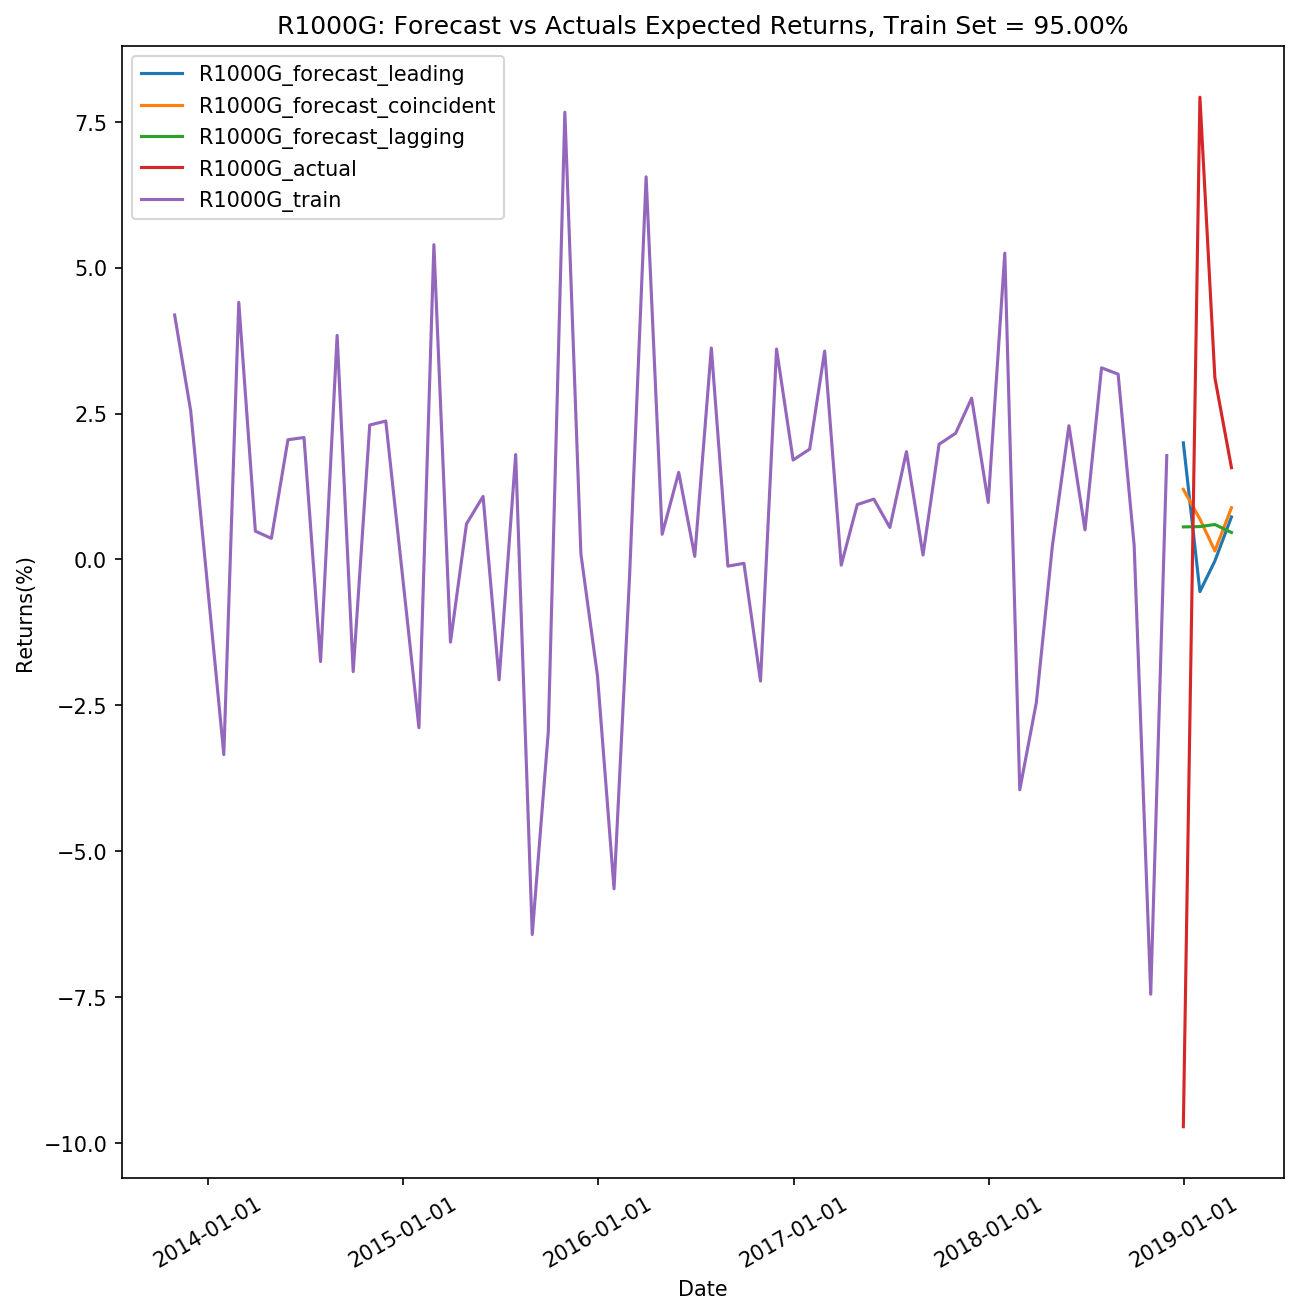

In [46]:
forecast_plot(df1_forecast_merge_R1000G,df1_merge,1,95)

#### 2.1.4 Forecast the returns for R1000V

In [47]:
[causation_matrix,index_remove,merge1_tested_R1000V] = causation_test(merge1_differenced,2,4)
causation_matrix
index_remove
merge1_tested_R1000V

# Train Size = 95%
[model1_fitted_R1000V,df1_R1000V,df1_train_R1000V,df1_test_R1000V,df1_forecast_R1000V] = VAR_Model(merge1_tested_R1000V,2,4,0.05)


               R1000V  DGORDER  PERMIT     ICSA      AWHAEMAN  \
Date                                                            
2007-08-31   0.824544   -722.0     1.0  11300.0  1.000000e-01   
2007-09-30   3.169563 -33032.0     7.0  -8550.0  0.000000e+00   
2007-10-31  -0.139933  21007.0    16.0  15550.0 -3.000000e-01   
2007-11-30  -5.321445  -5756.0    67.0  -3000.0  3.000000e-01   
2007-12-31  -1.214891   6528.0  -178.0  14450.0  0.000000e+00   
2008-01-31  -4.271911   5531.0   -43.0  -2700.0 -2.000000e-01   
2008-02-29  -4.587407  -7137.0   -52.0   2500.0  2.000000e-01   
2008-03-31  -0.972388  -9163.0   -45.0  30000.0  0.000000e+00   
2008-04-30   4.606064  -3303.0   167.0 -14750.0 -3.000000e-01   
2008-05-31  -0.449713   3094.0   -36.0  23300.0  1.000000e-01   
2008-06-30 -10.320302  -2748.0   271.0   5500.0 -1.000000e-01   
2008-07-31  -0.583980 -13147.0  -213.0  16700.0 -1.000000e-01   
2008-08-31   1.420719  -4725.0   -23.0  28250.0  0.000000e+00   
2008-09-30  -7.893354   4

R1000V_x  DGORDER_x  PERMIT_x  ICSA_x  AWHAEMAN_x  \
R1000V_y             1.0000     0.0479    0.2482  0.0377      0.2904   
DGORDER_y            0.0097     1.0000    0.0895  0.0000      0.0000   
PERMIT_y             0.0092     0.0000    1.0000  0.0000      0.0017   
ICSA_y               0.0094     0.0535    0.0216  1.0000      0.1471   
AWHAEMAN_y           0.0000     0.0000    0.0001  0.0000      1.0000   
CSCICP03USM665S_y    0.0719     0.1197    0.0075  0.2277      0.0574   
T10Y3M_y             0.0149     0.0001    0.0000  0.1609      0.0978   

                   CSCICP03USM665S_x  T10Y3M_x  
R1000V_y                      0.0019    0.1971  
DGORDER_y                     0.0037    0.5878  
PERMIT_y                      0.0049    0.0001  
ICSA_y                        0.0001    0.0050  
AWHAEMAN_y                    0.0100    0.0003  
CSCICP03USM665S_y             1.0000    0.0000  
T10Y3M_y                      0.0445    1.0000

[5, 7, 9]

R1000     R1000G     R1000V      SP500  DGORDER     ICSA  \
Date                                                                       
2007-08-31   1.451094   1.343026   0.824544   1.278156   -722.0  11300.0   
2007-09-30   4.013039   3.400576   3.169563   3.516828 -33032.0  -8550.0   
2007-10-31   3.287222   1.625314  -0.139933   1.471356  21007.0  15550.0   
2007-11-30  -3.887221  -4.575993  -5.321445  -4.504279  -5756.0  -3000.0   
2007-12-31  -0.469530  -0.824280  -1.214891  -0.866593   6528.0  14450.0   
2008-01-31  -8.177504  -6.302100  -4.271911  -6.311391   5531.0  -2700.0   
2008-02-29  -2.147421  -3.323734  -4.587407  -3.537971  -7137.0   2500.0   
2008-03-31  -0.723745  -0.843280  -0.972388  -0.597741  -9163.0  30000.0   
2008-04-30   5.051552   4.838550   4.606064   4.645094  -3303.0 -14750.0   
2008-05-31   3.463409   1.607319  -0.449713   1.061759   3094.0  23300.0   
2008-06-30  -7.581258  -8.848446 -10.320302  -8.988355  -2748.0   5500.0   
2008-07-31  -1.983120  -1.309697  -0.583980  -0.990830 -13147.0  16700.0   
2008-08-31   0.919754   1.160272   1.420719   1.211680  -4725.0  28250.0   
2008-09-30 -12.663713 -10.319972  -7.893354  -9.518079   4154.0  37600.0   
2008-10-31 -19.213874 -19.240826 -19.266675 -18.563649 -22262.0  -3600.0   
2008-11-30  -8.524662  -8.180672  -7.839137  -7.779835 -12002.0  36800.0   
2008-12-31   1.585869   1.308314   1.029820   0.779114 -21062.0  32000.0   
2009-01-31  -4.990750  -8.656976 -12.439555  -8.954989 -14990.0  17450.0   
2009-02-28  -8.058801 -11.278515 -14.847023 -11.645654  -3772.0  64000.0   
2009-03-31   8.352894   8.179480   7.983105   8.195274   1051.0  -1400.0   
2009-04-30   9.069183   9.489713   9.965882   8.977221   2325.0 -27600.0   
2009-05-31   4.631017   5.131951   5.691168   5.172056   4451.0 -23050.0   
2009-06-30   0.955655   0.063731  -0.947814   0.019582  -1258.0 -30200.0   
2009-07-31   6.778741   7.220907   7.681294   7.152198  16259.0 -46500.0   
2009-08-31   1.842496   3.338834   4.851332   3.300932   7521.0 -42300.0   
2009-09-30   4.036280   3.824114   3.613123   3.510010   3443.0 -42700.0   
2009-10-31  -1.439247  -2.349930  -3.259107  -1.995987  25614.0 -33350.0   
2009-11-30   5.747930   5.479906   5.206403   5.577902   6264.0 -75950.0   
2009-12-31   2.910690   2.247248   1.571612   1.761455   9834.0 -52700.0   
2010-01-31  -4.520717  -3.762659  -2.989845  -3.767514  39990.0 -13700.0   
...               ...        ...        ...        ...      ...      ...   
2017-02-28   3.893583   3.570075   3.251692   3.652310   7490.0   4650.0   
2017-03-31   1.026074  -0.097658  -1.221718  -0.038931   7186.0  13250.0   
2017-04-30   2.181269   0.940558  -0.331047   0.905014  -9038.0  -9250.0   
2017-05-31   2.383220   1.033628  -0.384645   1.150972   4061.0 -11250.0   
2017-06-30  -0.377620   0.547824   1.437704   0.480228  28489.0  10500.0   
2017-07-31   2.555833   1.847336   1.162697   1.916396 -26588.0   8750.0   
2017-08-31   1.633451   0.075963  -1.459676   0.054634   1001.0  -8500.0   
2017-09-30   1.201057   1.972947   2.740088   1.911896  13830.0  42950.0   
2017-10-31   3.733605   2.162013   0.580499   2.194560 -18529.0 -37700.0   
2017-11-30   2.799006   2.763013   2.727175   2.769552  14849.0  12250.0   
2017-12-31   0.693780   0.975856   1.263428   0.978360   2245.0  -5600.0   
2018-01-31   6.785496   5.248504   3.659400   5.465742  -8328.0    600.0   
2018-02-28  -2.815429  -3.946459  -5.149210  -3.972612  12988.0  -7250.0   
2018-03-31  -2.890414  -2.451827  -1.980362  -2.725251  -2864.0  -6200.0   
2018-04-30   0.280503   0.232515   0.181893   0.271511  -3020.0   4700.0   
2018-05-31   4.114378   2.291228   0.302141   2.137820   2765.0   2000.0   
2018-06-30   0.861540   0.507924   0.069077   0.483071 -16954.0   -250.0   
2018-07-31   2.842282   3.283340   3.714599   3.538798  16676.0  -9950.0   
2018-08-31   5.162683   3.175230   1.203347   2.981432   5556.0   3950.0   
2018-09-30   0.473600   0.238122  -0.000802   0.428511  -9079.0 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:51:20
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    39.2309
Nobs:                     133.000    HQIC:                   38.5601
Log likelihood:          -3236.58    FPE:                3.53244e+16
AIC:                      38.1008    Det(Omega_mle):     2.43260e+16
--------------------------------------------------------------------
Results for equation R1000V
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.156355         0.374428            0.418           0.676
L1.R1000V                  0.086125         0.093673            0.919           0.358
L1.DGORDER                 0.000066    

In [48]:
[causation_matrix,index_remove,merge2_tested_R1000V] = causation_test(merge2_differenced,2,4)
causation_matrix
index_remove
merge2_tested_R1000V

# Train Set = 95%
[model2_fitted_R1000V,df2_R1000V,df2_train_R1000V,df2_test_R1000V,df2_forecast_R1000V] = VAR_Model(merge2_tested_R1000V,2,4,0.05)
 

               R1000V    PAYEMS   DSPIC96    INDPRO  CMRMTSPL       PCE  \
Date                                                                      
2002-10-31   6.907849  0.004206  0.147638  0.594417  0.110698 -0.125535   
2002-11-30   5.822577  0.055747  0.131342  0.721922  0.219846  0.017991   
2002-12-31  -4.650805  0.076576  0.139069  0.653793  0.187226  0.176248   
2003-01-31  -2.636353  0.099263 -0.139311  0.558220  0.185118  0.174294   
2003-02-28  -2.971919  0.111199 -0.159950  0.520974  0.068662  0.097911   
2003-03-31  -0.025528  0.097305 -0.113320  0.346765  0.126198  0.113742   
2003-04-30   8.234498  0.088249 -0.151563  0.193963 -0.154515 -0.001987   
2003-05-31   5.996177  0.084787 -0.163442  0.074919 -0.044556  0.112097   
2003-06-30   1.079230  0.071424 -0.175391 -0.118949 -0.135476  0.102105   
2003-07-31   1.248816  0.075028  0.099308 -0.090106  0.005881  0.039042   
2003-08-31   1.320796  0.063512  0.305734 -0.114520 -0.088260  0.137660   
2003-09-30  -1.163576  0.

R1000V_x  PAYEMS_x  DSPIC96_x  INDPRO_x  CMRMTSPL_x   PCE_x  \
R1000V_y            1.0000    0.0039     0.4992    0.0001      0.0002  0.0563   
PAYEMS_y            0.0000    1.0000     0.4328    0.0000      0.0000  0.0000   
DSPIC96_y           0.3775    0.0660     1.0000    0.1283      0.0030  0.0002   
INDPRO_y            0.0000    0.0000     0.6947    1.0000      0.0016  0.0183   
CMRMTSPL_y          0.0000    0.0018     0.0216    0.0012      1.0000  0.0106   
PCE_y               0.0000    0.1343     0.0008    0.0001      0.0000  1.0000   
RRSFS_y             0.0010    0.0737     0.0000    0.0000      0.0003  0.0749   
S423SMM144SCEN_y    0.0000    0.0233     0.5054    0.0000      0.0007  0.0002   
PPIACO_y            0.0085    0.2581     0.0292    0.0000      0.0000  0.0020   

                  RRSFS_x  S423SMM144SCEN_x  PPIACO_x  
R1000V_y           0.0111            0.0254    0.0535  
PAYEMS_y           0.0000            0.0000    0.0000  
DSPIC96_y          0.0000            0.0400    0.0159  
INDPRO_y           0.0016            0.0002    0.0000  
CMRMTSPL_y         0.0018            0.0004    0.0000  
PCE_y              0.0011            0.0057    0.0000  
RRSFS_y            1.0000            0.0010    0.0000  
S423SMM144SCEN_y   0.0000            1.0000    0.0000  
PPIACO_y           0.0001            0.0563    1.0000

[5, 8, 11]

R1000    R1000G     R1000V     SP500    PAYEMS    INDPRO  \
Date                                                                      
2002-10-31  8.710151  7.831176   6.907849  8.291442  0.004206  0.594417   
2002-11-30  5.192548  5.500032   5.822577  5.550058  0.055747  0.721922   
2002-12-31 -7.291105 -5.998594  -4.650805 -6.222928  0.076576  0.653793   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749  0.099263  0.558220   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984  0.111199  0.520974   
2003-03-31  1.749153  0.887685  -0.025528  0.832287  0.097305  0.346765   
2003-04-30  7.076132  7.636873   8.234498  7.792735  0.088249  0.193963   
2003-05-31  4.777050  5.372610   5.996177  4.964567  0.084787  0.074919   
2003-06-30  1.251348  1.166838   1.079230  1.125863  0.071424 -0.118949   
2003-07-31  2.402049  1.831130   1.248816  1.609351  0.075028 -0.090106   
2003-08-31  2.361945  1.850221   1.320796  1.771534  0.063512 -0.114520   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623  0.064845 -0.120675   
2003-10-31  5.379164  5.548351   5.724132  5.350427  0.041608 -0.094843   
2003-11-30  0.945482  1.027573   1.113868  0.710323  0.024424 -0.158581   
2003-12-31  3.282110  4.513700   5.770335  4.951890  0.039912 -0.080597   
2004-01-31  1.982772  1.775387   1.564719  1.712888  0.029517 -0.133349   
2004-02-29  0.508854  1.210404   1.914144  1.213510  0.042996 -0.108901   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422  0.089058 -0.044146   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339  0.106729  0.147298   
2004-05-31  1.738915  1.270972   0.795082  1.201102  0.123371  0.243577   
2004-06-30  1.137139  1.639801   2.147690  1.782919  0.132695  0.225641   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224  0.130750  0.196384   
2004-08-31 -0.628061  0.319647   1.204977  0.228472  0.141555  0.227405   
2004-09-30  0.879950  1.109106   1.319269  0.932034  0.132088  0.148172   
2004-10-31  1.491633  1.474818   1.458525  1.391696  0.137182  0.178421   
2004-11-30  3.255415  4.012631   4.706808  3.786878  0.137768  0.111338   
2004-12-31  3.764679  3.394976   3.057709  3.194249  0.121626  0.143311   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575  0.114541  0.202333   
2005-02-28  0.929152  2.020492   2.990637  1.872693  0.114898  0.170623   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275  0.069097  0.221187   
...              ...       ...        ...       ...       ...       ...   
2017-01-31  3.246062  1.889957   0.577924  1.772630 -0.009963  0.248374   
2017-02-28  3.893583  3.570075   3.251692  3.652310 -0.014195  0.293057   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931 -0.029552  0.457961   
2017-04-30  2.181269  0.940558  -0.331047  0.905014 -0.024138  0.466704   
2017-05-31  2.383220  1.033628  -0.384645  1.150972  0.000219  0.456029   
2017-06-30 -0.377620  0.547824   1.437704  0.480228 -0.009373  0.368182   
2017-07-31  2.555833  1.847336   1.162697  1.916396 -0.019362  0.371316   
2017-08-31  1.633451  0.075963  -1.459676  0.054634 -0.017154  0.333770   
2017-09-30  1.201057  1.972947   2.740088  1.911896 -0.039417  0.301960   
2017-10-31  3.733605  2.162013   0.580499  2.194560 -0.019566  0.364163   
2017-11-30  2.799006  2.763013   2.727175  2.769552 -0.012921  0.383336   
2017-12-31  0.693780  0.975856   1.263428  0.978360 -0.011428  0.219900   
2018-01-31  6.785496  5.248504   3.659400  5.465742 -0.025392  0.250332   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612 -0.009436  0.283491   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251 -0.000126  0.152493   
2018-04-30  0.280503  0.232515   0.181893  0.271511 -0.001193  0.086693   
2018-05-31  4.114378  2.291228   0.302141  2.137820  0.000228 -0.009296   
2018-06-30  0.861540  0.507924   0.069077  0.483071  0.005141  0.062132   
2018-07-31  2.842282  3.283340   3.714599  3.538798  0.011299  0.126916   
2018-08-31  5.162683  3.175230   1.203347  2.981432  0.013591  0.265216   
2018-09-30  0.473600  0.238122  -0.00080

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:51:24
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -16.8827
Nobs:                     170.000    HQIC:                  -18.9214
Log likelihood:           465.345    FPE:                1.54395e-09
AIC:                     -20.3137    Det(Omega_mle):     5.65132e-10
--------------------------------------------------------------------
Results for equation R1000V
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.510157         0.342204            1.491           0.136
L1.R1000V                 0.026111         0.086095            0.303           0.762
L1.PAYEMS                -7.424778        1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [49]:
[causation_matrix,index_remove,merge3_tested_R1000V] = causation_test(merge3_differenced,2,4)
causation_matrix
index_remove
merge3_tested_R1000V

# Train Set = 95%
[model3_fitted_R1000V,df3_R1000V,df3_train_R1000V,df3_test_R1000V,df3_forecast_R1000V] = VAR_Model(merge3_tested_R1000V,2,4,0.05)
 

               R1000V  A191RP1Q027SBEA  CPALTT01USQ657N  MNFCTRIRSA  \
Date                                                                  
2003-01-31  -2.636353             -0.8         0.654682       -0.05   
2003-02-28  -2.971919             -0.8         0.654682       -0.04   
2003-03-31  -0.025528             -0.8         0.654682       -0.04   
2003-04-30   8.234498              0.8        -0.722454        0.02   
2003-05-31   5.996177              0.8        -0.722454        0.01   
2003-06-30   1.079230              0.8        -0.722454       -0.01   
2003-07-31   1.248816              5.6         0.063697       -0.05   
2003-08-31   1.320796              5.6         0.063697       -0.03   
2003-09-30  -1.163576              5.6         0.063697       -0.06   
2003-10-31   5.724132              4.3        -0.295709       -0.07   
2003-11-30   1.113868              4.3        -0.295709       -0.07   
2003-12-31   5.770335              4.3        -0.295709       -0.10   
2004-0

R1000V_x  A191RP1Q027SBEA_x  CPALTT01USQ657N_x  \
R1000V_y             1.0000             0.1139             0.0054   
A191RP1Q027SBEA_y    0.0001             1.0000             0.0984   
CPALTT01USQ657N_y    0.0009             0.1561             1.0000   
MNFCTRIRSA_y         0.0000             0.0000             0.0000   
UNRATE_y             0.0017             0.0000             0.0000   
FEDFUNDS_y           0.0004             0.0009             0.0000   
ULCNFB_y             0.0096             0.0002             0.0135   

                   MNFCTRIRSA_x  UNRATE_x  FEDFUNDS_x  ULCNFB_x  
R1000V_y                 0.0811    0.1340      0.0001    0.0321  
A191RP1Q027SBEA_y        0.0000    0.0001      0.0000    0.0000  
CPALTT01USQ657N_y        0.0000    0.0001      0.0000    0.7020  
MNFCTRIRSA_y             1.0000    0.0005      0.0000    0.1095  
UNRATE_y                 0.0000    1.0000      0.0000    0.0000  
FEDFUNDS_y               0.0032    0.0223      1.0000    0.0091  
ULCNFB_y                 0.0009    0.0000      0.0015    1.0000

[4, 6, 7]

R1000    R1000G     R1000V     SP500  CPALTT01USQ657N  \
Date                                                                   
2003-01-31 -2.530097 -2.581405  -2.636353 -2.779749         0.654682   
2003-02-28 -0.593941 -1.760957  -2.971919 -1.714984         0.654682   
2003-03-31  1.749153  0.887685  -0.025528  0.832287         0.654682   
2003-04-30  7.076132  7.636873   8.234498  7.792735        -0.722454   
2003-05-31  4.777050  5.372610   5.996177  4.964567        -0.722454   
2003-06-30  1.251348  1.166838   1.079230  1.125863        -0.722454   
2003-07-31  2.402049  1.831130   1.248816  1.609351         0.063697   
2003-08-31  2.361945  1.850221   1.320796  1.771534         0.063697   
2003-09-30 -1.171651 -1.167637  -1.163576 -1.201623         0.063697   
2003-10-31  5.379164  5.548351   5.724132  5.350427        -0.295709   
2003-11-30  0.945482  1.027573   1.113868  0.710323        -0.295709   
2003-12-31  3.282110  4.513700   5.770335  4.951890        -0.295709   
2004-01-31  1.982772  1.775387   1.564719  1.712888        -0.109107   
2004-02-29  0.508854  1.210404   1.914144  1.213510        -0.109107   
2004-03-31 -1.949273 -1.506607  -1.065646 -1.649422        -0.109107   
2004-04-30 -1.214257 -1.939404  -2.657600 -1.693339         1.067341   
2004-05-31  1.738915  1.270972   0.795082  1.201102         1.067341   
2004-06-30  1.137139  1.639801   2.147690  1.782919         1.067341   
2004-07-31 -5.872672 -3.694466  -1.603431 -3.489224        -0.137160   
2004-08-31 -0.628061  0.319647   1.204977  0.228472        -0.137160   
2004-09-30  0.879950  1.109106   1.319269  0.932034        -0.137160   
2004-10-31  1.491633  1.474818   1.458525  1.391696         0.579689   
2004-11-30  3.255415  4.012631   4.706808  3.786878         0.579689   
2004-12-31  3.764679  3.394976   3.057709  3.194249         0.579689   
2005-01-31 -3.443213 -2.646110  -1.924526 -2.561575        -0.273702   
2005-02-28  0.929152  2.020492   2.990637  1.872693        -0.273702   
2005-03-31 -1.928443 -1.738551  -1.571321 -1.930275        -0.273702   
2005-04-30 -1.970686 -1.979256  -1.985863 -2.031352        -0.094369   
2005-05-31  4.584695  3.307338   2.170843  2.951222        -0.094369   
2005-06-30 -0.450992  0.254224   0.871363 -0.014269        -0.094369   
...              ...       ...        ...       ...              ...   
2016-10-31 -2.462936 -2.083523  -1.711283 -1.961678         0.672418   
2016-11-30  1.934488  3.604850   5.257402  3.360347         0.672418   
2016-12-31  1.120583  1.704111   2.265861  1.803710         0.672418   
2017-01-31  3.246062  1.889957   0.577924  1.772630         0.726103   
2017-02-28  3.893583  3.570075   3.251692  3.652310         0.726103   
2017-03-31  1.026074 -0.097658  -1.221718 -0.038931         0.726103   
2017-04-30  2.181269  0.940558  -0.331047  0.905014        -0.628833   
2017-05-31  2.383220  1.033628  -0.384645  1.150972        -0.628833   
2017-06-30 -0.377620  0.547824   1.437704  0.480228        -0.628833   
2017-07-31  2.555833  1.847336   1.162697  1.916396         0.063934   
2017-08-31  1.633451  0.075963  -1.459676  0.054634         0.063934   
2017-09-30  1.201057  1.972947   2.740088  1.911896         0.063934   
2017-10-31  3.733605  2.162013   0.580499  2.194560         0.148055   
2017-11-30  2.799006  2.763013   2.727175  2.769552         0.148055   
2017-12-31  0.693780  0.975856   1.263428  0.978360         0.148055   
2018-01-31  6.785496  5.248504   3.659400  5.465742         0.095381   
2018-02-28 -2.815429 -3.946459  -5.149210 -3.972612         0.095381   
2018-03-31 -2.890414 -2.451827  -1.980362 -2.725251         0.095381   
2018-04-30  0.280503  0.232515   0.181893  0.271511         0.489558   
2018-05-31  4.114378  2.291228   0.302141  2.137820         0.489558   
2018-06-30  0.861540  0.507924   0.069077  0.483071         0.489558   
2018-07-31  2.842282  3.283340   3.714599  3.538798        -0.069348   
2018-08-31  5.162683  3.175230   1.203347  2.981432    

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2019
Time:                     15:51:27
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -1.10302
Nobs:                     180.000    HQIC:                  -1.98891
Log likelihood:          -704.260    FPE:                  0.0751106
AIC:                     -2.59306    Det(Omega_mle):       0.0483067
--------------------------------------------------------------------
Results for equation R1000V
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.294396         0.292134            1.008           0.314
L1.R1000V                  0.140700         0.077983            1.804           0.071
L1.CPALTT01USQ657N         0.473531    

* Forecast VS. Actual Plot

In [50]:
# Merge the three forecasts as the index "date"
df1_forecast_merge_R1000V = pd.concat([df1_forecast_R1000V,df2_forecast_R1000V,
                                       df3_forecast_R1000V],join='inner',axis=1)['R1000V_forecast']
df1_forecast_merge_R1000V


R1000V_forecast  R1000V_forecast  R1000V_forecast
Date                                                         
2018-12-31         0.733888         0.537217         0.433734
2019-01-31         0.084569         0.436827         0.471860
2019-02-28         0.221384         0.104492         0.399421
2019-03-31         0.400044         0.627319         0.406521

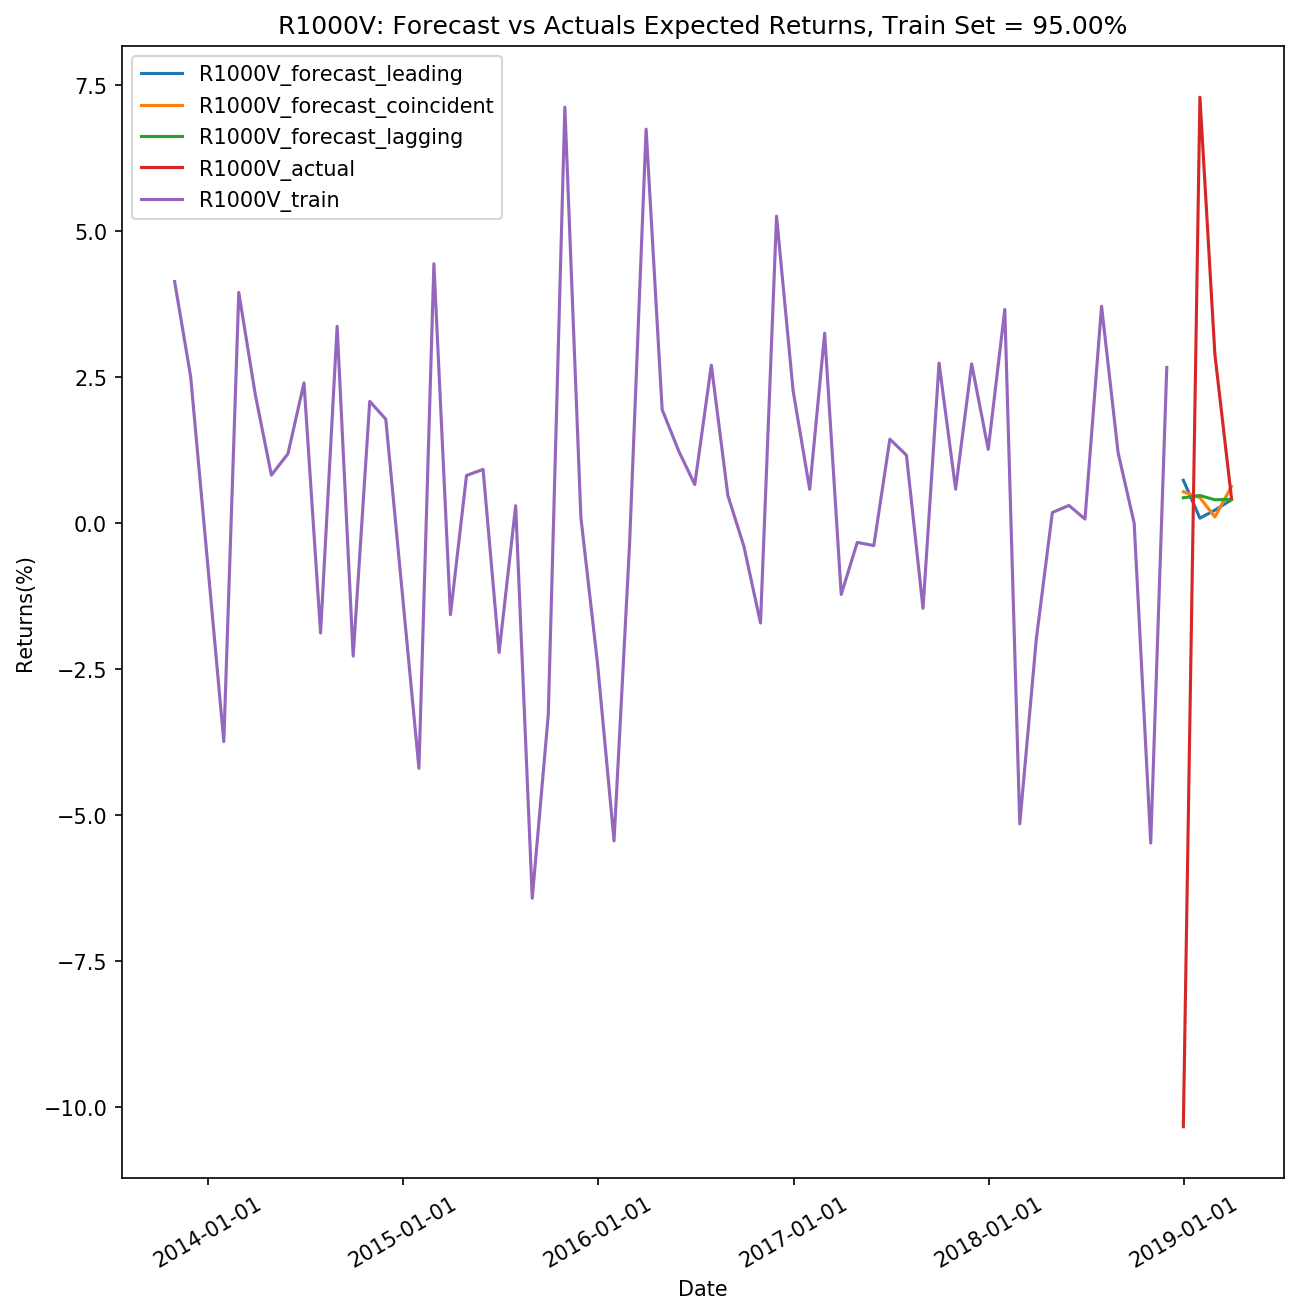

In [51]:
forecast_plot(df1_forecast_merge_R1000V,df1_merge,2,95)

## Part Two: Global Indices VS Global Indicators

### 3. Global Indices

* ACWI Net TR USD 
* ACWI ex USA Net TR USD 
* MSCI EAFE Net TR USD

In [41]:
# Monthly Data
ACWI = pd.read_excel('historyIndex_MSCI.xls', skiprows=5,header=1,skipfooter=18)
ACWI = ACWI.set_index('Date')
ACWI_exUSA = pd.read_excel('historyIndex_MSCI ex USA.xls', skiprows=5,header=1,skipfooter=18)
ACWI_exUSA = ACWI_exUSA.set_index('Date')
EAFE = pd.read_excel('historyIndex_MSCI EAFE.xls', skiprows=5,header=1,skipfooter=18)
EAFE = EAFE.set_index('Date')
Indice_2 = pd.concat([ACWI,ACWI_exUSA,EAFE],join='inner',axis=1)
TR_2 = np.log(Indice_2).diff().dropna()

In [42]:
# Change frequency to monthly
TR_2_M = TR_2.resample('MS').sum()*100
TR_2_M

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-01-01                        2.482919   
2001-02-01                       -8.809918   
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
...                                    ...   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-01-01                               1.482950   
2001-02-01                              -8.251965   
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   


### 4 Forecasting Global Indices

#### 4.1 Data Preparation

CCI_OECD
Date                
2015-01-01   0.69323
2015-02-01   0.75575
2015-03-01   0.72092
2015-04-01   0.62111
2015-05-01   0.52240
2015-06-01   0.47134
2015-07-01   0.39816
2015-08-01   0.32383
2015-09-01   0.27356
2015-10-01   0.33295
2015-11-01   0.38703
2015-12-01   0.27540
2016-01-01   0.04480
2016-02-01  -0.15910
2016-03-01  -0.25060
2016-04-01  -0.23710
2016-05-01  -0.11810
2016-06-01  -0.06970
2016-07-01  -0.02640
2016-08-01   0.05670
2016-09-01   0.11850
2016-10-01   0.03270
2016-11-01  -0.05380
2016-12-01  -0.04270
2017-01-01   0.04070
2017-02-01   0.17730
2017-03-01   0.31180
2017-04-01   0.38800
2017-05-01   0.38160
2017-06-01   0.38990
2017-07-01   0.46560
2017-08-01   0.51930
2017-09-01   0.54790
2017-10-01   0.60200
2017-11-01   0.55960
2017-12-01   0.49140
2018-01-01   0.49670
2018-02-01   0.51720
2018-03-01   0.46270
2018-04-01   0.35430
2018-05-01   0.26980
2018-06-01   0.24160
2018-07-01   0.21220
2018-08-01   0.10780
2018-09-01  -0.01390
2018-10-01  -0.17500
2018-11-01  -0.28920
2018-12-01  -0.37220
2019-01-01  -0.45330
2019-02-01  -0.44690
2019-03-01  -0.38580
2019-04-01  -0.33410
2019-05-01  -0.33180
2019-06-01  -0.38040
2019-07-01  -0.40760

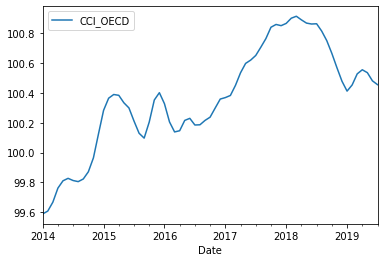

In [43]:
# indicators from OECD downloaded data
def OECD_Month(df,colname):
    df = df.drop(['LOCATION'],axis=1).rename(columns={'TIME':'Date','Value':colname})
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df = df.asfreq(freq='MS',method='bfill')
    df.plot()
    return df
CCI = pd.read_csv("CCI.csv",usecols=[0,5,6])
CCI_OECD = CCI[CCI.LOCATION =='OECD'].reset_index(drop=True)
CCI_OECD = OECD_Month(CCI_OECD,'CCI_OECD')
# Eliminate seasonal effect
CCI_OECD = CCI_OECD.diff(periods=12).dropna()
CCI_OECD

In [44]:
merge4 = pd.concat([TR_2_M,CCI_OECD],join='inner',axis=1)
merge4

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01 

0


[]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01 

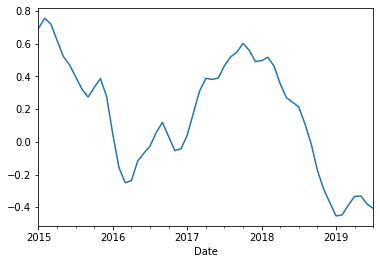

In [45]:
# ADF Test
merge4_diff = merge4.copy()

[index_remove4,merge4_differenced]=ADF_Test(merge4_diff)
index_remove4
merge4_differenced

PPI_Euro
2000-01-01      81.6
2000-02-01      81.9
2000-03-01      82.0
2000-04-01      82.2
2000-05-01      82.5
2000-06-01      82.6
2000-07-01      82.9
2000-08-01      83.1
2000-09-01      83.4
2000-10-01      83.6
2000-11-01      83.8
2000-12-01      83.9
2001-01-01      84.2
2001-02-01      84.6
2001-03-01      85.0
2001-04-01      85.3
2001-05-01      85.4
2001-06-01      85.6
2001-07-01      85.7
2001-08-01      85.6
2001-09-01      85.5
2001-10-01      85.5
2001-11-01      85.5
2001-12-01      85.6
2002-01-01      85.8
2002-02-01      85.8
2002-03-01      86.0
2002-04-01      86.0
2002-05-01      86.0
2002-06-01      85.9
...              ...
2017-01-01     101.0
2017-02-01     101.1
2017-03-01     101.1
2017-04-01     101.6
2017-05-01     101.7
2017-06-01     101.7
2017-07-01     101.7
2017-08-01     101.7
2017-09-01     101.7
2017-10-01     101.6
2017-11-01     101.4
2017-12-01     101.4
2018-01-01     101.2
2018-02-01     101.0
2018-03-01     101.0
2018-04-01     101.0
2018-05-01     101.0
2018-06-01     101.0
2018-07-01     100.9
2018-08-01     100.9
2018-09-01     100.8
2018-10-01     100.8
2018-11-01     100.9
2018-12-01     100.9
2019-01-01     101.0
2019-02-01     101.1
2019-03-01     101.2
2019-04-01     101.4
2019-05-01     101.5
2019-06-01     101.6

[234 rows x 1 columns]

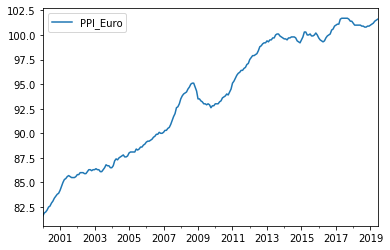

In [46]:
# Monthly Data
PPI_Euro = fred.get_series('PITGCG01EZM661N').dropna()
PPI_Euro = pd.DataFrame(PPI_Euro,columns=['PPI_Euro']).asfreq(freq='MS',method='ffill')
PPI_Euro.plot()
PPI_Euro
PPI_Euro = PPI_Euro.diff(periods=12).dropna()

C:\ProgramData\Anaconda3\lib\site-packages\pandasdmx\writer\data2pandas.py:124: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  d_frame = PD.concat(list(pd_series), axis=1, copy=False)


retail_trade
Date                    
1971-01-01       2.05460
1971-02-01       2.09187
1971-03-01       2.44833
1971-04-01       3.08063
1971-05-01       2.28762
1971-06-01       2.33528
1971-07-01       2.04932
1971-08-01       2.14708
1971-09-01       2.80954
1971-10-01       2.95419
1971-11-01       3.51473
1971-12-01       2.21546
1972-01-01       2.17222
1972-02-01       1.94425
1972-03-01       2.88956
1972-04-01       1.63648
1972-05-01       2.56399
1972-06-01       2.49373
1972-07-01       2.71403
1972-08-01       3.23228
1972-09-01       2.75641
1972-10-01       2.68422
1972-11-01       2.65864
1972-12-01       4.17277
1973-01-01       4.38253
1973-02-01       5.07041
1973-03-01       4.01656
1973-04-01       3.86458
1973-05-01       2.71320
1973-06-01       3.10242
...                  ...
2017-01-01       2.23530
2017-02-01       2.03270
2017-03-01       2.46300
2017-04-01       2.62460
2017-05-01       2.22530
2017-06-01       2.26020
2017-07-01       1.93330
2017-08-01       1.83340
2017-09-01       2.91480
2017-10-01       1.73080
2017-11-01       3.16760
2017-12-01       2.66040
2018-01-01       2.04910
2018-02-01       2.11920
2018-03-01       2.33680
2018-04-01       2.04620
2018-05-01       2.97770
2018-06-01       2.56580
2018-07-01       2.53690
2018-08-01       2.80940
2018-09-01       1.50590
2018-10-01       2.39080
2018-11-01       1.89680
2018-12-01       0.45340
2019-01-01       1.72650
2019-02-01       1.44880
2019-03-01       2.08450
2019-04-01       1.85890
2019-05-01       1.15560
2019-06-01       1.80580

[582 rows x 1 columns]

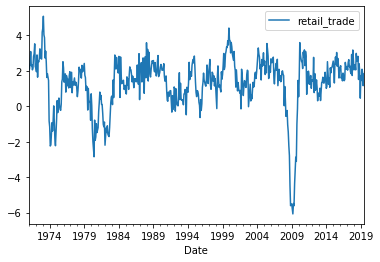

In [47]:
# Get OECD Data through API (not so stable),
# might need to rerun the cell to get the result
def OECD_API_M(df,colname):
    df = df.rename(columns={'index':'Date','M':colname})
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df = df.asfreq(freq='MS',method='ffill')
    df = df.diff(periods=12).dropna()
    df.plot()
    return df

oecd = pandasdmx.Request('OECD')
data_response = oecd.data(resource_id='MEI_REAL')
retail_trade = data_response.write(data_response.data.series, parse_time=False)
retail_trade = retail_trade['SLRTTO01']['OECD']['M'].dropna()
retail_trade = retail_trade.reset_index()

retail_trade = OECD_API_M(retail_trade,'retail_trade')
retail_trade

industry_production
Date                           
1976-01-01              1.39705
1976-02-01              2.35386
1976-03-01              2.71172
1976-04-01              3.48753
1976-05-01              3.97053
1976-06-01              3.83950
1976-07-01              3.87385
1976-08-01              3.67011
1976-09-01              3.87121
1976-10-01              3.53334
1976-11-01              3.85906
1976-12-01              3.63586
1977-01-01              3.40326
1977-02-01              2.90801
1977-03-01              2.92768
1977-04-01              2.57885
1977-05-01              2.11731
1977-06-01              2.13179
1977-07-01              1.74768
1977-08-01              1.99897
1977-09-01              1.71192
1977-10-01              1.61783
1977-11-01              1.15530
1977-12-01              1.30957
1978-01-01              0.96064
1978-02-01              0.79423
1978-03-01              0.90087
1978-04-01              1.78888
1978-05-01              1.62082
1978-06-01              1.66024
...                         ...
2016-12-01              2.07272
2017-01-01              0.88680
2017-02-01              1.44130
2017-03-01              2.34949
2017-04-01              2.79930
2017-05-01              3.40613
2017-06-01              2.92670
2017-07-01              3.62010
2017-08-01              3.45430
2017-09-01              3.46820
2017-10-01              3.34320
2017-11-01              3.72860
2017-12-01              4.18740
2018-01-01              3.08300
2018-02-01              3.37700
2018-03-01              3.34440
2018-04-01              2.77140
2018-05-01              2.79950
2018-06-01              2.78140
2018-07-01              2.50500
2018-08-01              2.51110
2018-09-01              2.19170
2018-10-01              2.28470
2018-11-01              0.61830
2018-12-01             -0.18640
2019-01-01              0.92780
2019-02-01              0.42170
2019-03-01              0.32690
2019-04-01             -0.00130
2019-05-01              0.68260

[521 rows x 1 columns]

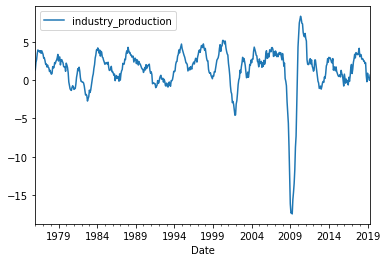

In [48]:
data_response = oecd.data(resource_id='MEI_REAL')
industry_production = data_response.write(data_response.data.series, parse_time=False)
industry_production = industry_production['PRINTO01']['OECD']['M'].dropna()
industry_production = industry_production.reset_index()
industry_production = OECD_API_M(industry_production,'industry_production')
industry_production

In [49]:
merge5 = pd.concat([TR_2_M,PPI_Euro,retail_trade,industry_production],join='inner',axis=1)
merge5

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-01-01                        2.482919   
2001-02-01                       -8.809918   
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
...                                    ...   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-01-01                               1.482950   
2001-02-01                              -8.251965   
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   


1
1
0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
...                                    ...   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   


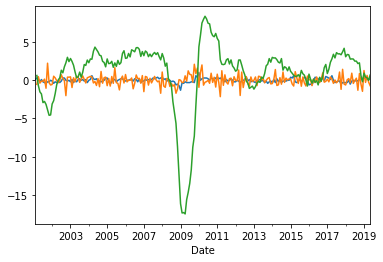

In [50]:
# ADF Test
merge5_diff = merge5.copy()

[index_remove5,merge5_differenced]=ADF_Test(merge5_diff)
index_remove5
merge5_differenced

In [51]:
GDP = pd.read_excel("IMF_GDP.xlsx")
Inflation = pd.read_excel("IMF_Inflation.xlsx")
Balance = pd.read_excel("IMF_Current.xlsx")
NetBL = pd.read_excel("IMF_NetBL.xlsx")
Debt = pd.read_excel("IMF_Debt.xlsx")

In [52]:
def IMF_Data(df):
    # Emerging Economies
    col_name = df.columns[0]
    df_Emerging = df[df[col_name]=='Emerging market and developing economies'].T
    df_Emerging = df_Emerging.reset_index().iloc[1:,:]
    col1 = df_Emerging.columns[0]
    col2 = df_Emerging.columns[1]
    col_name1 = col_name+"_Emerging"
    df_Emerging = df_Emerging.rename(columns = {col1:'Date',col2:col_name1})
    df_Emerging = df_Emerging[df_Emerging[col_name1]!='no data'].reset_index(drop=True)
    df_Emerging['Date'] = pd.to_datetime(df_Emerging['Date'],format='%Y')
    df_Emerging = df_Emerging.set_index('Date').asfreq(freq='MS',method='ffill').astype({col_name1: 'float64'})
    df_Emerging.plot()
    
    # Advanced Economies
    df_Advanced = df[df[col_name]=='Advanced economies'].T
    df_Advanced = df_Advanced.reset_index().iloc[1:,:]
    col3 = df_Advanced.columns[1]
    col_name2 = col_name+'_Advanced'
    df_Advanced = df_Advanced.rename(columns = {col1:'Date',col3:col_name2})
    df_Advanced = df_Advanced[df_Advanced[col_name2]!='no data'].reset_index(drop=True)
    df_Advanced['Date'] = pd.to_datetime(df_Advanced['Date'],format='%Y')
    df_Advanced = df_Advanced.set_index('Date').asfreq(freq='MS',method='ffill').astype({col_name2: 'float64'})
    df_Advanced.plot()
    return df_Emerging,df_Advanced

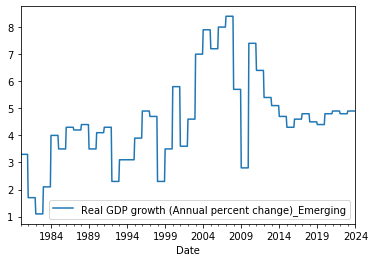

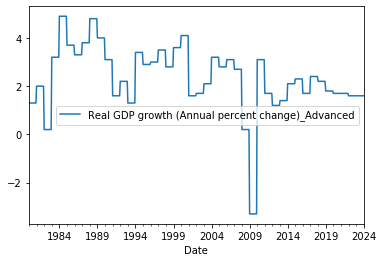

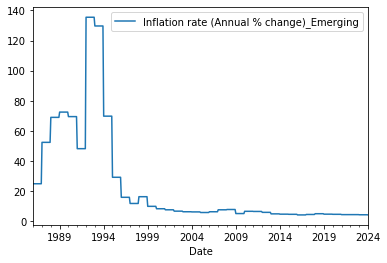

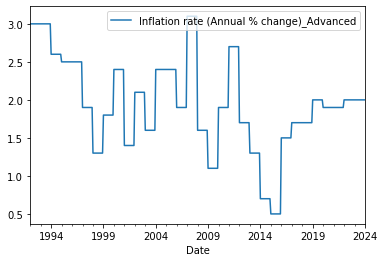

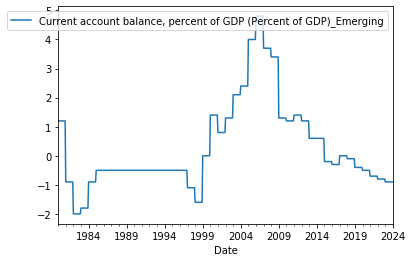

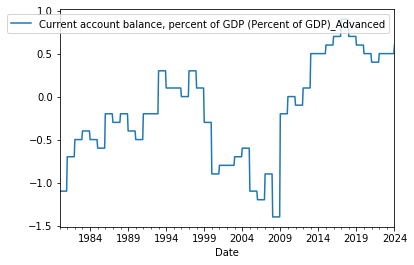

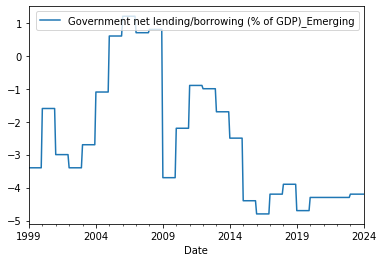

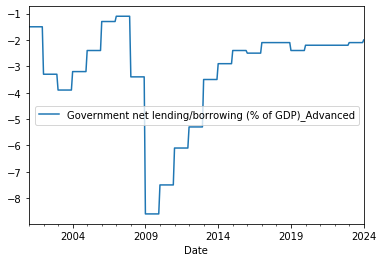

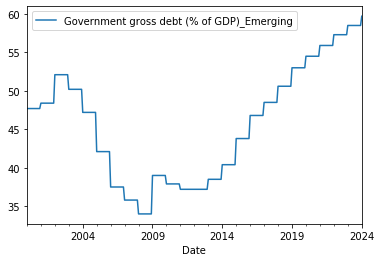

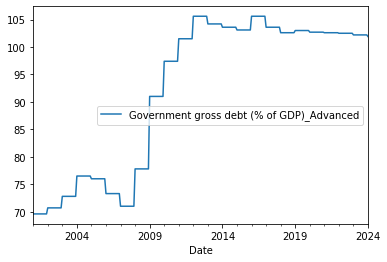

In [53]:
[GDP_Emerging,GDP_Advanced] = IMF_Data(GDP)
[Inflation_Emerging,Inflation_Advanced] = IMF_Data(Inflation)
[Balance_Emerging,Balance_Advanced] = IMF_Data(Balance)
[NetBL_Emerging,NetBL_Advanced] = IMF_Data(NetBL)
[Debt_Emerging,Debt_Advanced] = IMF_Data(Debt)

In [54]:
merge6 = pd.concat([TR_2_M,GDP_Emerging,GDP_Advanced,Inflation_Emerging,Inflation_Advanced,
                     Balance_Emerging,Balance_Advanced,NetBL_Emerging,NetBL_Advanced,
                     Debt_Emerging,Debt_Advanced],join='inner',axis=1)

merge6

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-01-01                        2.482919   
2001-02-01                       -8.809918   
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
...                                    ...   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-01-01                               1.482950   
2001-02-01                              -8.251965   
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   


#### 4.1.1 Forecast the returns for EAFE

In [55]:
# Granger Test
[causation_matrix,index_remove,merge4_tested] = causation_test(merge4_differenced,2,3)
causation_matrix
index_remove
merge4_tested

# Forecast, Train Set = 0.95
[model4_fitted,df4,df4_train,df4_test,df4_forecast] = VAR_Model(merge4_tested,2,3,0.1)


            EAFE Standard (Large+Mid Cap)   CCI_OECD
Date                                                
2015-01-01                        0.487645   0.69323
2015-02-01                        5.806216   0.75575
2015-03-01                       -1.530766   0.72092
2015-04-01                        4.001753   0.62111
2015-05-01                       -0.513193   0.52240
2015-06-01                       -2.874268   0.47134
2015-07-01                        2.055070   0.39816
2015-08-01                       -7.640913   0.32383
2015-09-01                       -5.211017   0.27356
2015-10-01                        7.526464   0.33295
2015-11-01                       -1.567915   0.38703
2015-12-01                       -1.356572   0.27540
2016-01-01                       -7.506189   0.04480
2016-02-01                       -1.849067  -0.15910
2016-03-01                        6.303813  -0.25060
2016-04-01                        2.853993  -0.23710
2016-05-01                       -0.912559  -0

EAFE Standard (Large+Mid Cap) _x  CCI_OECD_x
EAFE Standard (Large+Mid Cap) _y                            1.0000      0.0004
CCI_OECD_y                                                  0.0003      1.0000

[]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Sep, 2019
Time:                     16:09:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.35283
Nobs:                     44.0000    HQIC:                  -2.91410
Log likelihood:          -31.4781    FPE:                  0.0398243
AIC:                     -3.24493    Det(Omega_mle):       0.0254875
--------------------------------------------------------------------
Results for equation EAFE Standard (Large+Mid Cap) 
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     1.279205         0.822279            1.556           0.120
L1.EAFE Standard (Large+Mid Cap)         -0.372530      

In [56]:
# Grangers Causation Test
[causation_matrix,index_remove,merge5_tested] = causation_test(merge5_differenced,2,3)
causation_matrix
index_remove
merge5_tested

# Forecast, Train Size = 95%
[model5_fitted,df5,df5_train,df5_test,df5_forecast] = VAR_Model(merge5_tested,2,3,0.1)


            EAFE Standard (Large+Mid Cap)       PPI_Euro  retail_trade  \
Date                                                                     
2001-03-01                       -6.898659  3.000000e-01      -0.53485   
2001-04-01                        6.718359  1.000000e-01       0.47081   
2001-05-01                       -3.593168 -2.000000e-01      -0.37352   
2001-06-01                       -4.175518  1.000000e-01      -0.09058   
2001-07-01                       -1.836245 -2.000000e-01      -0.13415   
2001-08-01                       -2.566816 -3.000000e-01       0.15084   
2001-09-01                      -10.679162 -4.000000e-01      -1.03901   
2001-10-01                        2.528992 -2.000000e-01       2.23691   
2001-11-01                        3.619946 -2.000000e-01      -0.31980   
2001-12-01                        0.592362 -1.421085e-14      -0.61475   
2002-01-01                       -5.459832 -1.000000e-01      -0.54838   
2002-02-01                        0.69

EAFE Standard (Large+Mid Cap) _x  \
EAFE Standard (Large+Mid Cap) _y                            1.0000   
PPI_Euro_y                                                  0.1344   
retail_trade_y                                              0.0002   
industry_production_y                                       0.0000   

                                  PPI_Euro_x  retail_trade_x  \
EAFE Standard (Large+Mid Cap) _y      0.4069          0.0381   
PPI_Euro_y                            1.0000          0.0000   
retail_trade_y                        0.0001          1.0000   
industry_production_y                 0.0003          0.0000   

                                  industry_production_x  
EAFE Standard (Large+Mid Cap) _y                 0.0357  
PPI_Euro_y                                       0.0001  
retail_trade_y                                   0.0000  
industry_production_y                            1.0000

[3]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
...                                    ...   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Sep, 2019
Time:                     16:09:35
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    2.19084
Nobs:                     193.000    HQIC:                   1.79853
Log likelihood:          -930.359    FPE:                    4.62812
AIC:                      1.53154    Det(Omega_mle):         3.80605
--------------------------------------------------------------------
Results for equation EAFE Standard (Large+Mid Cap) 
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     0.319552         0.354214            0.902           0.367
L1.EAFE Standard (Large+Mid Cap)          0.214765      

In [57]:
# Grangers Causation Test
[causation_matrix,index_remove,merge6_tested] = causation_test(merge6,2,3)
causation_matrix
index_remove
merge6_tested

# Forecast, Train Size = 95%
[model6_fitted,df6,df6_train,df6_test,df6_forecast] = VAR_Model(merge6_tested,2,3,0.1)


            EAFE Standard (Large+Mid Cap)   \
Date                                         
2001-01-01                       -0.051589   
2001-02-01                       -7.792647   
2001-03-01                       -6.898659   
2001-04-01                        6.718359   
2001-05-01                       -3.593168   
2001-06-01                       -4.175518   
2001-07-01                       -1.836245   
2001-08-01                       -2.566816   
2001-09-01                      -10.679162   
2001-10-01                        2.528992   
2001-11-01                        3.619946   
2001-12-01                        0.592362   
2002-01-01                       -5.459832   
2002-02-01                        0.698988   
2002-03-01                        5.268001   
2002-04-01                        0.660519   
2002-05-01                        1.259102   
2002-06-01                       -4.061957   
2002-07-01                      -10.393948   
2002-08-01                       -

EAFE Standard (Large+Mid Cap) _x  \
EAFE Standard (Large+Mid Cap) _y                                              1.0000   
Real GDP growth (Annual percent change)_Emerging_y                            0.0058   
Real GDP growth (Annual percent change)_Advanced_y                            0.0000   
Inflation rate (Annual % change)_Emerging_y                                   0.0000   
Inflation rate (Annual % change)_Advanced_y                                   0.2959   
Current account balance, percent of GDP (Percen...                            0.0035   
Current account balance, percent of GDP (Percen...                            0.0000   
Government net lending/borrowing (% of GDP)_Eme...                            0.0000   
Government net lending/borrowing (% of GDP)_Adv...                            0.0000   
Government gross debt (% of GDP)_Emerging_y                                   0.0061   
Government gross debt (% of GDP)_Advanced_y                                   0.0000   

                                                    Real GDP growth (Annual percent change)_Emerging_x  \
EAFE Standard (Large+Mid Cap) _y                                                               0.0087    
Real GDP growth (Annual percent change)_Emerging_y                                             1.0000    
Real GDP growth (Annual percent change)_Advanced_y                                             0.5691    
Inflation rate (Annual % change)_Emerging_y                                                    0.2247    
Inflation rate (Annual % change)_Advanced_y                                                    0.3213    
Current account balance, percent of GDP (Percen...                                             0.2030    
Current account balance, percent of GDP (Percen...                                             0.0649    
Government net lending/borrowing (% of GDP)_Eme...                                             0.0117    
Government net lending/borrowing (% of GDP)_Adv...                                             0.6894    
Government gross debt (% of GDP)_Emerging_y                                                    0.0000    
Government gross debt (% of GDP)_Advanced_y                                                    0.6603    

                                                    Real GDP growth (Annual percent change)_Advanced_x  \
EAFE Standard (Large+Mid Cap) _y                                                               0.0027    
Real GDP growth (Annual percent change)_Emerging_y                                             0.3080    
Real GDP growth (Annual percent change)_Advanced_y                                             1.0000    
Inflation rate (Annual % change)_Emerging_y                                                    0.9945    
Inflation rate (Annual % change)_Advanced_y                                                    0.5196    
Current account balance, percent of GDP (Percen...                                             0.2118    
Current account balance, percent of GDP (Percen...                                             0.0503    
Government net lending/borrowing (% of GDP)_Eme...                                             0.4509    
Government net lending/borrowing (% of GDP)_Adv...                                             0.0765    
Government gross debt (% of GDP)_Emerging_y                                                    0.3552    
Government gross debt (% of GDP)_Advanced_y                                                    0.0080    

                                                    Inflation rate (Annual % change)_Emerging_x  \
EAFE Standard (Large+Mid Cap) _y                                                         0.0157   
Real GDP growth (Annual percent change)_Emerging_y                                       0.7078   
Real GDP growth (Annual percent change)_Advanced_y                                       0.0751   
Inflation rate (Annual % change)_Emerging_y          

[6, 7, 11, 12]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-01-01                        2.482919   
2001-02-01                       -8.809918   
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
...                                    ...   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-01-01                               1.482950   
2001-02-01                              -8.251965   
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Sep, 2019
Time:                     16:09:40
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -13.2409
Nobs:                     199.000    HQIC:                  -13.7925
Log likelihood:          -510.903    FPE:                7.03418e-07
AIC:                     -14.1676    Det(Omega_mle):     5.33818e-07
--------------------------------------------------------------------
Results for equation EAFE Standard (Large+Mid Cap) 
                                                                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                        1.371496  

* Forecast VS. Actual Plot

In [58]:
# Merge the three forecasts as the index "date"
df2_merge = pd.concat([merge4_differenced,merge5_differenced,merge6],join='inner',axis=1).T.drop_duplicates().T

df2_forecast_merge = pd.concat([df4_forecast,df5_forecast,
                                       df6_forecast],join='inner',axis=1)['EAFE Standard (Large+Mid Cap) _forecast']
df2_forecast_merge

EAFE Standard (Large+Mid Cap) _forecast  \
Date                                                  
2019-02-01                                -2.180070   
2019-03-01                                -2.636576   
2019-04-01                                 1.790177   
2019-05-01                                 1.601163   

            EAFE Standard (Large+Mid Cap) _forecast  \
Date                                                  
2019-02-01                                 0.451256   
2019-03-01                                 0.462334   
2019-04-01                                 0.469096   
2019-05-01                                 0.472708   

            EAFE Standard (Large+Mid Cap) _forecast  
Date                                                 
2019-02-01                                 0.623771  
2019-03-01                                 0.625516  
2019-04-01                                 0.627855  
2019-05-01                                 0.630692

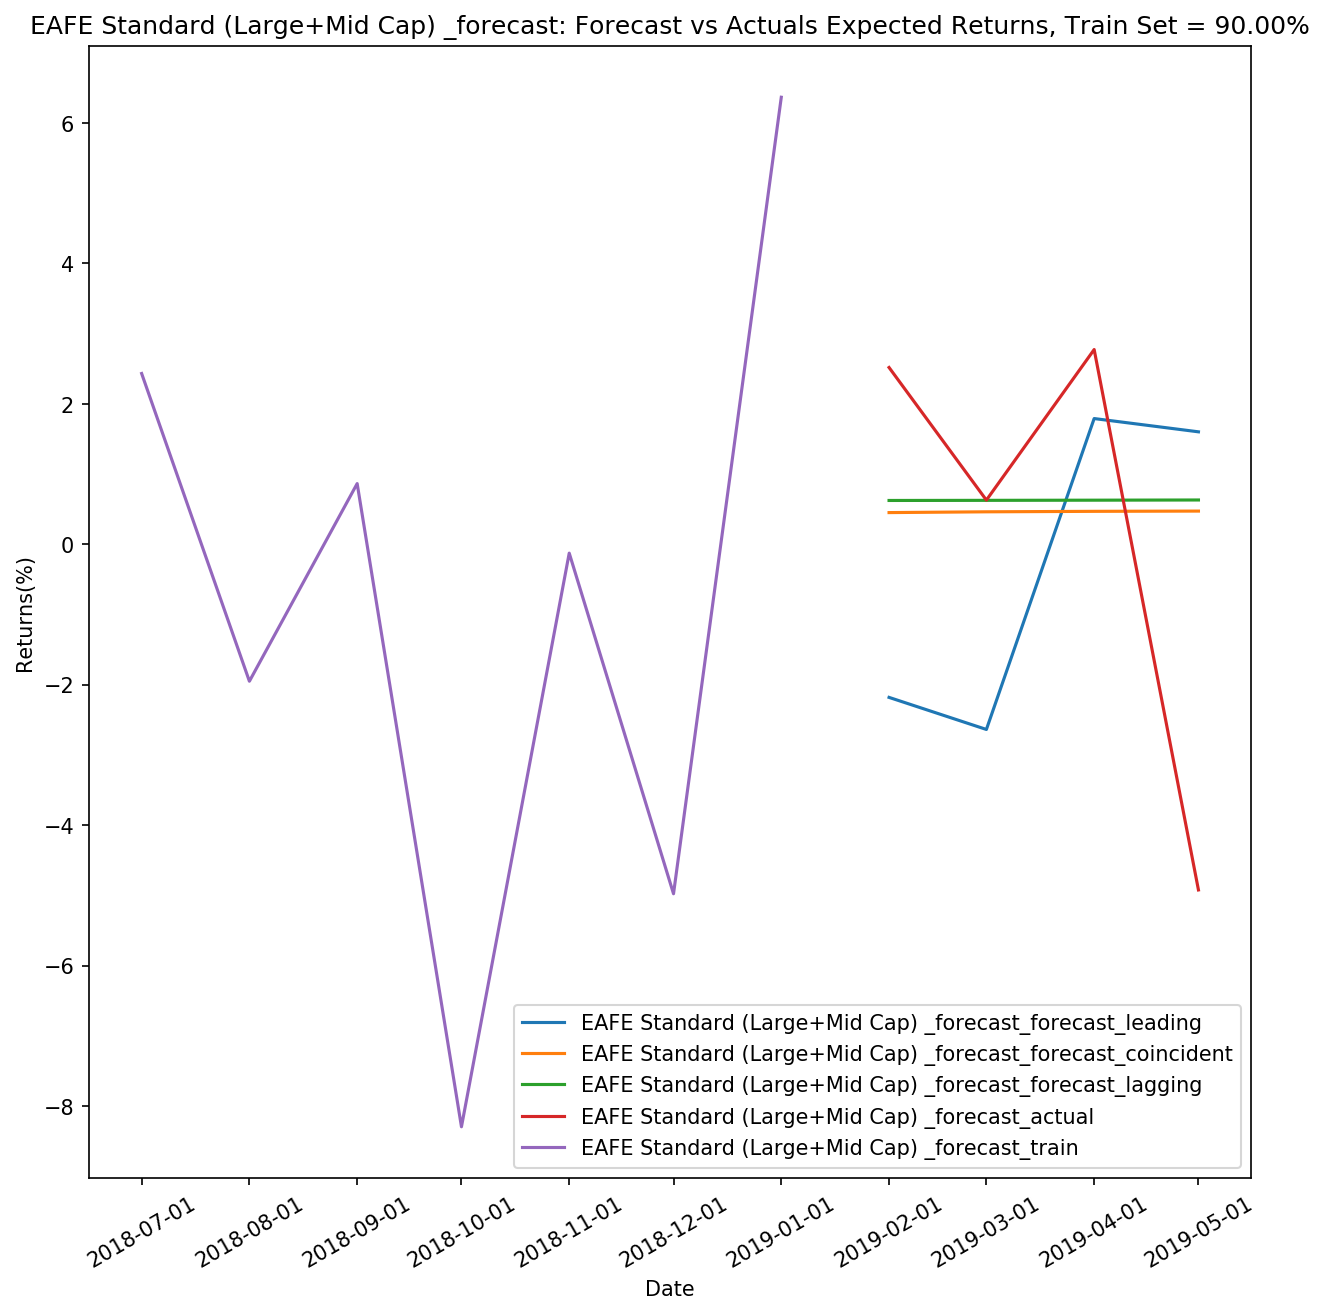

In [59]:
forecast_plot(df2_forecast_merge,df2_merge,2,90)

#### 4.1.2 Forecast the returns for ACWI

In [60]:
[causation_matrix,index_remove,merge4_tested_ACWI] = causation_test(merge4_differenced,0,3)
causation_matrix
index_remove
merge4_tested_ACWI

# Train Set = 0.95
[model4_fitted_ACWI,df4_ACWI,df4_train_ACWI,df4_test_ACWI,df4_forecast_ACWI] = VAR_Model(merge4_tested_ACWI,0,3,0.1)


            ACWI Standard (Large+Mid Cap)   CCI_OECD
Date                                                
2015-01-01                       -1.575821   0.69323
2015-02-01                        5.417695   0.75575
2015-03-01                       -1.561583   0.72092
2015-04-01                        2.860148   0.62111
2015-05-01                       -0.130563   0.52240
2015-06-01                       -2.382347   0.47134
2015-07-01                        0.864648   0.39816
2015-08-01                       -7.101387   0.32383
2015-09-01                       -3.690154   0.27356
2015-10-01                        7.555724   0.33295
2015-11-01                       -0.829184   0.38703
2015-12-01                       -1.819871   0.27540
2016-01-01                       -6.220588   0.04480
2016-02-01                       -0.690262  -0.15910
2016-03-01                        7.149027  -0.25060
2016-04-01                        1.465346  -0.23710
2016-05-01                        0.125949  -0

ACWI Standard (Large+Mid Cap) _x  CCI_OECD_x
ACWI Standard (Large+Mid Cap) _y                               1.0      0.0005
CCI_OECD_y                                                     0.0      1.0000

[]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Sep, 2019
Time:                     16:09:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.79459
Nobs:                     46.0000    HQIC:                  -3.14265
Log likelihood:          -39.4662    FPE:                  0.0352119
AIC:                     -3.35114    Det(Omega_mle):       0.0265249
--------------------------------------------------------------------
Results for equation ACWI Standard (Large+Mid Cap) 
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     1.248565         0.761854            1.639           0.101
L1.ACWI Standard (Large+Mid Cap)         -0.261752      

In [61]:
[causation_matrix,index_remove,merge5_tested_ACWI] = causation_test(merge5_differenced,0,3)
causation_matrix
index_remove
merge5_tested_ACWI

# Train Size = 95%
[model5_fitted_ACWI,df5_ACWI,df5_train_ACWI,df5_test_ACWI,df5_forecast_ACWI] = VAR_Model(merge5_tested_ACWI,0,3,0.1)


            ACWI Standard (Large+Mid Cap)       PPI_Euro  retail_trade  \
Date                                                                     
2001-03-01                       -7.007856  3.000000e-01      -0.53485   
2001-04-01                        6.990809  1.000000e-01       0.47081   
2001-05-01                       -1.182203 -2.000000e-01      -0.37352   
2001-06-01                       -3.141000  1.000000e-01      -0.09058   
2001-07-01                       -1.609420 -2.000000e-01      -0.13415   
2001-08-01                       -4.740498 -3.000000e-01       0.15084   
2001-09-01                       -9.607513 -4.000000e-01      -1.03901   
2001-10-01                        2.088319 -2.000000e-01       2.23691   
2001-11-01                        5.940744 -2.000000e-01      -0.31980   
2001-12-01                        0.911157 -1.421085e-14      -0.61475   
2002-01-01                       -2.799256 -1.000000e-01      -0.54838   
2002-02-01                       -0.76

ACWI Standard (Large+Mid Cap) _x  \
ACWI Standard (Large+Mid Cap) _y                            1.0000   
PPI_Euro_y                                                  0.0823   
retail_trade_y                                              0.0001   
industry_production_y                                       0.0000   

                                  PPI_Euro_x  retail_trade_x  \
ACWI Standard (Large+Mid Cap) _y      0.2866           0.018   
PPI_Euro_y                            1.0000           0.000   
retail_trade_y                        0.0001           1.000   
industry_production_y                 0.0003           0.000   

                                  industry_production_x  
ACWI Standard (Large+Mid Cap) _y                 0.0228  
PPI_Euro_y                                       0.0001  
retail_trade_y                                   0.0000  
industry_production_y                            1.0000

[3]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
...                                    ...   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Sep, 2019
Time:                     16:09:42
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    2.01293
Nobs:                     193.000    HQIC:                   1.62063
Log likelihood:          -913.191    FPE:                    3.87384
AIC:                      1.35363    Det(Omega_mle):         3.18575
--------------------------------------------------------------------
Results for equation ACWI Standard (Large+Mid Cap) 
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     0.364773         0.327323            1.114           0.265
L1.ACWI Standard (Large+Mid Cap)          0.195838      

In [62]:
[causation_matrix,index_remove,merge6_tested_ACWI] = causation_test(merge6,0,3)
causation_matrix
index_remove
merge6_tested_ACWI

# Train Size = 95%
[model6_fitted_ACWI,df6_ACWI,df6_train_ACWI,df6_test_ACWI,df6_forecast_ACWI] = VAR_Model(merge6_tested_ACWI,0,3,0.1)


            ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-01-01                        2.482919   
2001-02-01                       -8.809918   
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        

ACWI Standard (Large+Mid Cap) _x  \
ACWI Standard (Large+Mid Cap) _y                                              1.0000   
Real GDP growth (Annual percent change)_Emerging_y                            0.0075   
Real GDP growth (Annual percent change)_Advanced_y                            0.0000   
Inflation rate (Annual % change)_Emerging_y                                   0.0000   
Inflation rate (Annual % change)_Advanced_y                                   0.3652   
Current account balance, percent of GDP (Percen...                            0.0019   
Current account balance, percent of GDP (Percen...                            0.0000   
Government net lending/borrowing (% of GDP)_Eme...                            0.0000   
Government net lending/borrowing (% of GDP)_Adv...                            0.0000   
Government gross debt (% of GDP)_Emerging_y                                   0.0143   
Government gross debt (% of GDP)_Advanced_y                                   0.0000   

                                                    Real GDP growth (Annual percent change)_Emerging_x  \
ACWI Standard (Large+Mid Cap) _y                                                               0.0187    
Real GDP growth (Annual percent change)_Emerging_y                                             1.0000    
Real GDP growth (Annual percent change)_Advanced_y                                             0.5691    
Inflation rate (Annual % change)_Emerging_y                                                    0.2247    
Inflation rate (Annual % change)_Advanced_y                                                    0.3213    
Current account balance, percent of GDP (Percen...                                             0.2030    
Current account balance, percent of GDP (Percen...                                             0.0649    
Government net lending/borrowing (% of GDP)_Eme...                                             0.0117    
Government net lending/borrowing (% of GDP)_Adv...                                             0.6894    
Government gross debt (% of GDP)_Emerging_y                                                    0.0000    
Government gross debt (% of GDP)_Advanced_y                                                    0.6603    

                                                    Real GDP growth (Annual percent change)_Advanced_x  \
ACWI Standard (Large+Mid Cap) _y                                                               0.0057    
Real GDP growth (Annual percent change)_Emerging_y                                             0.3080    
Real GDP growth (Annual percent change)_Advanced_y                                             1.0000    
Inflation rate (Annual % change)_Emerging_y                                                    0.9945    
Inflation rate (Annual % change)_Advanced_y                                                    0.5196    
Current account balance, percent of GDP (Percen...                                             0.2118    
Current account balance, percent of GDP (Percen...                                             0.0503    
Government net lending/borrowing (% of GDP)_Eme...                                             0.4509    
Government net lending/borrowing (% of GDP)_Adv...                                             0.0765    
Government gross debt (% of GDP)_Emerging_y                                                    0.3552    
Government gross debt (% of GDP)_Advanced_y                                                    0.0080    

                                                    Inflation rate (Annual % change)_Emerging_x  \
ACWI Standard (Large+Mid Cap) _y                                                         0.0049   
Real GDP growth (Annual percent change)_Emerging_y                                       0.7078   
Real GDP growth (Annual percent change)_Advanced_y                                       0.0751   
Inflation rate (Annual % change)_Emerging_y          

[7, 11]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-01-01                        2.482919   
2001-02-01                       -8.809918   
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
...                                    ...   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-01-01                               1.482950   
2001-02-01                              -8.251965   
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Sep, 2019
Time:                     16:09:48
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -16.7614
Nobs:                     199.000    HQIC:                  -17.6481
Log likelihood:          -635.357    FPE:                1.18598e-08
AIC:                     -18.2509    Det(Omega_mle):     7.62851e-09
--------------------------------------------------------------------
Results for equation ACWI Standard (Large+Mid Cap) 
                                                                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                       21.756051  

* Forecast VS. Actual Plot

In [63]:
# Merge the three forecasts as the index "date"
df2_forecast_merge_ACWI = pd.concat([df4_forecast_ACWI,df5_forecast_ACWI,
                                       df6_forecast_ACWI],join='inner',axis=1)['ACWI Standard (Large+Mid Cap) _forecast']
df2_forecast_merge_ACWI
df2_merge

ACWI Standard (Large+Mid Cap) _forecast  \
Date                                                  
2019-02-01                                -0.831493   
2019-03-01                                 2.195589   
2019-04-01                                -1.169561   
2019-05-01                                 2.089160   

            ACWI Standard (Large+Mid Cap) _forecast  \
Date                                                  
2019-02-01                                 0.473103   
2019-03-01                                 0.487543   
2019-04-01                                 0.498018   
2019-05-01                                 0.505202   

            ACWI Standard (Large+Mid Cap) _forecast  
Date                                                 
2019-02-01                                 0.612306  
2019-03-01                                 0.606421  
2019-04-01                                 0.602493  
2019-05-01                                 0.600230

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01                               3.481131   
2017-02-01                               1.581752 

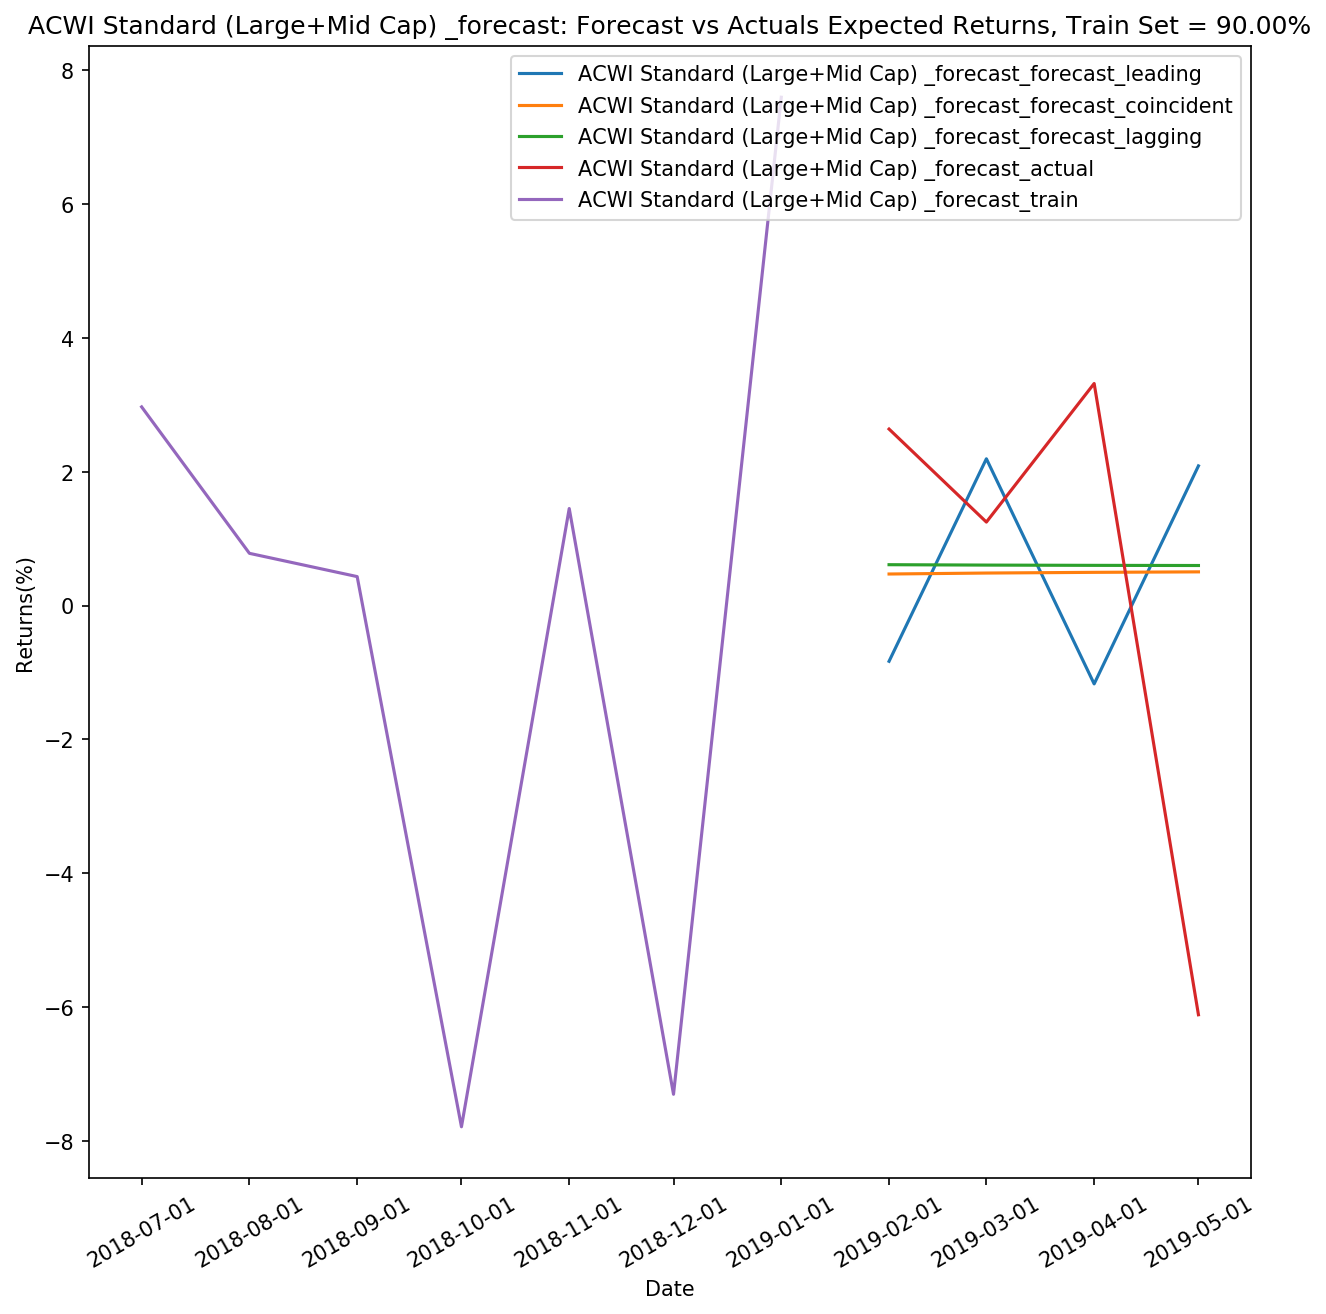

In [64]:
forecast_plot(df2_forecast_merge_ACWI,df2_merge,0,90)

#### 4.1.3 Forecast the returns for ACWI ex USA

In [65]:
[causation_matrix,index_remove,merge4_tested_ACWI_exUSA] = causation_test(merge4_differenced,1,3)
causation_matrix
index_remove
merge4_tested_ACWI_exUSA

# Train Set = 95%

[model4_fitted_ACWI_exUSA,df4_ACWI_exUSA,df4_train_ACWI_exUSA,df4_test_ACWI_exUSA,df4_forecast_ACWI_exUSA] = VAR_Model(merge4_tested_ACWI_exUSA,1,3,0.1)


            ACWI ex USA Standard (Large+Mid Cap)   CCI_OECD
Date                                                       
2015-01-01                              -0.148287   0.69323
2015-02-01                               5.208461   0.75575
2015-03-01                              -1.629695   0.72092
2015-04-01                               4.928196   0.62111
2015-05-01                              -1.573472   0.52240
2015-06-01                              -2.829764   0.47134
2015-07-01                              -0.278227   0.39816
2015-08-01                              -7.951185   0.32383
2015-09-01                              -4.747652   0.27356
2015-10-01                               7.180210   0.33295
2015-11-01                              -2.085747   0.38703
2015-12-01                              -1.901501   0.27540
2016-01-01                              -7.044573   0.04480
2016-02-01                              -1.149534  -0.15910
2016-03-01                              

ACWI ex USA Standard (Large+Mid Cap) _x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                   1.0000   
CCI_OECD_y                                                                0.0004   

                                         CCI_OECD_x  
ACWI ex USA Standard (Large+Mid Cap) _y      0.0003  
CCI_OECD_y                                   1.0000

[]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Sep, 2019
Time:                     16:10:17
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.26967
Nobs:                     44.0000    HQIC:                  -2.83093
Log likelihood:          -33.3078    FPE:                  0.0432780
AIC:                     -3.16176    Det(Omega_mle):       0.0276979
--------------------------------------------------------------------
Results for equation ACWI ex USA Standard (Large+Mid Cap) 
                                              coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------
const                                            1.628315         0.868455            1.875           0.061
L1.ACWI ex USA Standard (Lar

In [66]:
[causation_matrix,index_remove,merge5_tested_ACWI_exUSA] = causation_test(merge5_differenced,1,3)
causation_matrix
index_remove
merge5_tested_ACWI_exUSA

# Train Size = 95%
[model5_fitted_ACWI_exUSA,df5_ACWI_exUSA,df5_train_ACWI_exUSA,df5_test_ACWI_exUSA,df5_forecast_ACWI_exUSA] = VAR_Model(merge5_tested_ACWI_exUSA,1,3,0.1)


            ACWI ex USA Standard (Large+Mid Cap)       PPI_Euro  retail_trade  \
Date                                                                            
2001-03-01                              -7.379277  3.000000e-01      -0.53485   
2001-04-01                               6.526041  1.000000e-01       0.47081   
2001-05-01                              -2.876030 -2.000000e-01      -0.37352   
2001-06-01                              -3.949976  1.000000e-01      -0.09058   
2001-07-01                              -2.262334 -2.000000e-01      -0.13415   
2001-08-01                              -2.537509 -3.000000e-01       0.15084   
2001-09-01                             -11.240150 -4.000000e-01      -1.03901   
2001-10-01                               2.765227 -2.000000e-01       2.23691   
2001-11-01                               4.464221 -2.000000e-01      -0.31980   
2001-12-01                               1.276394 -1.421085e-14      -0.61475   
2002-01-01                  

ACWI ex USA Standard (Large+Mid Cap) _x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                   1.0000   
PPI_Euro_y                                                                0.0525   
retail_trade_y                                                            0.0001   
industry_production_y                                                     0.0000   

                                         PPI_Euro_x  retail_trade_x  \
ACWI ex USA Standard (Large+Mid Cap) _y      0.3434          0.0476   
PPI_Euro_y                                   1.0000          0.0000   
retail_trade_y                               0.0001          1.0000   
industry_production_y                        0.0003          0.0000   

                                         industry_production_x  
ACWI ex USA Standard (Large+Mid Cap) _y                 0.0473  
PPI_Euro_y                                              0.0001  
retail_trade_y                                          0.0000  
industry_production_y                                   1.0000

[3]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
...                                    ...   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Sep, 2019
Time:                     16:10:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    2.23140
Nobs:                     193.000    HQIC:                   1.83910
Log likelihood:          -934.273    FPE:                    4.81973
AIC:                      1.57210    Det(Omega_mle):         3.96363
--------------------------------------------------------------------
Results for equation ACWI ex USA Standard (Large+Mid Cap) 
                                              coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------
const                                            0.366718         0.366248            1.001           0.317
L1.ACWI ex USA Standard (Lar

In [67]:
[causation_matrix,index_remove,merge6_tested_ACWI_exUSA] = causation_test(merge6,1,3)
causation_matrix
index_remove
merge6_tested_ACWI_exUSA

# Train Size = 95%
[model6_fitted_ACWI_exUSA,df6_ACWI_exUSA,df6_train_ACWI_exUSA,df6_test_ACWI_exUSA,df6_forecast_ACWI_exUSA] = VAR_Model(merge6_tested_ACWI_exUSA,1,3,0.1)


            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-01-01                               1.482950   
2001-02-01                              -8.251965   
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004

ACWI ex USA Standard (Large+Mid Cap) _x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                              1.0000   
Real GDP growth (Annual percent change)_Emerging_y                                   0.0037   
Real GDP growth (Annual percent change)_Advanced_y                                   0.0000   
Inflation rate (Annual % change)_Emerging_y                                          0.0000   
Inflation rate (Annual % change)_Advanced_y                                          0.3165   
Current account balance, percent of GDP (Percen...                                   0.0016   
Current account balance, percent of GDP (Percen...                                   0.0000   
Government net lending/borrowing (% of GDP)_Eme...                                   0.0000   
Government net lending/borrowing (% of GDP)_Adv...                                   0.0000   
Government gross debt (% of GDP)_Emerging_y                                          0.0028   
Government gross debt (% of GDP)_Advanced_y                                          0.0000   

                                                    Real GDP growth (Annual percent change)_Emerging_x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                                        0.0115    
Real GDP growth (Annual percent change)_Emerging_y                                             1.0000    
Real GDP growth (Annual percent change)_Advanced_y                                             0.5691    
Inflation rate (Annual % change)_Emerging_y                                                    0.2247    
Inflation rate (Annual % change)_Advanced_y                                                    0.3213    
Current account balance, percent of GDP (Percen...                                             0.2030    
Current account balance, percent of GDP (Percen...                                             0.0649    
Government net lending/borrowing (% of GDP)_Eme...                                             0.0117    
Government net lending/borrowing (% of GDP)_Adv...                                             0.6894    
Government gross debt (% of GDP)_Emerging_y                                                    0.0000    
Government gross debt (% of GDP)_Advanced_y                                                    0.6603    

                                                    Real GDP growth (Annual percent change)_Advanced_x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                                        0.0082    
Real GDP growth (Annual percent change)_Emerging_y                                             0.3080    
Real GDP growth (Annual percent change)_Advanced_y                                             1.0000    
Inflation rate (Annual % change)_Emerging_y                                                    0.9945    
Inflation rate (Annual % change)_Advanced_y                                                    0.5196    
Current account balance, percent of GDP (Percen...                                             0.2118    
Current account balance, percent of GDP (Percen...                                             0.0503    
Government net lending/borrowing (% of GDP)_Eme...                                             0.4509    
Government net lending/borrowing (% of GDP)_Adv...                                             0.0765    
Government gross debt (% of GDP)_Emerging_y                                                    0.3552    
Government gross debt (% of GDP)_Advanced_y                                                    0.0080    

                                                    Inflation rate (Annual % change)_Emerging_x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                                  0.0252   
Real GDP growth (Annual percent change)_Emerging_y                                       0.7078   
Real GDP growth (Annual percent change)_Advanced_y                  

[7, 11, 12]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-01-01                        2.482919   
2001-02-01                       -8.809918   
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
...                                    ...   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-01-01                               1.482950   
2001-02-01                              -8.251965   
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Sep, 2019
Time:                     16:10:26
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -16.3391
Nobs:                     199.000    HQIC:                  -17.0484
Log likelihood:          -442.652    FPE:                2.43644e-08
AIC:                     -17.5306    Det(Omega_mle):     1.71031e-08
--------------------------------------------------------------------
Results for equation ACWI ex USA Standard (Large+Mid Cap) 
                                                                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                        1.4

* Forecast VS. Actual Plot

In [68]:
# Merge the three forecasts as the index "date"
df2_forecast_merge_ACWI_exUSA = pd.concat([df4_forecast_ACWI_exUSA,df5_forecast_ACWI_exUSA,
                                       df6_forecast_ACWI_exUSA],join='inner',axis=1)['ACWI ex USA Standard (Large+Mid Cap) _forecast']
df2_forecast_merge_ACWI_exUSA

ACWI ex USA Standard (Large+Mid Cap) _forecast  \
Date                                                         
2019-02-01                                       -1.955582   
2019-03-01                                       -1.258794   
2019-04-01                                        2.214905   
2019-05-01                                        2.640439   

            ACWI ex USA Standard (Large+Mid Cap) _forecast  \
Date                                                         
2019-02-01                                        0.499564   
2019-03-01                                        0.513417   
2019-04-01                                        0.522504   
2019-05-01                                        0.527845   

            ACWI ex USA Standard (Large+Mid Cap) _forecast  
Date                                                        
2019-02-01                                        0.519571  
2019-03-01                                        0.518466  
2019-04-01                                        0.518907  
2019-05-01                                        0.520692

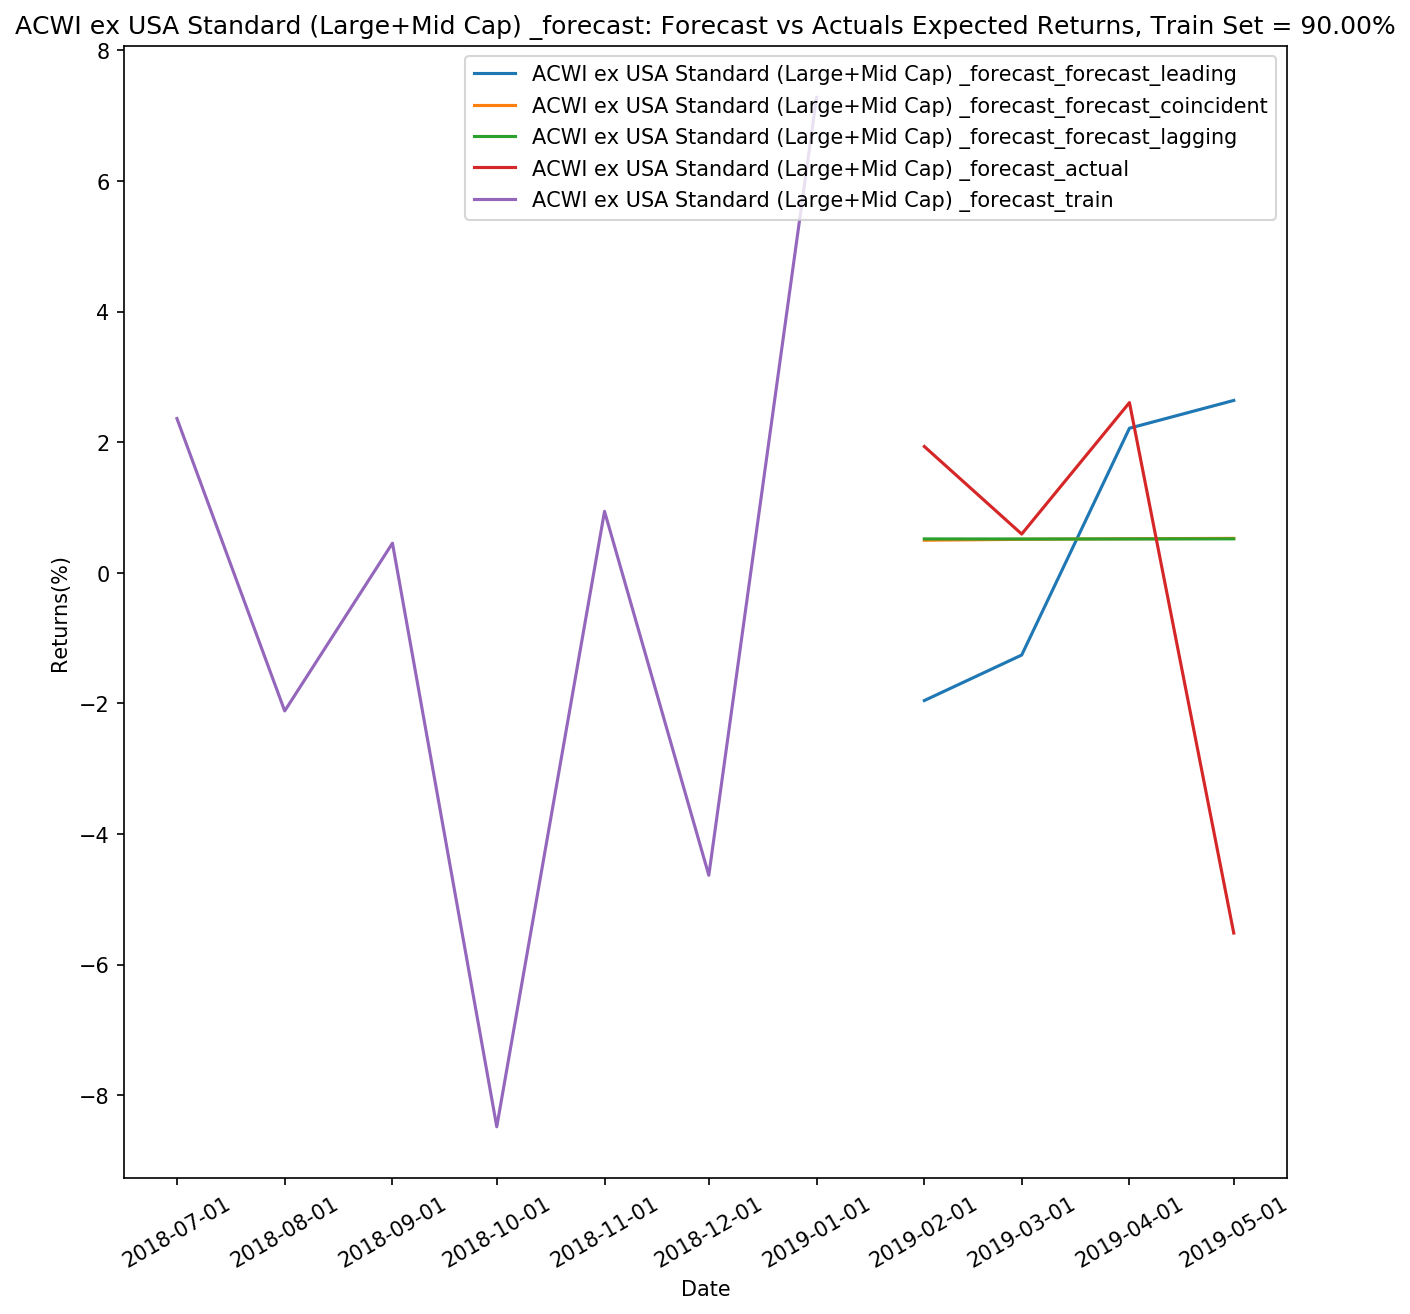

In [69]:
forecast_plot(df2_forecast_merge_ACWI_exUSA,df2_merge,1,90)